## Classification model for Heart Disease risk - by Aviram Morad and Maor Tal

**Imports**

In [ ]:
import pandas as pd
import sklearn
from sklearn import linear_model, svm
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, auc, roc_auc_score, mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder, label_binarize, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

RANDOM_STATE = 1 ## to ensure reproducibility (for comparing models)


**Load raw dataset and convert string values to numbers**

In [ ]:
## load dataset and convert string values to numbers

dataset = pd.read_csv("/content/contents/heart.csv")
le = LabelEncoder()

dataset['Sex'] = le.fit_transform(dataset['Sex'])
dataset['ChestPainType'] = le.fit_transform(dataset['ChestPainType'])
dataset['FastingBS'] = le.fit_transform(dataset['FastingBS'])
dataset['RestingECG'] = le.fit_transform(dataset['RestingECG'])
dataset['ExerciseAngina'] = le.fit_transform(dataset['ExerciseAngina'])
dataset['ST_Slope'] = le.fit_transform(dataset['ST_Slope'])

dataset

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              1        140          289          0           1   
1     49    0              2        160          180          0           1   
2     37    1              1        130          283          0           2   
3     48    0              0        138          214          0           1   
4     54    1              2        150          195          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              3        110          264          0           1   
914   68    1              0        144          193          1           1   
915   57    1              0        130          131          0           1   
916   57    0              1        130          236          0           0   
917   38    1              2        138          175          0           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0      172               0      0.0         2             0  
1      156               0      1.0         1             1  
2       98               0      0.0         2             0  
3      108               1      1.5         1             1  
4      122               0      0.0         2             0  
..     ...             ...      ...       ...           ...  
913    132               0      1.2         1             1  
914    141               0      3.4         1             1  
915    115               1      1.2         1             1  
916    174               0      0.0         1             1  
917    173               0      0.0         2             0  

[918 rows x 12 columns]

**Load fixed dataset and convert string values to numbers**

In [ ]:
## fixed dataset -> 50/50 on target class
## load dataset and convert string values to numbers

fixed_dataset = pd.read_csv("/content/contents/heart2.csv")
le = LabelEncoder()

fixed_dataset['Sex'] = le.fit_transform(fixed_dataset['Sex'])
fixed_dataset['ChestPainType'] = le.fit_transform(fixed_dataset['ChestPainType'])
fixed_dataset['FastingBS'] = le.fit_transform(fixed_dataset['FastingBS'])
fixed_dataset['RestingECG'] = le.fit_transform(fixed_dataset['RestingECG'])
fixed_dataset['ExerciseAngina'] = le.fit_transform(fixed_dataset['ExerciseAngina'])
fixed_dataset['ST_Slope'] = le.fit_transform(fixed_dataset['ST_Slope'])

fixed_dataset

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              1        140          289          0           1   
1     49    0              2        160          180          0           1   
2     37    1              1        130          283          0           2   
3     48    0              0        138          214          0           1   
4     54    1              2        150          195          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
821   45    1              3        110          264          0           1   
822   68    1              0        144          193          1           1   
823   57    1              0        130          131          0           1   
824   57    0              1        130          236          0           0   
825   38    1              2        138          175          0           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0      172               0      0.0         2             0  
1      156               0      1.0         1             1  
2       98               0      0.0         2             0  
3      108               1      1.5         1             1  
4      122               0      0.0         2             0  
..     ...             ...      ...       ...           ...  
821    132               0      1.2         1             1  
822    141               0      3.4         1             1  
823    115               1      1.2         1             1  
824    174               0      0.0         1             1  
825    173               0      0.0         2             0  

[826 rows x 12 columns]

# Part 1: Regression for numerical column: "MaxHR"

**Splitting the dataset into train and test partitions for regression**

In [ ]:
# first dataset

hr_before_x = dataset.drop(['MaxHR'], axis=1)
hr_before_y = dataset['MaxHR']

hr_before_x_train_50, hr_before_x_test_50, hr_before_y_train_50, hr_before_y_test_50 = train_test_split(hr_before_x, hr_before_y, test_size=0.5, random_state=RANDOM_STATE)
hr_before_x_train_40, hr_before_x_test_40, hr_before_y_train_40, hr_before_y_test_40 = train_test_split(hr_before_x, hr_before_y, test_size=0.4, random_state=RANDOM_STATE)
hr_before_x_train_30, hr_before_x_test_30, hr_before_y_train_30, hr_before_y_test_30 = train_test_split(hr_before_x, hr_before_y, test_size=0.3, random_state=RANDOM_STATE)

# second dataset

fixed_hr_before_x = fixed_dataset.drop(['MaxHR'], axis=1)
fixed_hr_before_y = fixed_dataset['MaxHR']

fixed_hr_before_x_train_50, fixed_hr_before_x_test_50, fixed_hr_before_y_train_50, fixed_hr_before_y_test_50 = train_test_split(fixed_hr_before_x, fixed_hr_before_y, test_size=0.5, random_state=RANDOM_STATE)
fixed_hr_before_x_train_40, fixed_hr_before_x_test_40, fixed_hr_before_y_train_40, fixed_hr_before_y_test_40 = train_test_split(fixed_hr_before_x, fixed_hr_before_y, test_size=0.4, random_state=RANDOM_STATE)
fixed_hr_before_x_train_30, fixed_hr_before_x_test_30, fixed_hr_before_y_train_30, fixed_hr_before_y_test_30 = train_test_split(fixed_hr_before_x, fixed_hr_before_y, test_size=0.3, random_state=RANDOM_STATE)

# we will find the best train/test split size.



**Defining the models**

In [ ]:
## 1st regression model - DTR

def dt_regression(x_train, x_test, y_train, y_test):
    print("=" * 60)
    print("Decision Tree Regression")
    print("=" * 60)

    # Define parameters for grid search
    parameters = {
        'max_depth': [2, 3, 5, 6, 10],
        'max_leaf_nodes': [20, 50, 100, 250, 500],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Perform grid search with cross-validation
    model = GridSearchCV(DecisionTreeRegressor(random_state=RANDOM_STATE), parameters, cv=5, scoring='neg_mean_squared_error')
    model.fit(x_train, y_train)

    print("Best parameters:", model.best_params_)

    # Use the best model for predictions
    best_model = model.best_estimator_
    y_pred_test = best_model.predict(x_test)
    y_pred_train = best_model.predict(x_train)

    # Evaluate the model
    r2 = r2_score(y_test, y_pred_test)
    mse = mean_squared_error(y_test, y_pred_test)
    mae = mean_absolute_error(y_test, y_pred_test)

    print(f"Test set R2 score: {r2:.4f}")
    print(f"Test set MSE: {mse:.4f}")
    print(f"Test set MAE: {mae:.4f}")
    print(f"Cross-validated MSE: {-model.best_score_:.4f}")
    print("\n----------------------------------------------------------\n")


In [ ]:
## 2nd regression model - linear regression

def linear_regression(x_train, x_test, y_train, y_test):

  print("=============================================================")
  print("Linear Regression")
  print("=============================================================\n")

  model = linear_model.LinearRegression()
  model.fit(x_train, y_train)
  y_pred_test = model.predict(x_test)
  y_pred_train = model.predict(x_train)

  scores = cross_val_score(model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
  average_mse = -scores.mean()

  # evaluate the model
  r2 = r2_score(y_test, y_pred_test)
  mse = mean_squared_error(y_test, y_pred_test)
  mae = mean_absolute_error(y_test, y_pred_test)

  print(f"Test set R2 score: {r2:.4f}")
  print(f"Test set MSE: {mse:.4f}")
  print(f"Test set MAE: {mae:.4f}")
  print(f"Average MSE: {average_mse:.4f}")
  print("\n----------------------------------------------------------\n")


In [ ]:
## 3rd regression model - SVR

def svr_regression(x_train, x_test, y_train, y_test):

  print("=============================================================")
  print("Support Vector Regression")
  print("=============================================================\n")

  model = svm.SVR()
  model.fit(x_train, y_train)
  y_pred_test = model.predict(x_test)
  y_pred_train = model.predict(x_train)

  scores = cross_val_score(model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
  average_mse = -scores.mean()

  # evaluate the model
  r2 = r2_score(y_test, y_pred_test)
  mse = mean_squared_error(y_test, y_pred_test)
  mae = mean_absolute_error(y_test, y_pred_test)

  print(f"Test set R2 score: {r2:.4f}")
  print(f"Test set MSE: {mse:.4f}")
  print(f"Test set MAE: {mae:.4f}")
  print(f"Average MSE: {average_mse:.4f}")
  print("\n----------------------------------------------------------\n")


**Finding the best train/test split size**

In [ ]:
def test_regression(x_train, x_test, y_train, y_test):
  dt_regression(x_train, x_test, y_train, y_test)
  linear_regression(x_train, x_test, y_train, y_test)
  svr_regression(x_train, x_test, y_train, y_test)

**Test 1: first dataset, test size = 40%**

In [ ]:
test_regression(hr_before_x_train_40, hr_before_x_test_40, hr_before_y_train_40, hr_before_y_test_40)

Decision Tree Regression
Best parameters: {'max_depth': 5, 'max_leaf_nodes': 20, 'min_samples_leaf': 1, 'min_samples_split': 10}
Test set R2 score: 0.1557
Test set MSE: 566.9566
Test set MAE: 18.6940
Cross-validated MSE: 490.9438

----------------------------------------------------------

Linear Regression

Test set R2 score: 0.3329
Test set MSE: 447.9914
Test set MAE: 16.8816
Average MSE: 433.4542

----------------------------------------------------------

Support Vector Regression

Test set R2 score: 0.0625
Test set MSE: 629.5157
Test set MAE: 20.5701
Average MSE: 568.6721

----------------------------------------------------------



**Test 2: first dataset, test size = 30%**

In [ ]:
test_regression(hr_before_x_train_30, hr_before_x_test_30, hr_before_y_train_30, hr_before_y_test_30)

Decision Tree Regression
Best parameters: {'max_depth': 5, 'max_leaf_nodes': 20, 'min_samples_leaf': 4, 'min_samples_split': 2}
Test set R2 score: 0.1571
Test set MSE: 571.0819
Test set MAE: 18.7294
Cross-validated MSE: 507.7886

----------------------------------------------------------

Linear Regression

Test set R2 score: 0.3112
Test set MSE: 466.6589
Test set MAE: 17.0202
Average MSE: 430.9162

----------------------------------------------------------

Support Vector Regression

Test set R2 score: 0.0336
Test set MSE: 654.7640
Test set MAE: 21.0207
Average MSE: 569.4529

----------------------------------------------------------



**Test 3: first dataset, test size = 50%**

In [ ]:
test_regression(hr_before_x_train_50, hr_before_x_test_50, hr_before_y_train_50, hr_before_y_test_50)

Decision Tree Regression
Best parameters: {'max_depth': 3, 'max_leaf_nodes': 20, 'min_samples_leaf': 4, 'min_samples_split': 2}
Test set R2 score: 0.1703
Test set MSE: 542.5356
Test set MAE: 18.3909
Cross-validated MSE: 513.2177

----------------------------------------------------------

Linear Regression

Test set R2 score: 0.3179
Test set MSE: 446.0430
Test set MAE: 16.6703
Average MSE: 438.2792

----------------------------------------------------------

Support Vector Regression

Test set R2 score: 0.0762
Test set MSE: 604.0744
Test set MAE: 19.9345
Average MSE: 587.9491

----------------------------------------------------------



**Test 4: second dataset, test size = 40%**

In [ ]:
test_regression(fixed_hr_before_x_train_40, fixed_hr_before_x_test_40, fixed_hr_before_y_train_40, fixed_hr_before_y_test_40)

Decision Tree Regression
Best parameters: {'max_depth': 2, 'max_leaf_nodes': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Test set R2 score: 0.2176
Test set MSE: 512.5710
Test set MAE: 17.6701
Cross-validated MSE: 485.2639

----------------------------------------------------------

Linear Regression

Test set R2 score: 0.3304
Test set MSE: 438.6916
Test set MAE: 16.3857
Average MSE: 439.5358

----------------------------------------------------------

Support Vector Regression

Test set R2 score: 0.1042
Test set MSE: 586.8745
Test set MAE: 19.5820
Average MSE: 594.9083

----------------------------------------------------------



**Test 5: second dataset, test size = 30%**

In [ ]:
test_regression(fixed_hr_before_x_train_30, fixed_hr_before_x_test_30, fixed_hr_before_y_train_30, fixed_hr_before_y_test_30)

Decision Tree Regression
Best parameters: {'max_depth': 3, 'max_leaf_nodes': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Test set R2 score: 0.2347
Test set MSE: 496.7364
Test set MAE: 17.4578
Cross-validated MSE: 509.0605

----------------------------------------------------------

Linear Regression

Test set R2 score: 0.3045
Test set MSE: 451.4579
Test set MAE: 16.6106
Average MSE: 431.8813

----------------------------------------------------------

Support Vector Regression

Test set R2 score: 0.1001
Test set MSE: 584.0804
Test set MAE: 19.6044
Average MSE: 590.2897

----------------------------------------------------------



**Test 6: second dataset, test size = 50%**

In [ ]:
test_regression(fixed_hr_before_x_train_50, fixed_hr_before_x_test_50, fixed_hr_before_y_train_50, fixed_hr_before_y_test_50)

Decision Tree Regression
Best parameters: {'max_depth': 2, 'max_leaf_nodes': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Test set R2 score: 0.2154
Test set MSE: 488.3415
Test set MAE: 17.1185
Cross-validated MSE: 502.7708

----------------------------------------------------------

Linear Regression

Test set R2 score: 0.3075
Test set MSE: 431.0181
Test set MAE: 16.0657
Average MSE: 443.1944

----------------------------------------------------------

Support Vector Regression

Test set R2 score: 0.0861
Test set MSE: 568.8566
Test set MAE: 19.2759
Average MSE: 625.1192

----------------------------------------------------------



# Part 2: Discretizing numerical column "MaxHR" and class prediction

**We will discretize it to 2 and 3 categories and compare the results.**

**First dataset Discretization**

In [ ]:
# Discretization of MaxHR column

sorted_maxhr = dataset['MaxHR'].sort_values()
n = len(sorted_maxhr)

# 2 categories

bin_edges_two = [sorted_maxhr.iloc[0], sorted_maxhr.iloc[n//2], sorted_maxhr.iloc[-1]]
dataset['Discretized_MaxHR_two'] = pd.cut(dataset['MaxHR'], bins=bin_edges_two, labels=[0,1])

# 3 categories

bin_edges_three = [sorted_maxhr.iloc[0], sorted_maxhr.iloc[n//3], sorted_maxhr.iloc[2*n//3], sorted_maxhr.iloc[-1]]
dataset['Discretized_MaxHR_three'] = pd.cut(dataset['MaxHR'], bins=bin_edges_three, labels=[0,1,2])


**Second dataset Discretization**

In [ ]:
# Discretization of MaxHR column

fixed_sorted_maxhr = fixed_dataset['MaxHR'].sort_values()
fixed_n = len(sorted_maxhr)

# 2 categories

fixed_bin_edges_two = [fixed_sorted_maxhr.iloc[0], fixed_sorted_maxhr.iloc[fixed_n//2], fixed_sorted_maxhr.iloc[-1]]
fixed_dataset['Discretized_MaxHR_two'] = pd.cut(fixed_dataset['MaxHR'], bins=fixed_bin_edges_two, labels=[0,1])

# 3 categories

fixed_bin_edges_three = [fixed_sorted_maxhr.iloc[0], fixed_sorted_maxhr.iloc[fixed_n//3], fixed_sorted_maxhr.iloc[2*fixed_n//3], fixed_sorted_maxhr.iloc[-1]]
fixed_dataset['Discretized_MaxHR_three'] = pd.cut(fixed_dataset['MaxHR'], bins=fixed_bin_edges_three, labels=[0,1,2])


**Splitting the dataset into train and test partitions for classification**

In [ ]:
# first dataset

hr_x = dataset.drop(['MaxHR', 'Discretized_MaxHR_two', 'Discretized_MaxHR_three'], axis=1)
hr_two_y = dataset['Discretized_MaxHR_two']
hr_three_y = dataset['Discretized_MaxHR_three']

hr_two_x_train_30, hr_two_x_test_30, hr_two_y_train_30, hr_two_y_test_30 = train_test_split(hr_x, hr_two_y, test_size=0.3, random_state=RANDOM_STATE)
hr_two_x_train_25, hr_two_x_test_25, hr_two_y_train_25, hr_two_y_test_25 = train_test_split(hr_x, hr_two_y, test_size=0.25, random_state=RANDOM_STATE)
hr_two_x_train_20, hr_two_x_test_20, hr_two_y_train_20, hr_two_y_test_20 = train_test_split(hr_x, hr_two_y, test_size=0.2, random_state=RANDOM_STATE)

hr_three_x_train_30, hr_three_x_test_30, hr_three_y_train_30, hr_three_y_test_30 = train_test_split(hr_x, hr_three_y, test_size=0.3, random_state=RANDOM_STATE)
hr_three_x_train_25, hr_three_x_test_25, hr_three_y_train_25, hr_three_y_test_25 = train_test_split(hr_x, hr_three_y, test_size=0.25, random_state=RANDOM_STATE)
hr_three_x_train_20, hr_three_x_test_20, hr_three_y_train_20, hr_three_y_test_20 = train_test_split(hr_x, hr_three_y, test_size=0.2, random_state=RANDOM_STATE)

# second dataset

fixed_hr_x = fixed_dataset.drop(['MaxHR', 'Discretized_MaxHR_two', 'Discretized_MaxHR_three'], axis=1)
fixed_hr_two_y = fixed_dataset['Discretized_MaxHR_two']
fixed_hr_three_y = fixed_dataset['Discretized_MaxHR_three']

fixed_hr_two_x_train_30, fixed_hr_two_x_test_30, fixed_hr_two_y_train_30, fixed_hr_two_y_test_30 = train_test_split(fixed_hr_x, fixed_hr_two_y, test_size=0.3, random_state=RANDOM_STATE)
fixed_hr_two_x_train_25, fixed_hr_two_x_test_25, fixed_hr_two_y_train_25, fixed_hr_two_y_test_25 = train_test_split(fixed_hr_x, fixed_hr_two_y, test_size=0.25, random_state=RANDOM_STATE)
fixed_hr_two_x_train_20, fixed_hr_two_x_test_20, fixed_hr_two_y_train_20, fixed_hr_two_y_test_20 = train_test_split(fixed_hr_x, fixed_hr_two_y, test_size=0.2, random_state=RANDOM_STATE)

fixed_hr_three_x_train_30, fixed_hr_three_x_test_30, fixed_hr_three_y_train_30, fixed_hr_three_y_test_30 = train_test_split(fixed_hr_x, fixed_hr_three_y, test_size=0.3, random_state=RANDOM_STATE)
fixed_hr_three_x_train_25, fixed_hr_three_x_test_25, fixed_hr_three_y_train_25, fixed_hr_three_y_test_25 = train_test_split(fixed_hr_x, fixed_hr_three_y, test_size=0.25, random_state=RANDOM_STATE)
fixed_hr_three_x_train_20, fixed_hr_three_x_test_20, fixed_hr_three_y_train_20, fixed_hr_three_y_test_20 = train_test_split(fixed_hr_x, fixed_hr_three_y, test_size=0.2, random_state=RANDOM_STATE)


**Defining the models**

In [ ]:
## 1st classification model - DT

def evaluate_decision_tree(x_train, x_test, y_train, y_test):

  print("=============================================================")
  print("Decision Tree Classifier")
  print("=============================================================\n")

  # Fill empty values (if exists) with most frequent value
  y_train = y_train.fillna(y_train.mode()[0])
  for column in x_train.columns:
        x_train[column] = x_train[column].fillna(x_train[column].mode()[0])

  # Define the model's parameters for grid search and cv

  parameters = {
        'max_depth': [3, 5, 7, 10],
        'min_samples_leaf': [5, 10, 20, 50, 100],
        'min_samples_split': [2, 5, 10, 50],
        'max_leaf_nodes': [20, 50, 100, 250, 500]
    }

  # Define the model

  model = GridSearchCV(DecisionTreeClassifier(random_state=RANDOM_STATE), parameters, cv=5, scoring='accuracy')
  model.fit(x_train, y_train)

  print("Best parameters:", model.best_params_)
  print("Best cross-validation score: {:.4f}".format(model.best_score_))

  best_model = model.best_estimator_

  # Make predictions
  y_pred_test = best_model.predict(x_test)
  y_pred_train = best_model.predict(x_train)

  # Calculate metrics
  test_acc = accuracy_score(y_test, y_pred_test)
  train_acc = accuracy_score(y_train, y_pred_train)

  # Handle multi-class AUC
  classes = np.unique(y_train)
  n_classes = len(classes)

  if n_classes > 2:
      y_test_bin = label_binarize(y_test, classes=classes)
      y_train_bin = label_binarize(y_train, classes=classes)
      y_pred_test_proba = best_model.predict_proba(x_test)
      y_pred_train_proba = best_model.predict_proba(x_train)

      test_auc = roc_auc_score(y_test_bin, y_pred_test_proba, multi_class='ovr', average='macro')
      train_auc = roc_auc_score(y_train_bin, y_pred_train_proba, multi_class='ovr', average='macro')
  else:
      y_pred_test_proba = best_model.predict_proba(x_test)[:, 1]
      y_pred_train_proba = best_model.predict_proba(x_train)[:, 1]
      test_auc = roc_auc_score(y_test, y_pred_test_proba)
      train_auc = roc_auc_score(y_train, y_pred_train_proba)

  print("\nTest set accuracy: {:.4f}".format(test_acc))
  print("Training set accuracy: {:.4f}".format(train_acc))
  print("Test set AUC: {:.4f}".format(test_auc))
  print("Training set AUC: {:.4f}".format(train_auc))

  # Overfitting check
  if train_acc > (test_acc+0.05):
      print("Possible overfitting")
  else:
      print("No overfitting")


  # Confusion matrix
  cm = confusion_matrix(y_test, y_pred_test)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
  plt.title('Confusion Matrix - DT')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show()

  # Feature importance
  feature_importance = best_model.feature_importances_
  sorted_idx = np.argsort(feature_importance)
  pos = np.arange(sorted_idx.shape[0]) + .5
  plt.figure(figsize=(8, 6))
  plt.barh(pos, feature_importance[sorted_idx], align='center')
  plt.yticks(pos, x_train.columns[sorted_idx])
  plt.xlabel('Feature Importance')
  plt.title('Feature Importance - DT')
  plt.tight_layout()
  plt.show()

  print("\n" + "-" * 60 + "\n")


In [ ]:
## 2nd classification model - RF

def evaluate_random_forest(x_train, x_test, y_train, y_test):

  print("=============================================================")
  print("Random Forest Classifier")
  print("=============================================================\n")

  # Fill empty values (if exists) with most frequent value

  y_train = y_train.fillna(y_train.mode()[0])
  for column in x_train.columns:
        x_train[column] = x_train[column].fillna(x_train[column].mode()[0])

  # Define the model's parameters for grid search and cv

  parameteres = {
        'n_estimators': [10, 50, 100, 200],
        'max_depth': [3, 5, 7, 10]
        }

  # Define the model

  model = GridSearchCV(RandomForestClassifier(random_state=RANDOM_STATE), parameteres, cv=5)
  model.fit(x_train, y_train)
  best_model = model.best_estimator_

  print("Best parameters:", model.best_params_)
  print("Best cross-validation score: {:.4f}".format(model.best_score_))

  # Make predictions
  y_pred_test = best_model.predict(x_test)
  y_pred_train = best_model.predict(x_train)

  # Calculate metrics
  test_acc = accuracy_score(y_test, y_pred_test)
  train_acc = accuracy_score(y_train, y_pred_train)

  # Handle multi-class AUC
  classes = np.unique(y_train)
  n_classes = len(classes)

  if n_classes > 2:
      y_test_bin = label_binarize(y_test, classes=classes)
      y_train_bin = label_binarize(y_train, classes=classes)
      y_pred_test_proba = best_model.predict_proba(x_test)
      y_pred_train_proba = best_model.predict_proba(x_train)

      test_auc = roc_auc_score(y_test_bin, y_pred_test_proba, multi_class='ovr', average='macro')
      train_auc = roc_auc_score(y_train_bin, y_pred_train_proba, multi_class='ovr', average='macro')
  else:
      y_pred_test_proba = best_model.predict_proba(x_test)[:, 1]
      y_pred_train_proba = best_model.predict_proba(x_train)[:, 1]
      test_auc = roc_auc_score(y_test, y_pred_test_proba)
      train_auc = roc_auc_score(y_train, y_pred_train_proba)

  print("\nTest set accuracy: {:.4f}".format(test_acc))
  print("Training set accuracy: {:.4f}".format(train_acc))
  print("Test set AUC: {:.4f}".format(test_auc))
  print("Training set AUC: {:.4f}".format(train_auc))

  # Overfitting check
  if train_acc > (test_acc+0.05):
      print("Possible overfitting")
  else:
      print("No overfitting")

  # Confusion matrix
  cm = confusion_matrix(y_test, y_pred_test)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
  plt.title('Confusion Matrix - RF')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show()

  # Feature importance
  feature_importance = best_model.feature_importances_
  sorted_idx = np.argsort(feature_importance)
  pos = np.arange(sorted_idx.shape[0]) + .5
  plt.figure(figsize=(8, 6))
  plt.barh(pos, feature_importance[sorted_idx], align='center')
  plt.yticks(pos, x_train.columns[sorted_idx])
  plt.xlabel('Feature Importance')
  plt.title('Feature Importance - RF')
  plt.tight_layout()
  plt.show()

  print("\n" + "-" * 60 + "\n")


In [ ]:
## 3rd classification model - XGBoost

def evaluate_xgboost(x_train, x_test, y_train, y_test):

  print("=============================================================")
  print("XGBoost Classifier")
  print("=============================================================\n")

  # Fill empty values (if exists) with most frequent value

  y_train = y_train.fillna(y_train.mode()[0])
  for column in x_train.columns:
        x_train[column] = x_train[column].fillna(x_train[column].mode()[0])

  # define the model
  model = xgb.XGBClassifier(random_state=RANDOM_STATE, enable_categorical=True)
  scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
  print("Best cross validation score: ", scores.mean())

  # evaluate the model
  model.fit(x_train, y_train)
  y_pred_test = model.predict(x_test)
  y_pred_train = model.predict(x_train)
  test_acc = accuracy_score(y_test, y_pred_test)
  train_acc = accuracy_score(y_train, y_pred_train)

  # Handle multi-class AUC
  classes = np.unique(y_train)
  n_classes = len(classes)

  if n_classes > 2:
      y_test_bin = label_binarize(y_test, classes=classes)
      y_train_bin = label_binarize(y_train, classes=classes)
      y_pred_test_proba = model.predict_proba(x_test)
      y_pred_train_proba = model.predict_proba(x_train)

      test_auc = roc_auc_score(y_test_bin, y_pred_test_proba, multi_class='ovr', average='macro')
      train_auc = roc_auc_score(y_train_bin, y_pred_train_proba, multi_class='ovr', average='macro')
  else:
      y_pred_test_proba = model.predict_proba(x_test)[:, 1]
      y_pred_train_proba = model.predict_proba(x_train)[:, 1]
      test_auc = roc_auc_score(y_test, y_pred_test_proba)
      train_auc = roc_auc_score(y_train, y_pred_train_proba)


  print("\nTest set accuracy: {:.4f}".format(test_acc))
  print("Training set accuracy: {:.4f}".format(train_acc))
  print("Test set AUC: {:.4f}".format(test_auc))
  print("Training set AUC: {:.4f}".format(train_auc))

  # Overfitting check
  if train_acc > (test_acc+0.05):
      print("Possible overfitting")
  else:
      print("No overfitting")

  # Confusion matrix
  cm = confusion_matrix(y_test, y_pred_test)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
  plt.title('Confusion Matrix - XGB')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show()

  # Feature importance
  feature_importance = model.feature_importances_
  sorted_idx = np.argsort(feature_importance)
  pos = np.arange(sorted_idx.shape[0]) + .5
  plt.figure(figsize=(8, 6))
  plt.barh(pos, feature_importance[sorted_idx], align='center')
  plt.yticks(pos, x_train.columns[sorted_idx])
  plt.xlabel('Feature Importance')
  plt.title('Feature Importance - XGBoost')
  plt.tight_layout()
  plt.show()

  print("\n" + "-" * 60 + "\n")


In [ ]:
## 4th classification model - NB

def evaluate_naive_bayes(x_train, x_test, y_train, y_test):

  print("=============================================================")
  print("Naive Bayes Classifier")
  print("=============================================================\n")

  # Fill empty values (if exists) with most frequent value

  y_train = y_train.fillna(y_train.mode()[0])
  for column in x_train.columns:
        x_train[column] = x_train[column].fillna(x_train[column].mode()[0])

  # define the model and cv scores
  model = GridSearchCV(GaussianNB(), {}, cv=5)
  scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')

  print("Best cross validation scores: ", max([scores[0].mean(), scores[1].mean(), scores[2].mean()]))

  # evaluation of the model
  model.fit(x_train, y_train)
  y_pred_test = model.predict(x_test)
  y_pred_train = model.predict(x_train)
  test_acc = accuracy_score(y_test, y_pred_test)
  train_acc = accuracy_score(y_train, y_pred_train)

  # Handle multi-class AUC
  classes = np.unique(y_train)
  n_classes = len(classes)

  if n_classes > 2:
      y_test_bin = label_binarize(y_test, classes=classes)
      y_train_bin = label_binarize(y_train, classes=classes)
      y_pred_test_proba = model.predict_proba(x_test)
      y_pred_train_proba = model.predict_proba(x_train)

      test_auc = roc_auc_score(y_test_bin, y_pred_test_proba, multi_class='ovr', average='macro')
      train_auc = roc_auc_score(y_train_bin, y_pred_train_proba, multi_class='ovr', average='macro')
  else:
      y_pred_test_proba = model.predict_proba(x_test)[:, 1]
      y_pred_train_proba = model.predict_proba(x_train)[:, 1]
      test_auc = roc_auc_score(y_test, y_pred_test_proba)
      train_auc = roc_auc_score(y_train, y_pred_train_proba)

  print("\nTest set accuracy: {:.4f}".format(test_acc))
  print("Training set accuracy: {:.4f}".format(train_acc))
  print("Test set AUC: {:.4f}".format(test_auc))
  print("Training set AUC: {:.4f}".format(train_auc))

  # Overfitting check
  if train_acc > (test_acc+0.05):
      print("Possible overfitting")
  else:
      print("No overfitting")

  # Confusion matrix
  cm = confusion_matrix(y_test, y_pred_test)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
  plt.title('Confusion Matrix - NB')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show()

  print("\n" + "-" * 60 + "\n")


In [ ]:
## 5th classification model - KNN

def evaluate_knn(x_train, x_test, y_train, y_test):

  print("=============================================================")
  print("K-Nearest Neighbors Classifier")
  print("=============================================================\n")

  y_train = y_train.fillna(y_train.mode()[0]) # Fill with the most frequent value


  parameters = {'n_neighbors': [3, 5, 7, 10]}
  model = GridSearchCV(KNeighborsClassifier(), parameters, cv=5)
  model.fit(x_train, y_train)
  print("Best parameters:", model.best_params_)
  print("Best cross-validation score: {:.4f}".format(model.best_score_))

  best_model = model.best_estimator_

  # define the model

  y_pred_test = best_model.predict(x_test)
  y_pred_train = best_model.predict(x_train)
  test_acc = accuracy_score(y_test, y_pred_test)
  train_acc = accuracy_score(y_train, y_pred_train)

  # Handle multi-class AUC
  classes = np.unique(y_train)
  n_classes = len(classes)

  if n_classes > 2:
      y_test_bin = label_binarize(y_test, classes=classes)
      y_train_bin = label_binarize(y_train, classes=classes)
      y_pred_test_proba = best_model.predict_proba(x_test)
      y_pred_train_proba = best_model.predict_proba(x_train)

      test_auc = roc_auc_score(y_test_bin, y_pred_test_proba, multi_class='ovr', average='macro')
      train_auc = roc_auc_score(y_train_bin, y_pred_train_proba, multi_class='ovr', average='macro')
  else:
      y_pred_test_proba = best_model.predict_proba(x_test)[:, 1]
      y_pred_train_proba = best_model.predict_proba(x_train)[:, 1]
      test_auc = roc_auc_score(y_test, y_pred_test_proba)
      train_auc = roc_auc_score(y_train, y_pred_train_proba)

  print("\nTest set accuracy: {:.4f}".format(test_acc))
  print("Training set accuracy: {:.4f}".format(train_acc))
  print("Test set AUC: {:.4f}".format(test_auc))
  print("Training set AUC: {:.4f}".format(train_auc))

  # Overfitting check
  if train_acc > (test_acc+0.05):
      print("Possible overfitting")
  else:
      print("No overfitting")

  # Confusion matrix
  cm = confusion_matrix(y_test, y_pred_test)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
  plt.title('Confusion Matrix - KNN')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show()


  print("\n" + "-" * 60 + "\n")


**Defining the test function**

In [ ]:
def predict(x_train, x_test, y_train, y_test):

  y_test = y_test.astype(int)

  evaluate_decision_tree(x_train, x_test, y_train, y_test)
  evaluate_random_forest(x_train, x_test, y_train, y_test)
  evaluate_xgboost(x_train, x_test, y_train, y_test)
  evaluate_naive_bayes(x_train, x_test, y_train, y_test)
  evaluate_knn(x_train, x_test, y_train, y_test)


# Research

**Results for 2 and 3 classes discretization with varying test sizes.**

**Running the tests - first dataset, 2 categories**

**test size = 30%**

Decision Tree Classifier

Best parameters: {'max_depth': 5, 'max_leaf_nodes': 20, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best cross-validation score: 0.6481

Test set accuracy: 0.6630
Training set accuracy: 0.7492
Test set AUC: 0.6837
Training set AUC: 0.8157
Possible overfitting


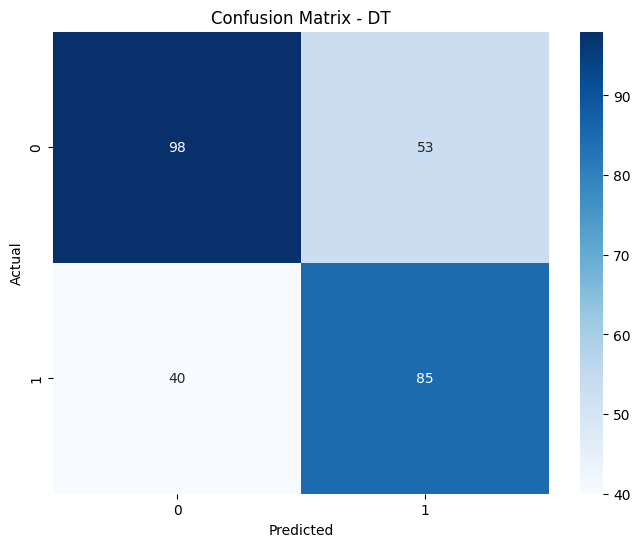

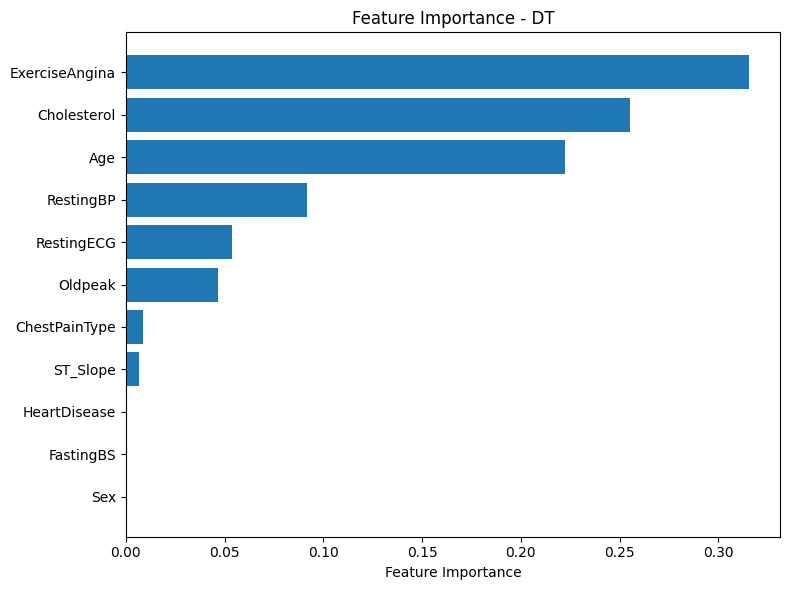


------------------------------------------------------------

Random Forest Classifier

Best parameters: {'max_depth': 5, 'n_estimators': 200}
Best cross-validation score: 0.7057

Test set accuracy: 0.7428
Training set accuracy: 0.7975
Test set AUC: 0.7938
Training set AUC: 0.8820
Possible overfitting


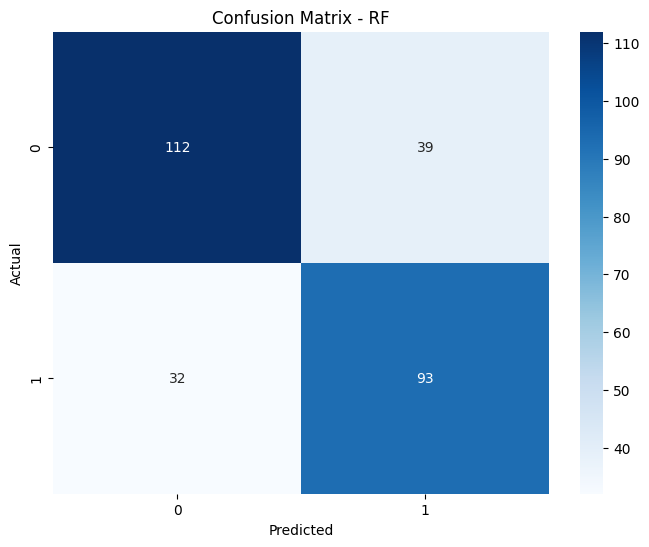

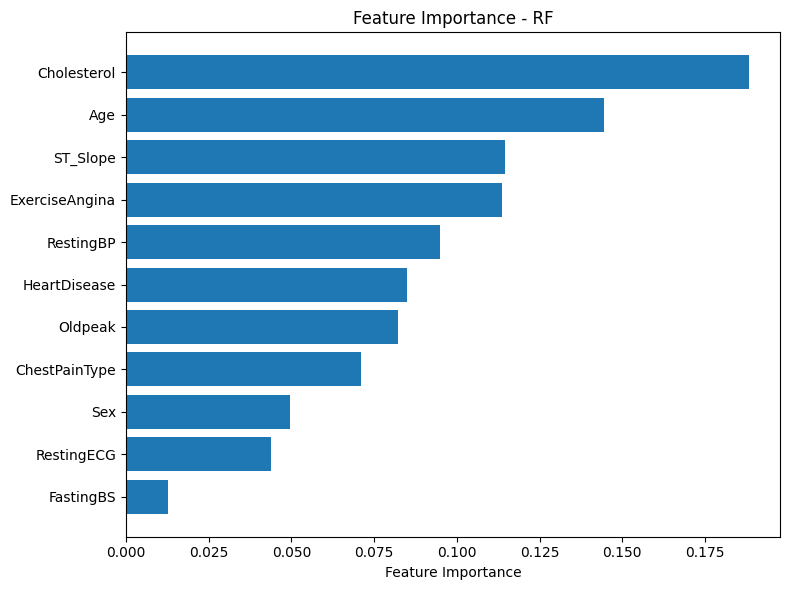


------------------------------------------------------------

XGBoost Classifier

Best cross validation score:  0.6714389534883721

Test set accuracy: 0.6630
Training set accuracy: 1.0000
Test set AUC: 0.6974
Training set AUC: 1.0000
Possible overfitting


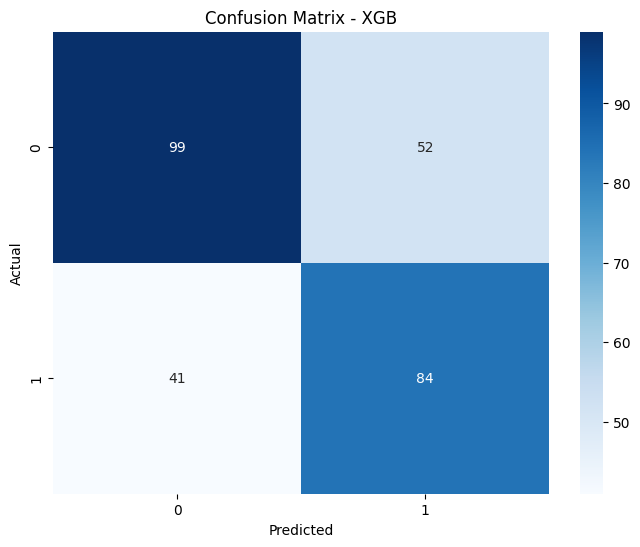

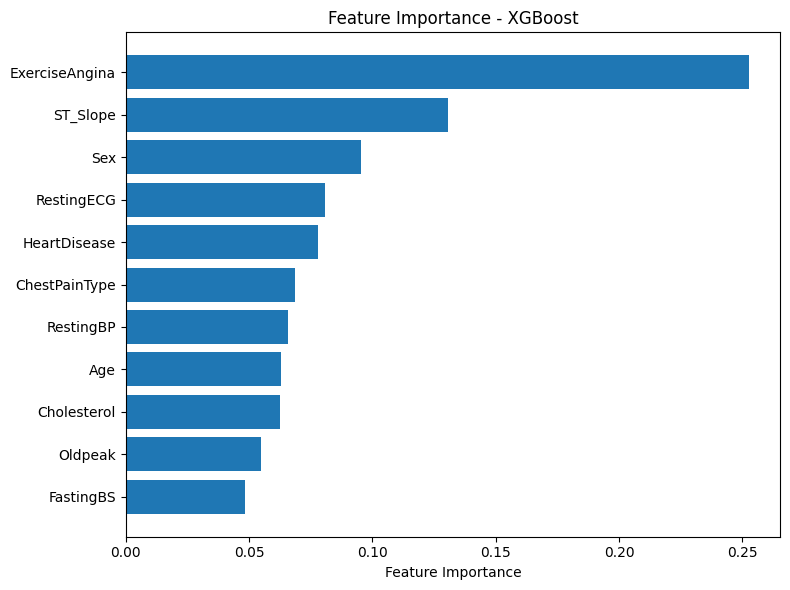


------------------------------------------------------------

Naive Bayes Classifier

Best cross validation scores:  0.734375

Test set accuracy: 0.7428
Training set accuracy: 0.7087
Test set AUC: 0.7675
Training set AUC: 0.7572
No overfitting


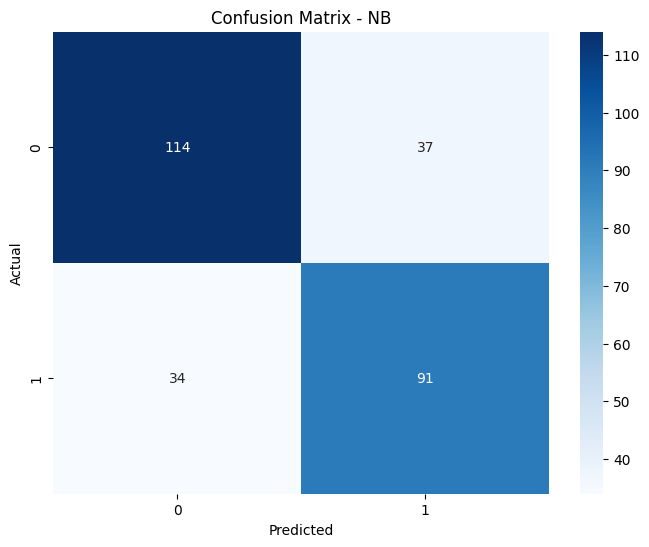


------------------------------------------------------------

K-Nearest Neighbors Classifier

Best parameters: {'n_neighbors': 10}
Best cross-validation score: 0.6246

Test set accuracy: 0.6159
Training set accuracy: 0.7009
Test set AUC: 0.6506
Training set AUC: 0.7628
Possible overfitting


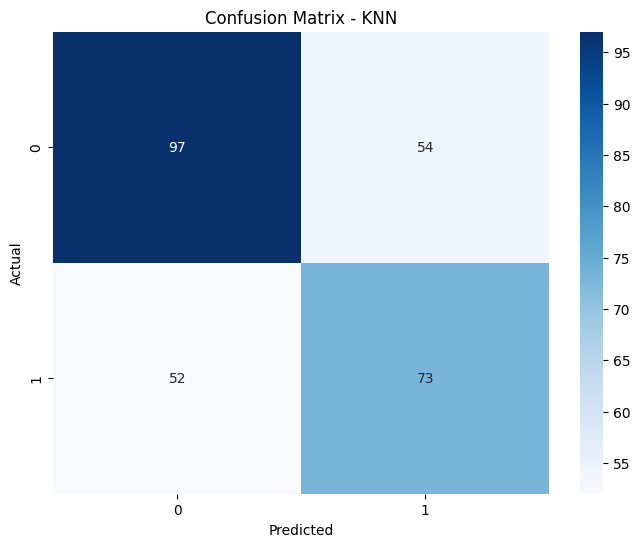


------------------------------------------------------------



In [ ]:
predict(hr_two_x_train_30, hr_two_x_test_30, hr_two_y_train_30, hr_two_y_test_30)

**test size = 25%**

Decision Tree Classifier

Best parameters: {'max_depth': 5, 'max_leaf_nodes': 20, 'min_samples_leaf': 10, 'min_samples_split': 50}
Best cross-validation score: 0.6845

Test set accuracy: 0.7087
Training set accuracy: 0.7485
Test set AUC: 0.7710
Training set AUC: 0.8103
No overfitting


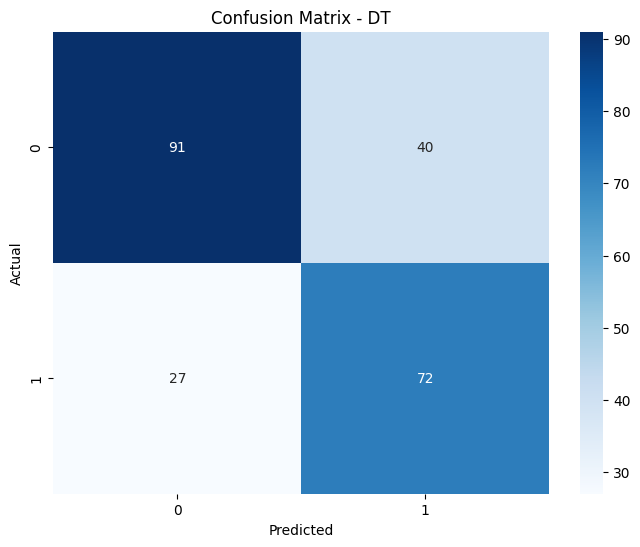

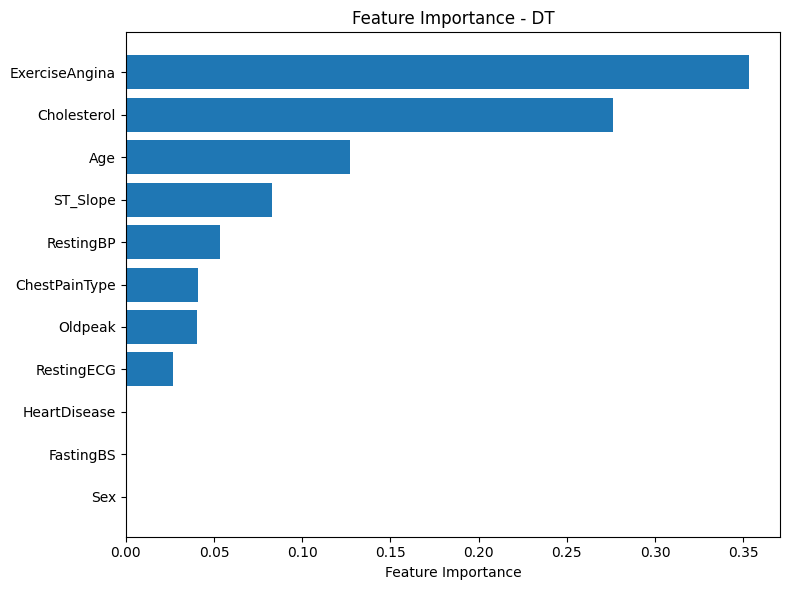


------------------------------------------------------------

Random Forest Classifier

Best parameters: {'max_depth': 3, 'n_estimators': 200}
Best cross-validation score: 0.7107

Test set accuracy: 0.7478
Training set accuracy: 0.7456
Test set AUC: 0.7861
Training set AUC: 0.8080
No overfitting


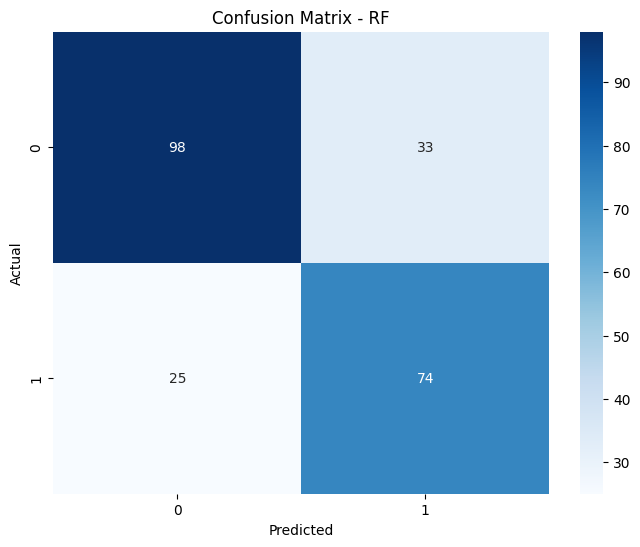

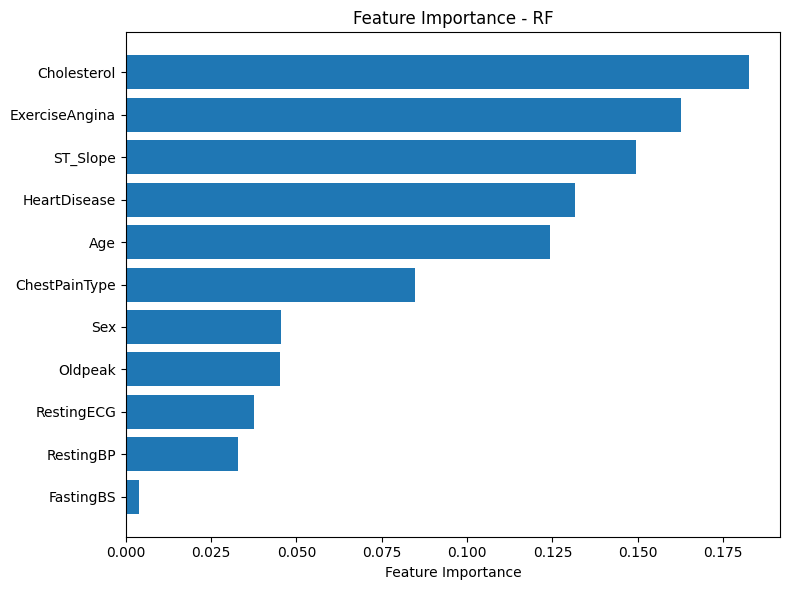


------------------------------------------------------------

XGBoost Classifier

Best cross validation score:  0.687464297048556

Test set accuracy: 0.6565
Training set accuracy: 1.0000
Test set AUC: 0.6878
Training set AUC: 1.0000
Possible overfitting


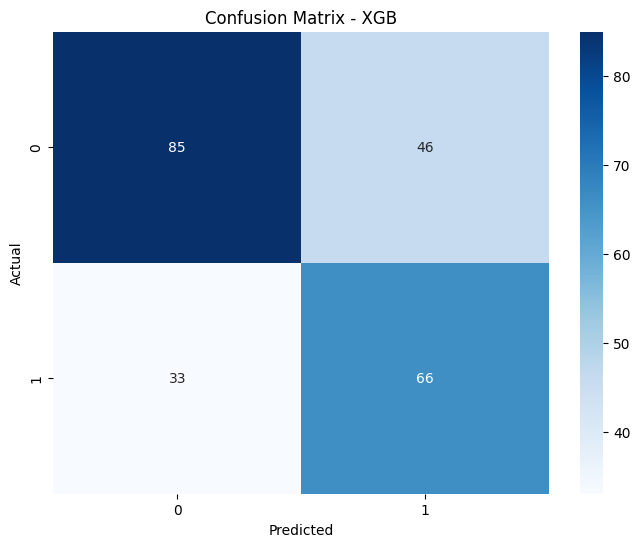

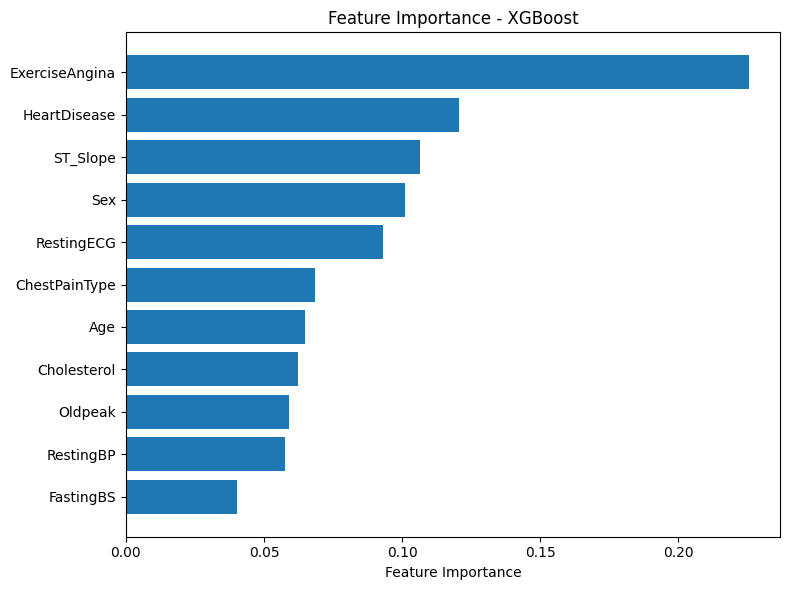


------------------------------------------------------------

Naive Bayes Classifier

Best cross validation scores:  0.7681159420289855

Test set accuracy: 0.7478
Training set accuracy: 0.7108
Test set AUC: 0.7470
Training set AUC: 0.7646
No overfitting


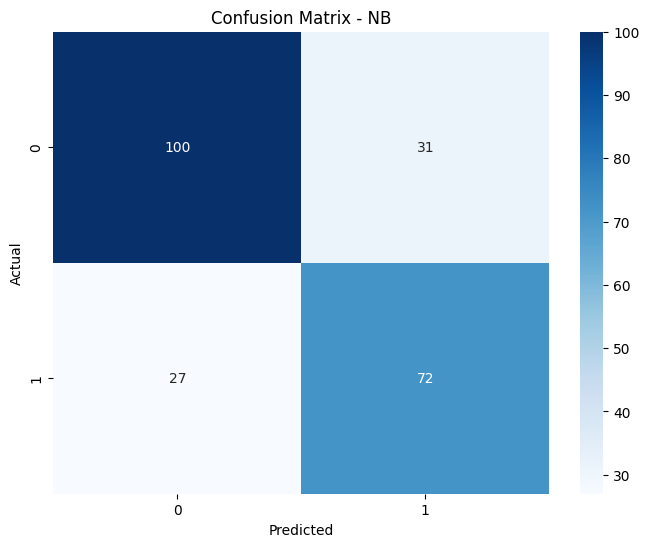


------------------------------------------------------------

K-Nearest Neighbors Classifier

Best parameters: {'n_neighbors': 10}
Best cross-validation score: 0.6395

Test set accuracy: 0.5957
Training set accuracy: 0.7093
Test set AUC: 0.6282
Training set AUC: 0.7779
Possible overfitting


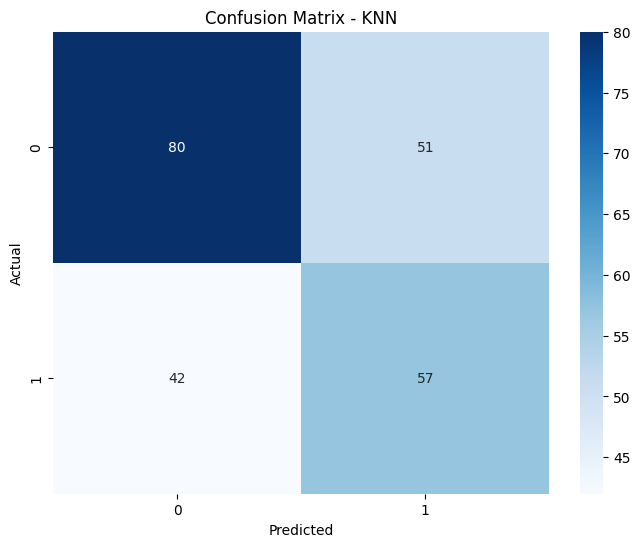


------------------------------------------------------------



In [ ]:
predict(hr_two_x_train_25, hr_two_x_test_25, hr_two_y_train_25, hr_two_y_test_25)

**test size = 20%**

Decision Tree Classifier

Best parameters: {'max_depth': 3, 'max_leaf_nodes': 20, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best cross-validation score: 0.6894

Test set accuracy: 0.7065
Training set accuracy: 0.7139
Test set AUC: 0.7265
Training set AUC: 0.7588
No overfitting


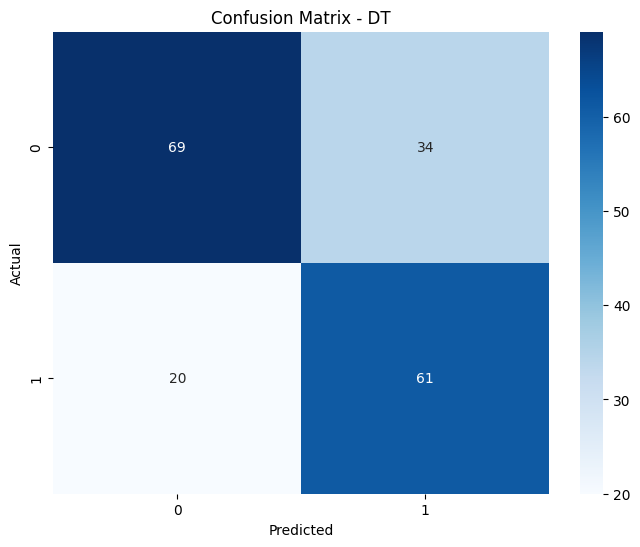

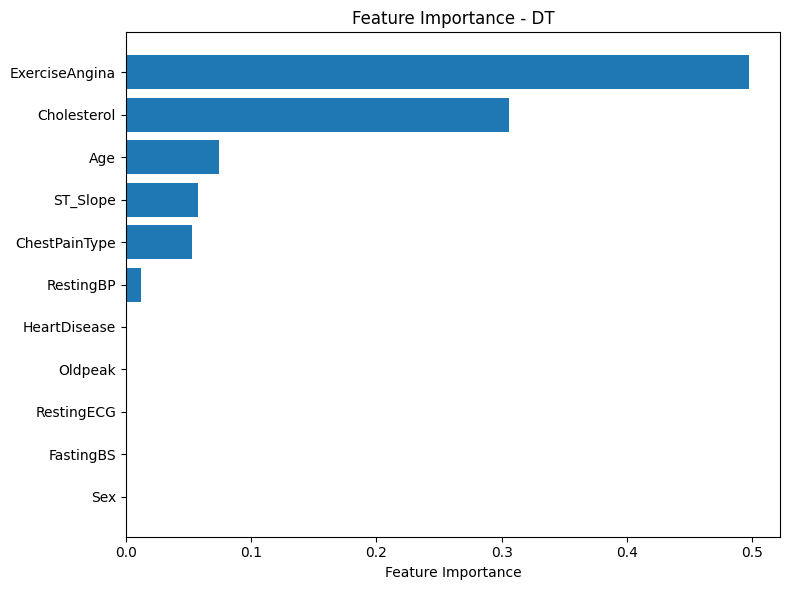


------------------------------------------------------------

Random Forest Classifier

Best parameters: {'max_depth': 5, 'n_estimators': 200}
Best cross-validation score: 0.7112

Test set accuracy: 0.7554
Training set accuracy: 0.8038
Test set AUC: 0.7878
Training set AUC: 0.8750
No overfitting


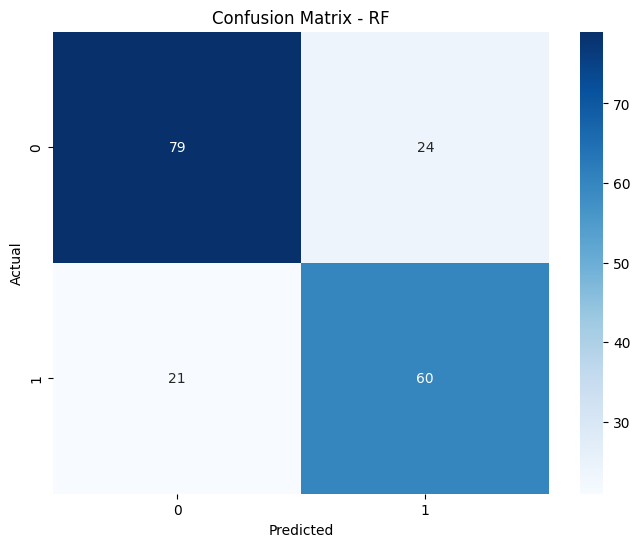

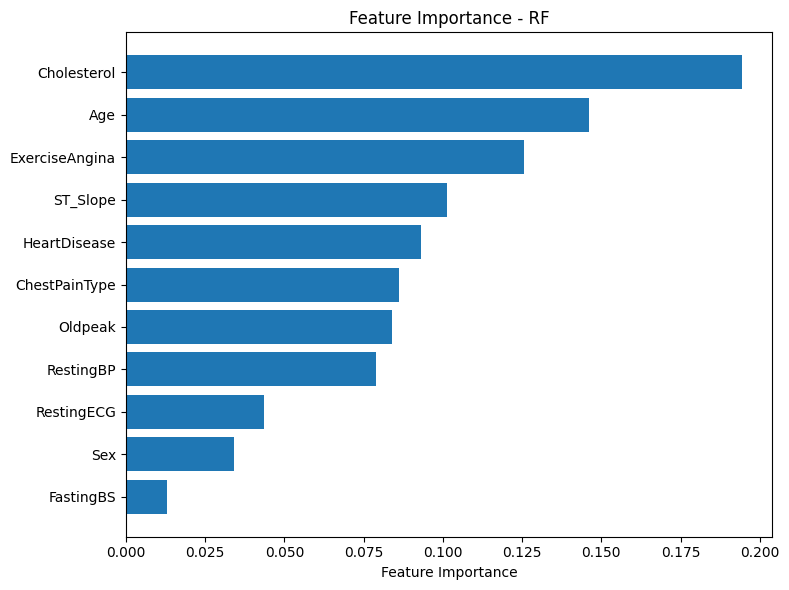


------------------------------------------------------------

XGBoost Classifier

Best cross validation score:  0.675752492777933

Test set accuracy: 0.6576
Training set accuracy: 1.0000
Test set AUC: 0.6941
Training set AUC: 1.0000
Possible overfitting


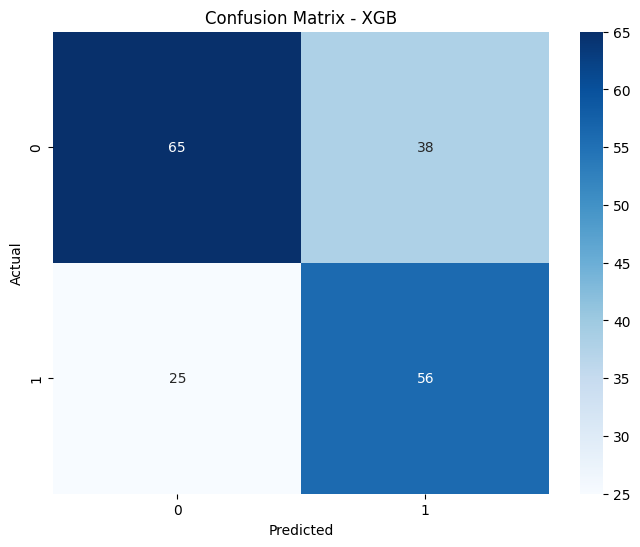

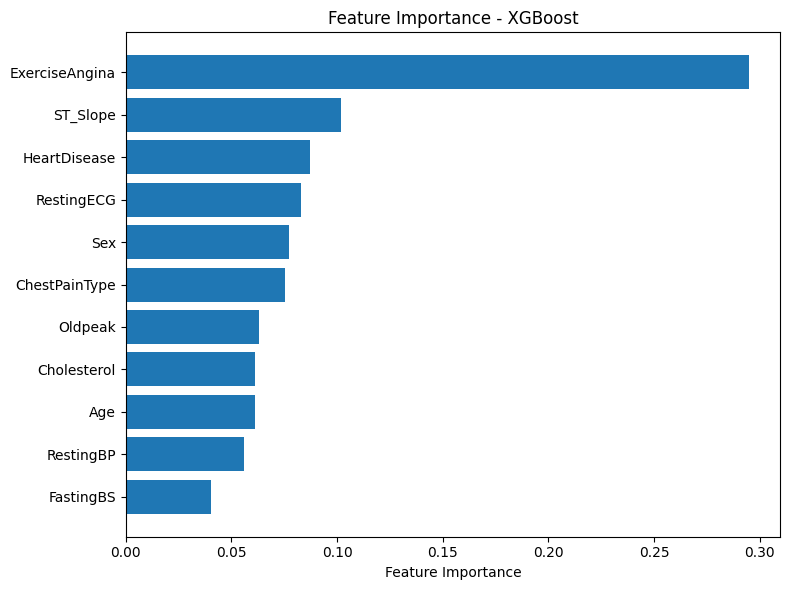


------------------------------------------------------------

Naive Bayes Classifier

Best cross validation scores:  0.7482993197278912

Test set accuracy: 0.7609
Training set accuracy: 0.7139
Test set AUC: 0.7543
Training set AUC: 0.7617
No overfitting


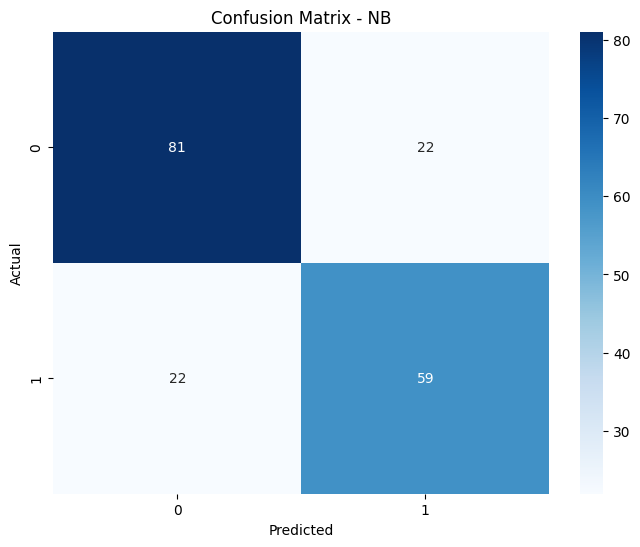


------------------------------------------------------------

K-Nearest Neighbors Classifier

Best parameters: {'n_neighbors': 7}
Best cross-validation score: 0.6253

Test set accuracy: 0.5870
Training set accuracy: 0.7084
Test set AUC: 0.6137
Training set AUC: 0.7885
Possible overfitting


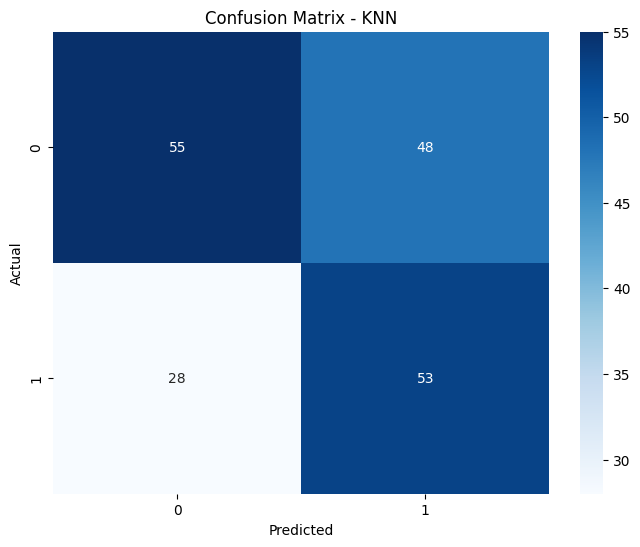


------------------------------------------------------------



In [ ]:
predict(hr_two_x_train_20, hr_two_x_test_20, hr_two_y_train_20, hr_two_y_test_20)

**Running the tests - first dataset, 3 categories**

**test size = 30%**

Decision Tree Classifier

Best parameters: {'max_depth': 3, 'max_leaf_nodes': 20, 'min_samples_leaf': 50, 'min_samples_split': 2}
Best cross-validation score: 0.4891

Test set accuracy: 0.5217
Training set accuracy: 0.5358
Test set AUC: 0.7091
Training set AUC: 0.7125
No overfitting


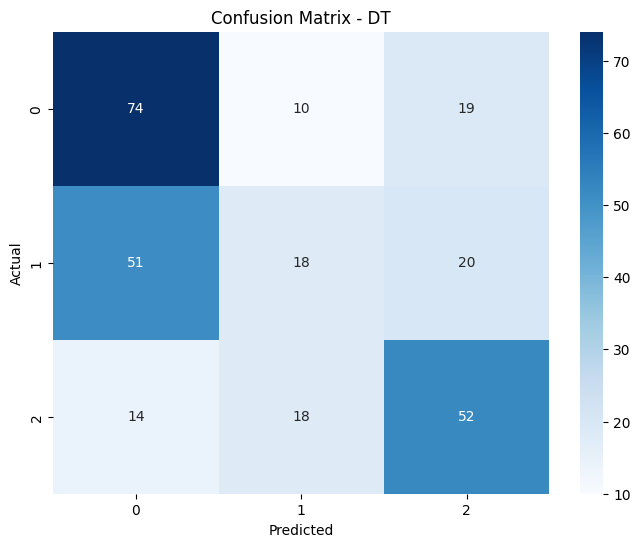

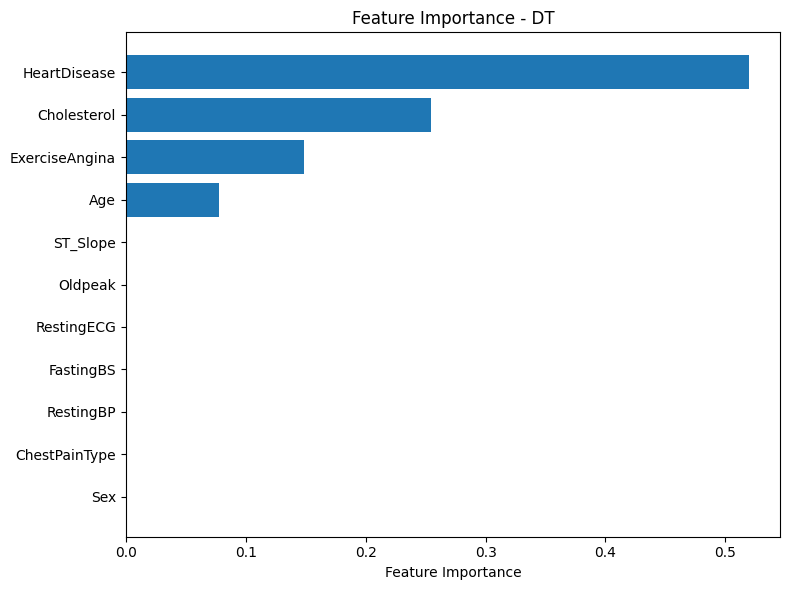


------------------------------------------------------------

Random Forest Classifier

Best parameters: {'max_depth': 10, 'n_estimators': 50}
Best cross-validation score: 0.5219

Test set accuracy: 0.5399
Training set accuracy: 0.9533
Test set AUC: 0.7242
Training set AUC: 0.9941
Possible overfitting


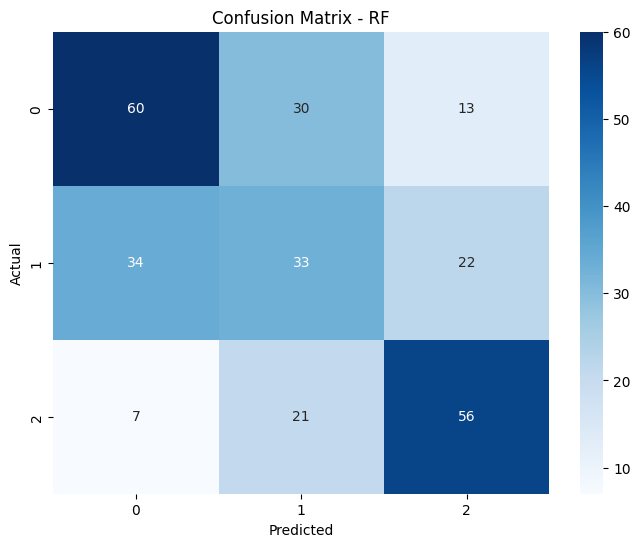

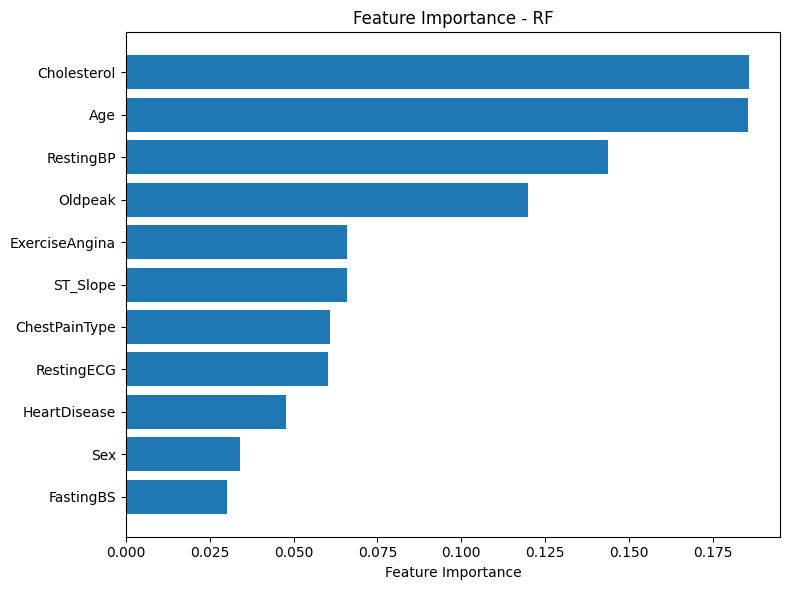


------------------------------------------------------------

XGBoost Classifier

Best cross validation score:  0.4827761627906977

Test set accuracy: 0.4783
Training set accuracy: 1.0000
Test set AUC: 0.6947
Training set AUC: 1.0000
Possible overfitting


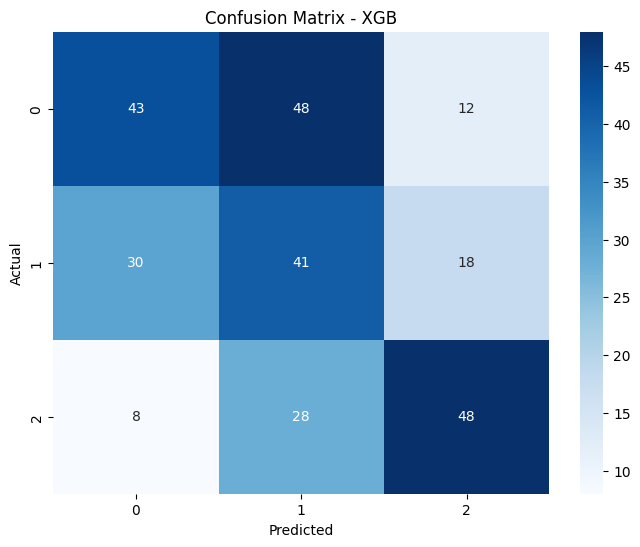

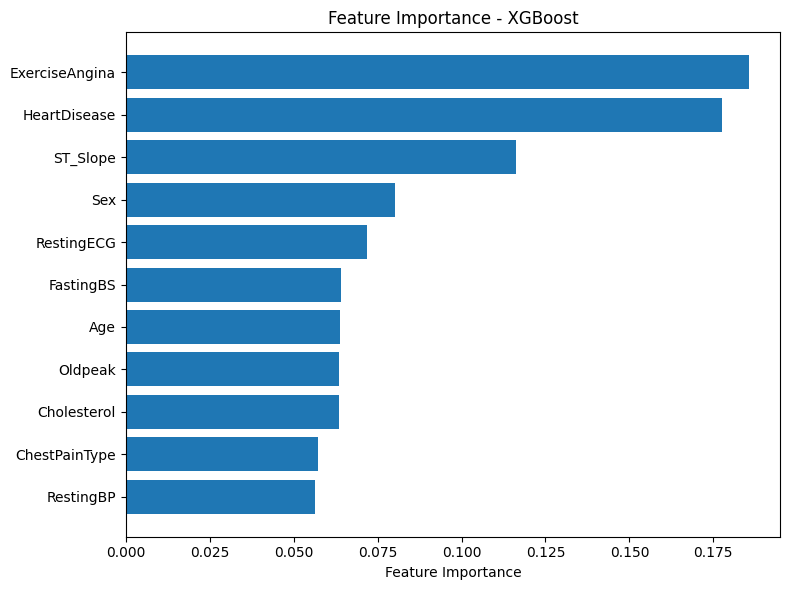


------------------------------------------------------------

Naive Bayes Classifier

Best cross validation scores:  0.5078125

Test set accuracy: 0.5507
Training set accuracy: 0.5234
Test set AUC: 0.7058
Training set AUC: 0.7103
No overfitting


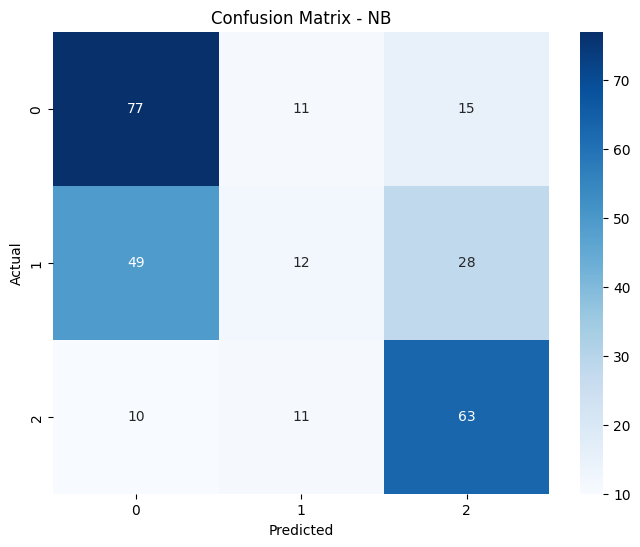


------------------------------------------------------------

K-Nearest Neighbors Classifier

Best parameters: {'n_neighbors': 10}
Best cross-validation score: 0.4205

Test set accuracy: 0.4167
Training set accuracy: 0.5530
Test set AUC: 0.5758
Training set AUC: 0.7456
Possible overfitting


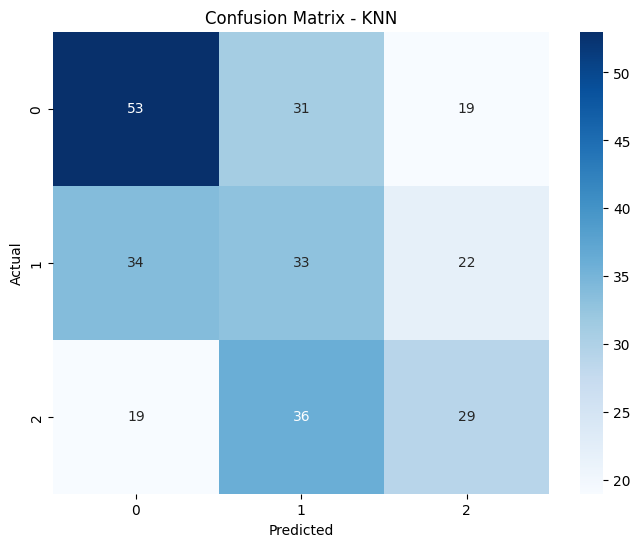


------------------------------------------------------------



In [ ]:
predict(hr_three_x_train_30, hr_three_x_test_30, hr_three_y_train_30, hr_three_y_test_30)

**test size = 25%**

In [ ]:
predict(hr_three_x_train_25, hr_three_x_test_25, hr_three_y_train_25, hr_three_y_test_25)

**test size = 20%**

Decision Tree Classifier

Best parameters: {'max_depth': 3, 'max_leaf_nodes': 20, 'min_samples_leaf': 50, 'min_samples_split': 2}
Best cross-validation score: 0.4891

Test set accuracy: 0.5217
Training set accuracy: 0.5358
Test set AUC: 0.7091
Training set AUC: 0.7125
Test set accuracy < training set accuracy -> Possible overfitting


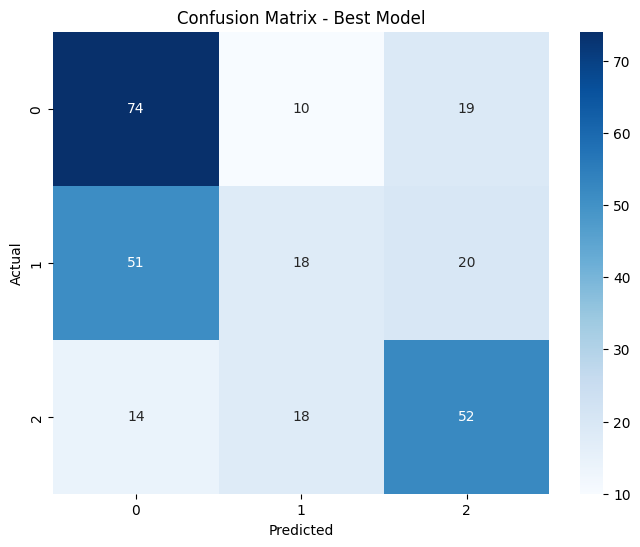

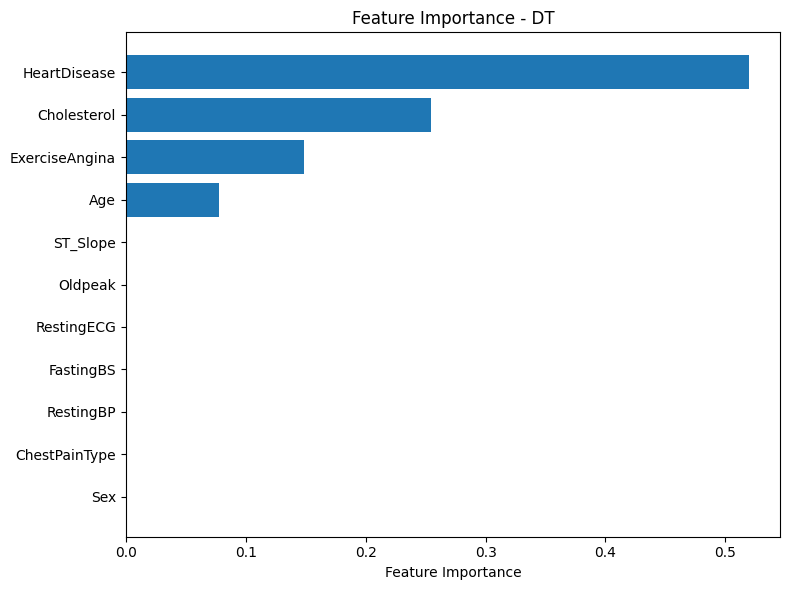


------------------------------------------------------------

Random Forest Classifier

Best parameters: {'max_depth': 10, 'n_estimators': 50}
Best cross-validation score: 0.5219

Test set accuracy: 0.5399
Training set accuracy: 0.9533
Test set AUC: 0.7242
Training set AUC: 0.9941
Test set accuracy < training set accuracy -> Possible overfitting


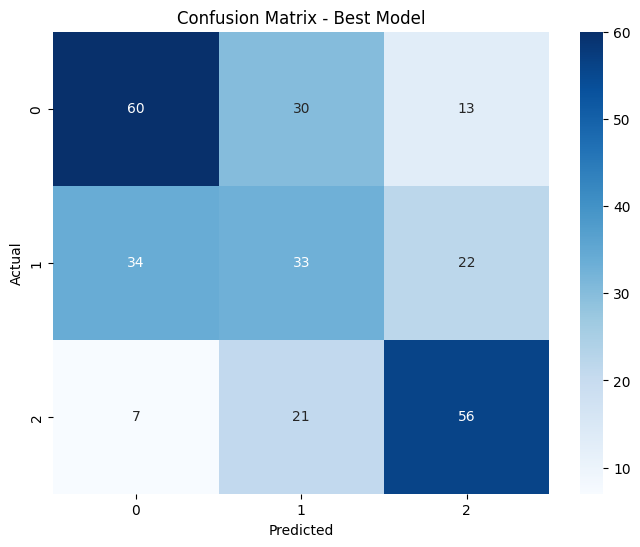

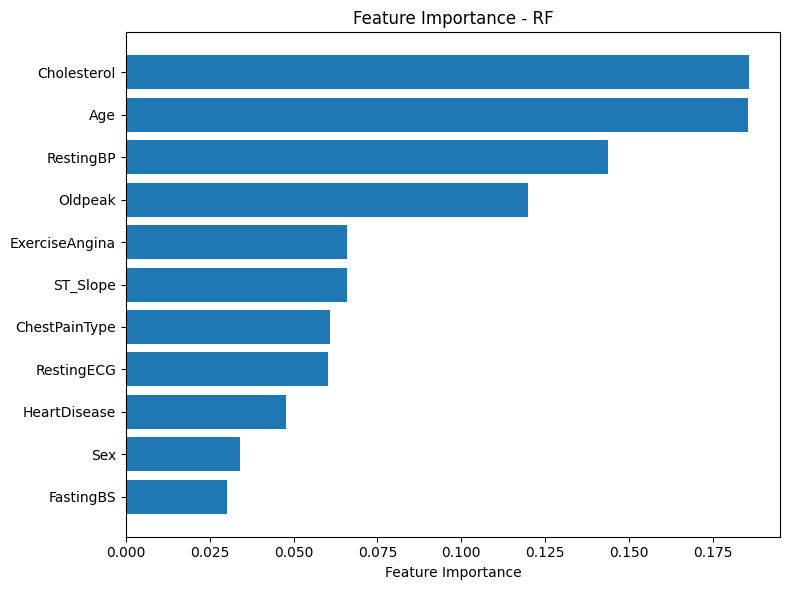


------------------------------------------------------------

XGBoost Classifier

Best cross validation score:  0.4827761627906977

Test set accuracy: 0.4783
Training set accuracy: 1.0000
Test set AUC: 0.6947
Training set AUC: 1.0000
Test set accuracy < training set accuracy -> overfitting


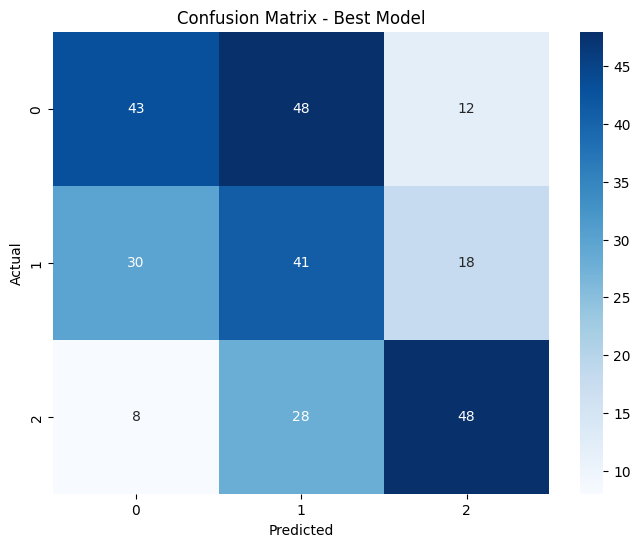

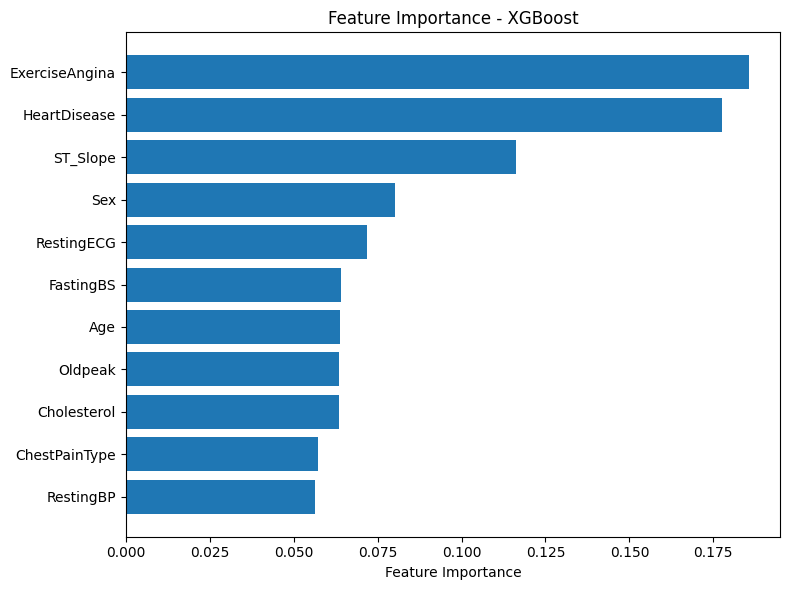


------------------------------------------------------------

Naive Bayes Classifier

Best cross validation scores:  0.5077884615384616

Test set accuracy: 0.5507
Training set accuracy: 0.5234
Test set AUC: 0.7058
Training set AUC: 0.7103
Test set accuracy > training set accuracy -> no overfitting


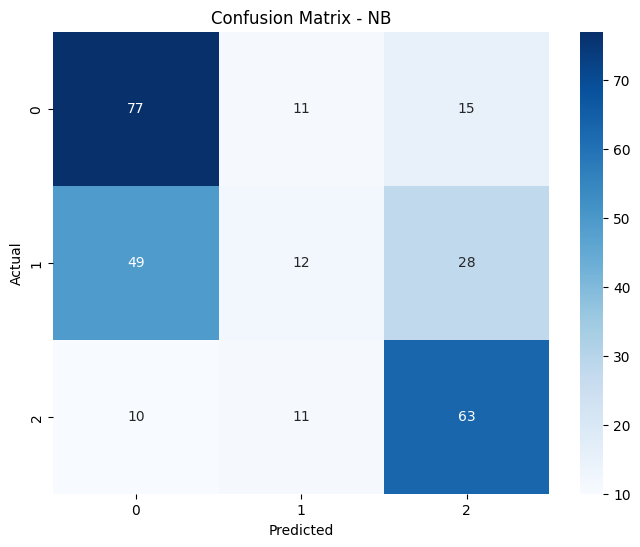


------------------------------------------------------------

K-Nearest Neighbors Classifier

Best parameters: {'n_neighbors': 10}
Best cross-validation score: 0.4205

Test set accuracy: 0.4167
Training set accuracy: 0.5530
Test set AUC: 0.5758
Training set AUC: 0.7456
Test set accuracy < training set accuracy -> overfitting


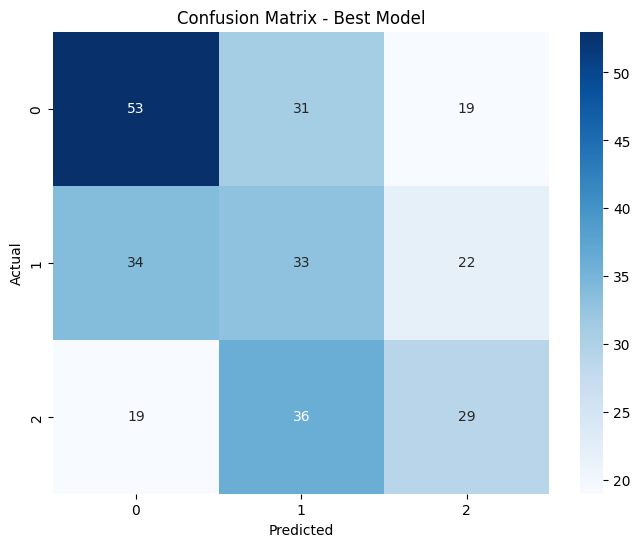


------------------------------------------------------------

Decision Tree Classifier

Best parameters: {'max_depth': 5, 'max_leaf_nodes': 20, 'min_samples_leaf': 50, 'min_samples_split': 2}
Best cross-validation score: 0.5327

Test set accuracy: 0.4565
Training set accuracy: 0.5504
Test set AUC: 0.6345
Training set AUC: 0.7280
Test set accuracy < training set accuracy -> Possible overfitting


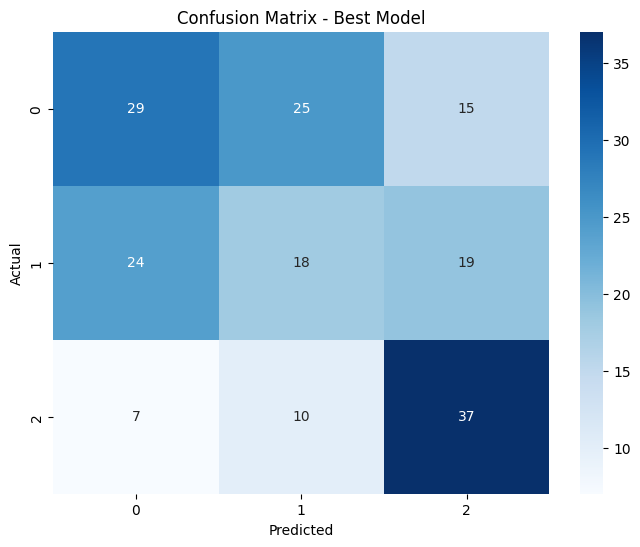

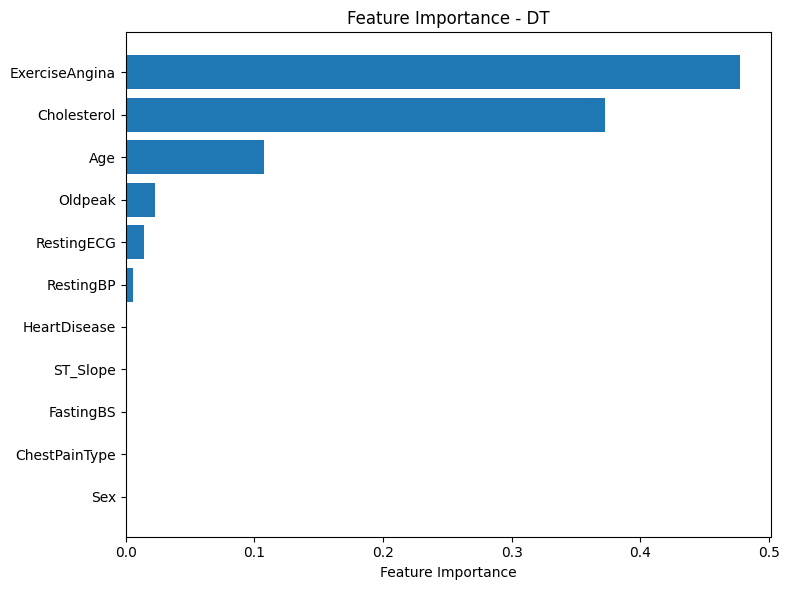


------------------------------------------------------------

Random Forest Classifier

Best parameters: {'max_depth': 3, 'n_estimators': 50}
Best cross-validation score: 0.5272

Test set accuracy: 0.5652
Training set accuracy: 0.5777
Test set AUC: 0.7191
Training set AUC: 0.7858
Test set accuracy < training set accuracy -> Possible overfitting


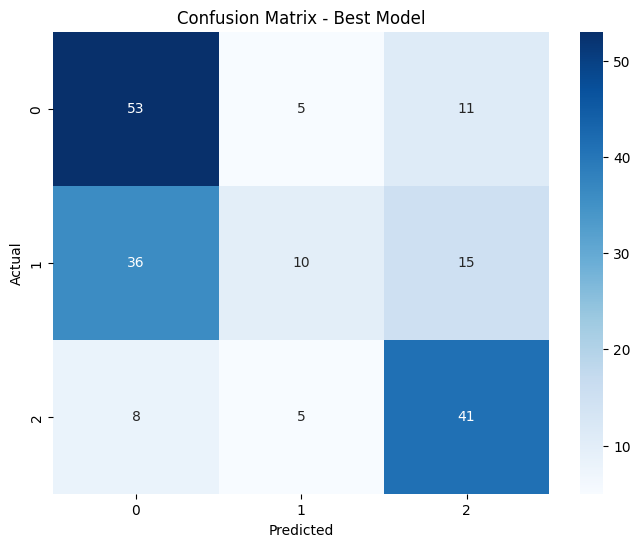

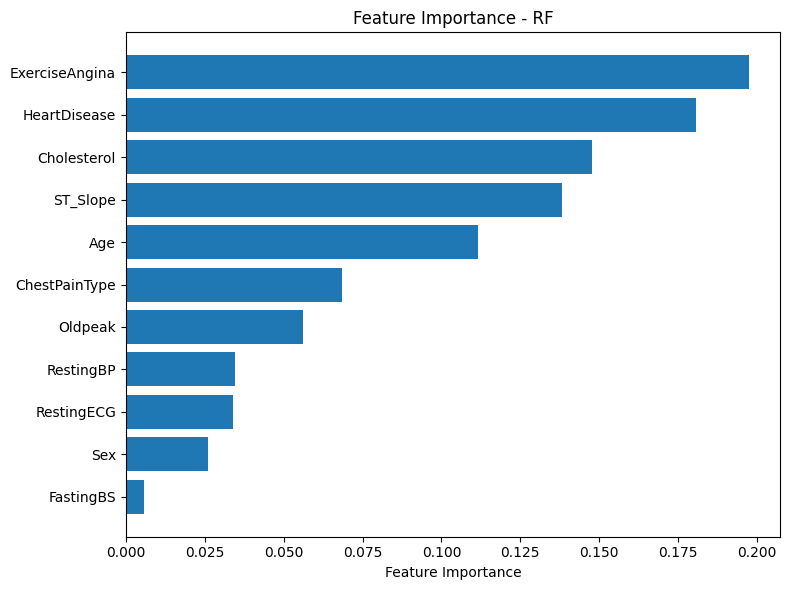


------------------------------------------------------------

XGBoost Classifier

Best cross validation score:  0.49992544963190755

Test set accuracy: 0.4728
Training set accuracy: 1.0000
Test set AUC: 0.6656
Training set AUC: 1.0000
Test set accuracy < training set accuracy -> overfitting


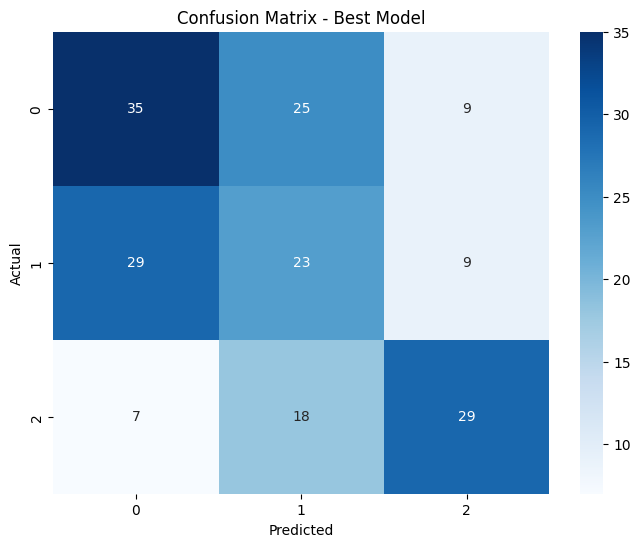

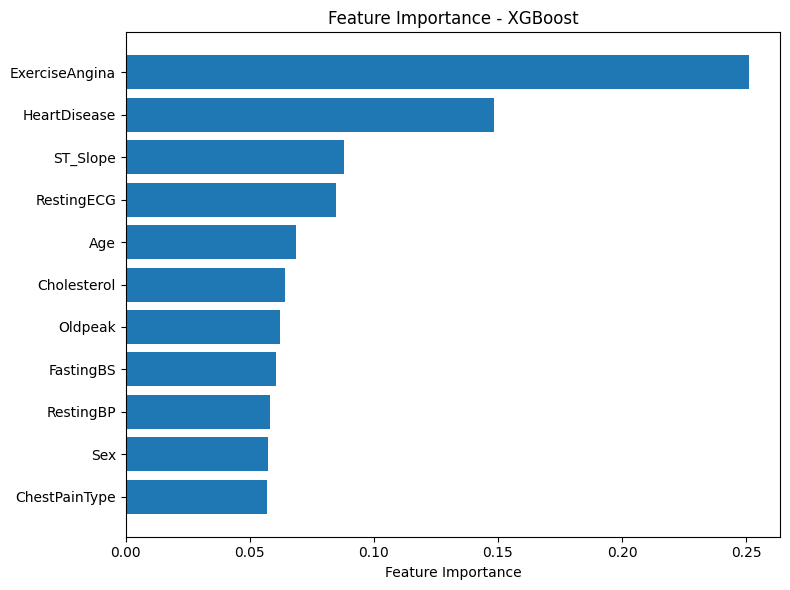


------------------------------------------------------------

Naive Bayes Classifier

Best cross validation scores:  0.5217780262790047

Test set accuracy: 0.5489
Training set accuracy: 0.5272
Test set AUC: 0.6986
Training set AUC: 0.7118
Test set accuracy > training set accuracy -> no overfitting


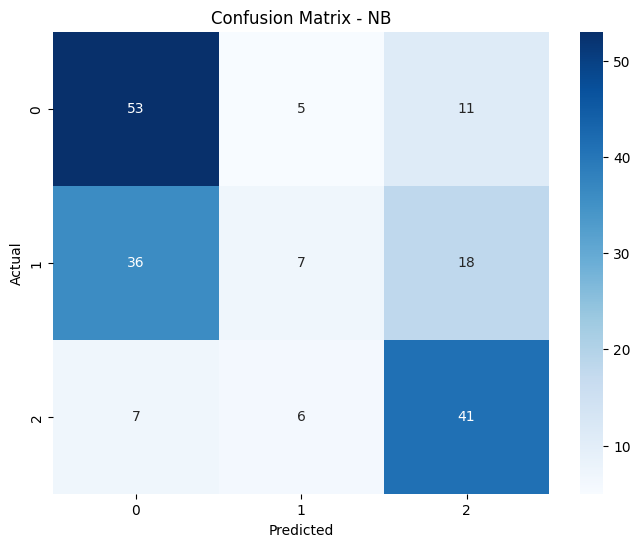


------------------------------------------------------------

K-Nearest Neighbors Classifier

Best parameters: {'n_neighbors': 10}
Best cross-validation score: 0.4319

Test set accuracy: 0.3967
Training set accuracy: 0.5463
Test set AUC: 0.5473
Training set AUC: 0.7517
Test set accuracy < training set accuracy -> overfitting


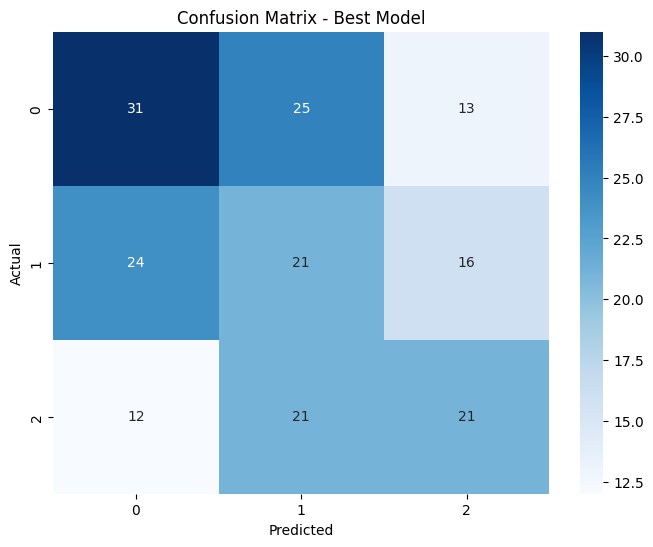


------------------------------------------------------------

Decision Tree Classifier

Best parameters: {'max_depth': 3, 'max_leaf_nodes': 20, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best cross-validation score: 0.4883

Test set accuracy: 0.4783
Training set accuracy: 0.5305
Test set AUC: 0.6772
Training set AUC: 0.7169
Test set accuracy < training set accuracy -> Possible overfitting


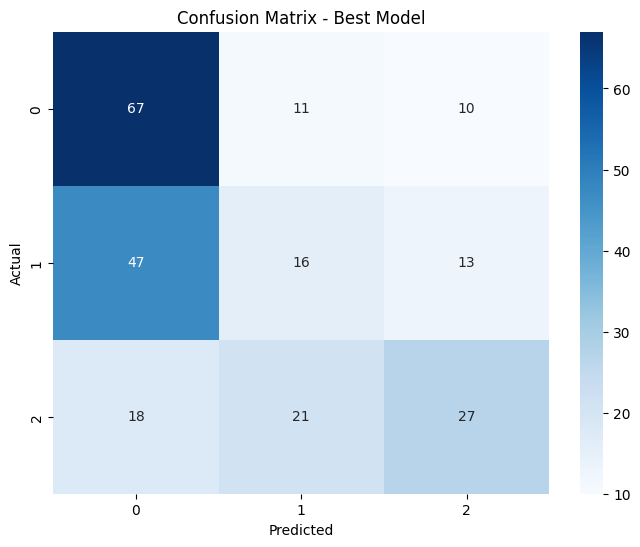

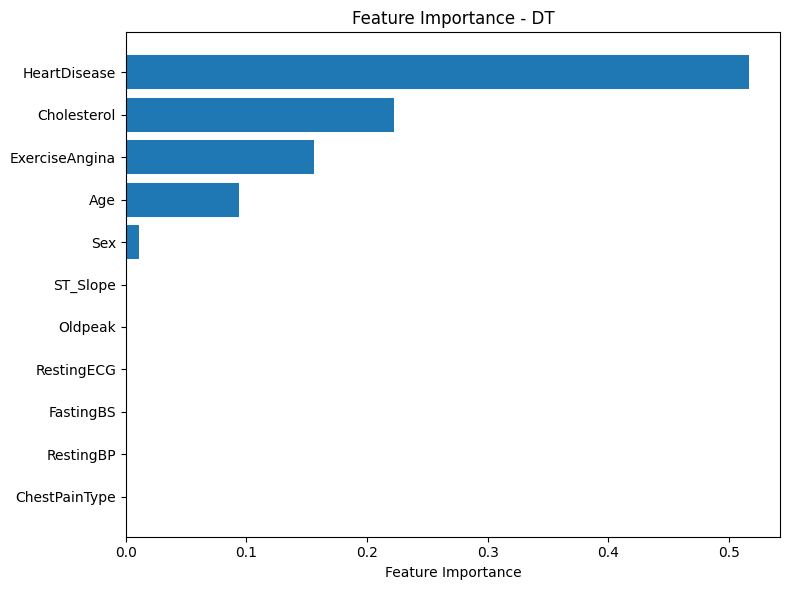


------------------------------------------------------------

Random Forest Classifier

Best parameters: {'max_depth': 3, 'n_estimators': 200}
Best cross-validation score: 0.5276

Test set accuracy: 0.5261
Training set accuracy: 0.6003
Test set AUC: 0.7118
Training set AUC: 0.7974
Test set accuracy < training set accuracy -> Possible overfitting


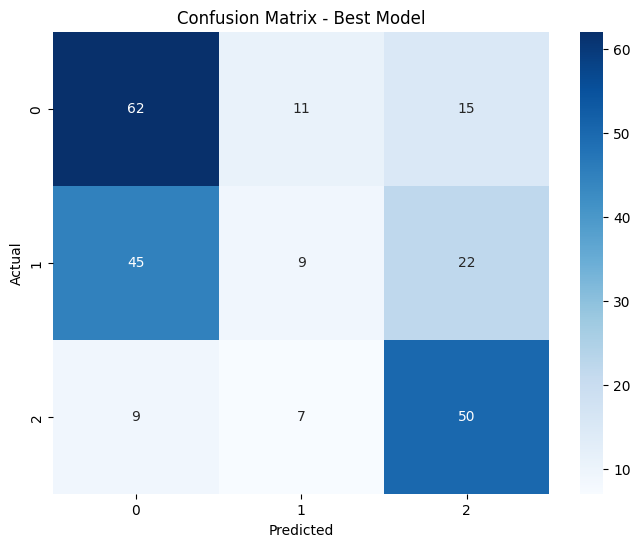

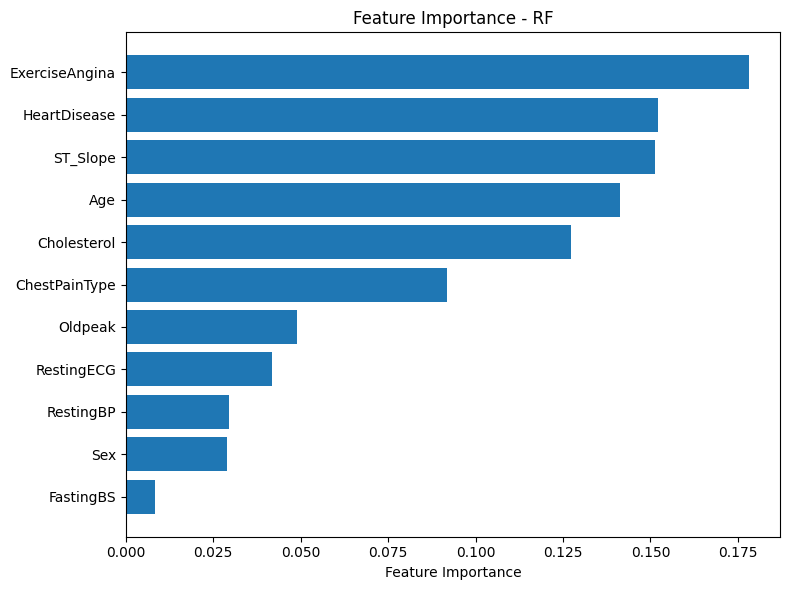


------------------------------------------------------------

XGBoost Classifier

Best cross validation score:  0.5014915899714377

Test set accuracy: 0.4522
Training set accuracy: 1.0000
Test set AUC: 0.6620
Training set AUC: 1.0000
Test set accuracy < training set accuracy -> overfitting


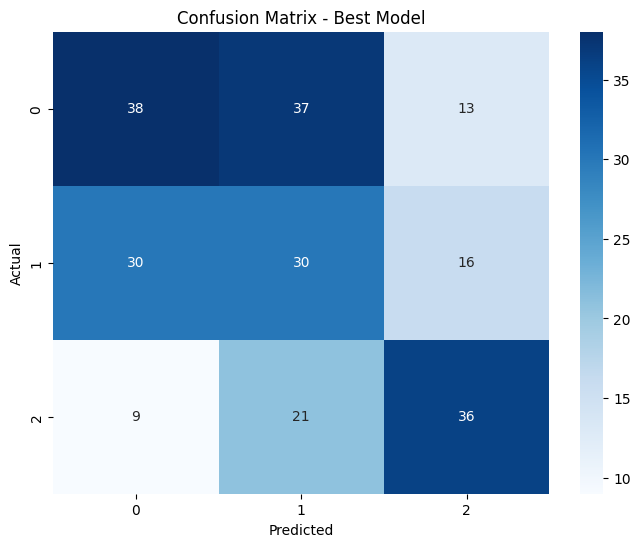

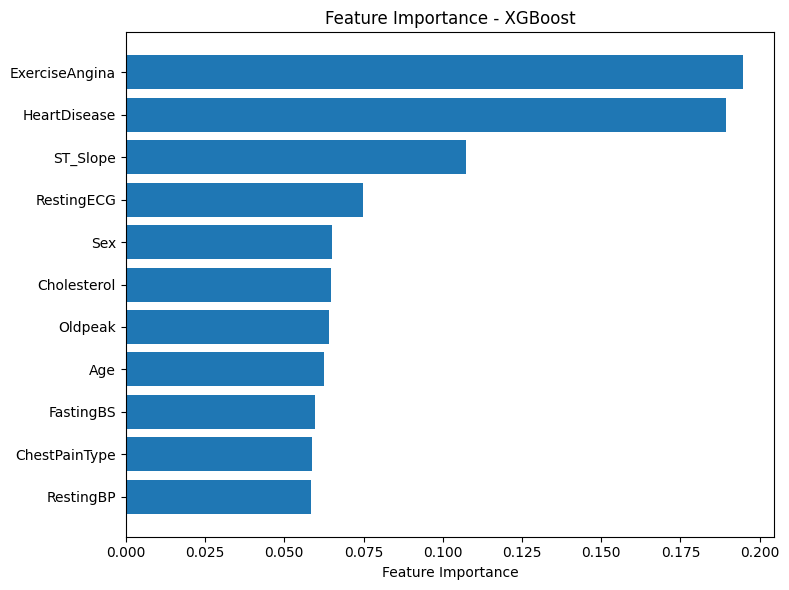


------------------------------------------------------------

Naive Bayes Classifier

Best cross validation scores:  0.5218024175685083

Test set accuracy: 0.5348
Training set accuracy: 0.5363
Test set AUC: 0.6896
Training set AUC: 0.7153
Test set accuracy < training set accuracy -> overfitting


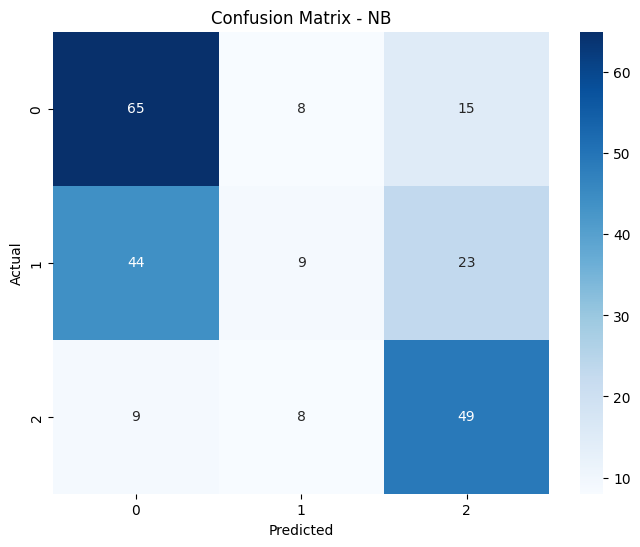


------------------------------------------------------------

K-Nearest Neighbors Classifier

Best parameters: {'n_neighbors': 10}
Best cross-validation score: 0.4316

Test set accuracy: 0.4043
Training set accuracy: 0.5640
Test set AUC: 0.5500
Training set AUC: 0.7585
Test set accuracy < training set accuracy -> overfitting


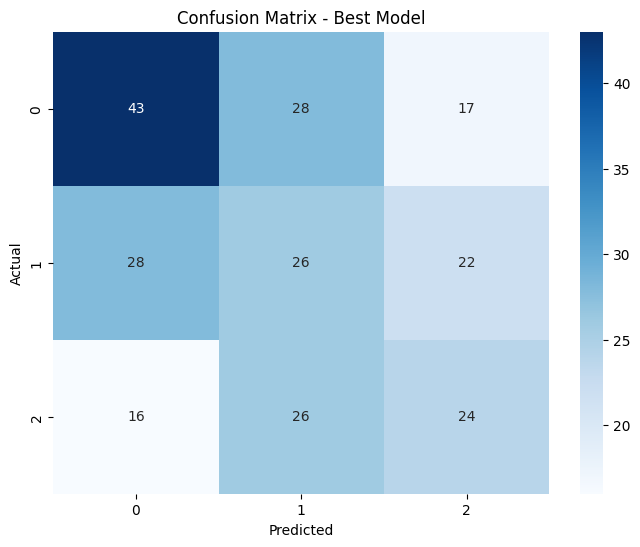


------------------------------------------------------------



In [ ]:
predict(hr_three_x_train_20, hr_three_x_test_20, hr_three_y_train_20, hr_three_y_test_20)

**Running the tests - second dataset, 2 categories**

**test size = 30%**

Decision Tree Classifier

Best parameters: {'max_depth': 3, 'max_leaf_nodes': 20, 'min_samples_leaf': 100, 'min_samples_split': 2}
Best cross-validation score: 0.6851

Test set accuracy: 0.6573
Training set accuracy: 0.6869
Test set AUC: 0.7369
Training set AUC: 0.7321
No overfitting


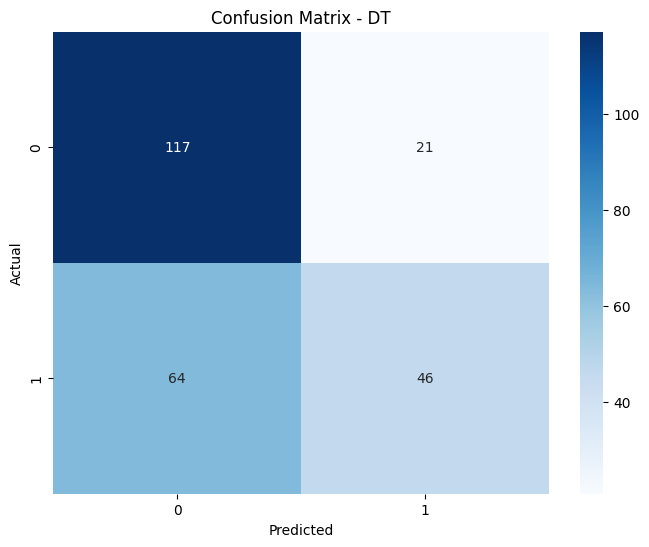

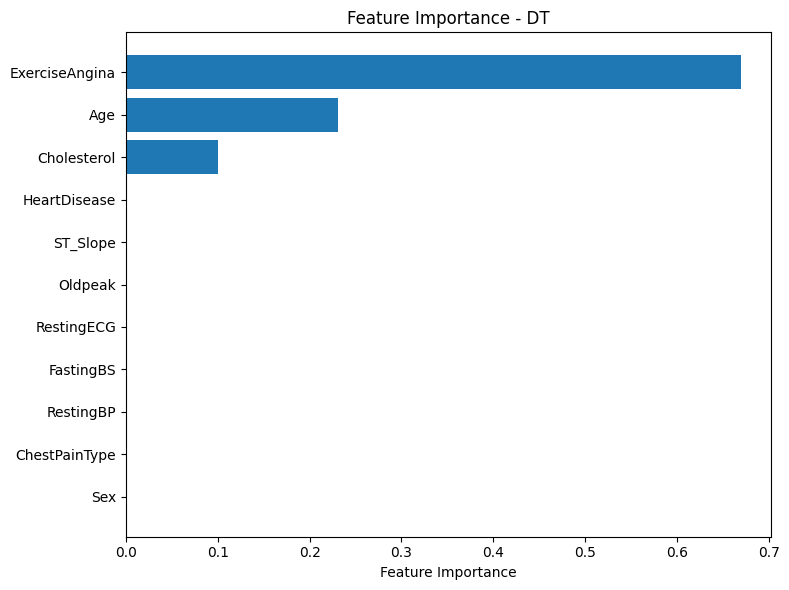


------------------------------------------------------------

Random Forest Classifier

Best parameters: {'max_depth': 7, 'n_estimators': 100}
Best cross-validation score: 0.7213

Test set accuracy: 0.7782
Training set accuracy: 0.8997
Test set AUC: 0.8416
Training set AUC: 0.9673
Possible overfitting


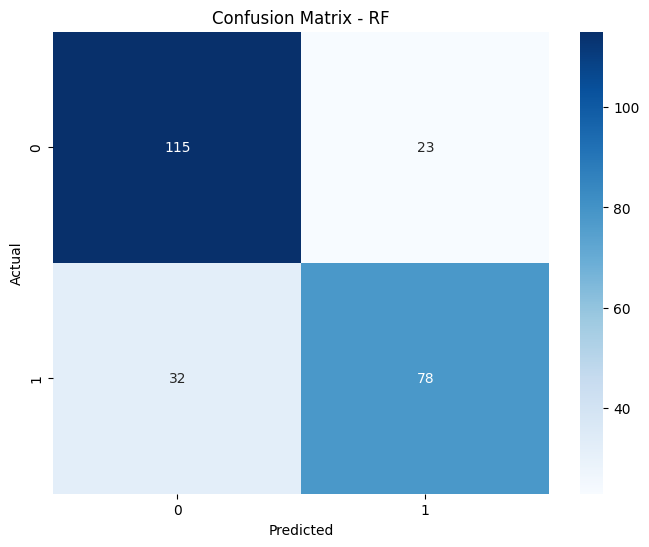

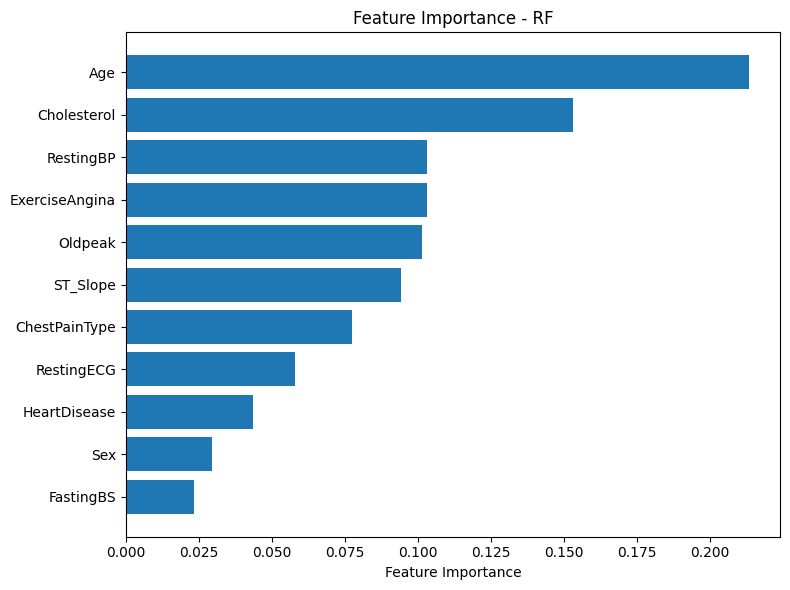


------------------------------------------------------------

XGBoost Classifier

Best cross validation score:  0.7040779610194902

Test set accuracy: 0.7419
Training set accuracy: 1.0000
Test set AUC: 0.8095
Training set AUC: 1.0000
Possible overfitting


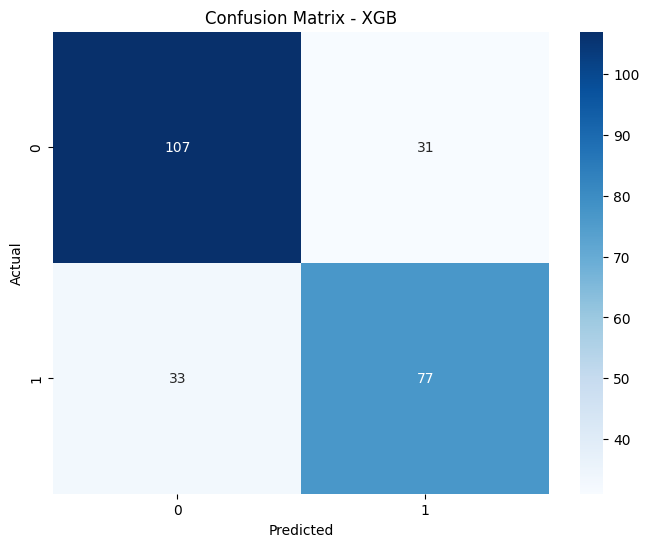

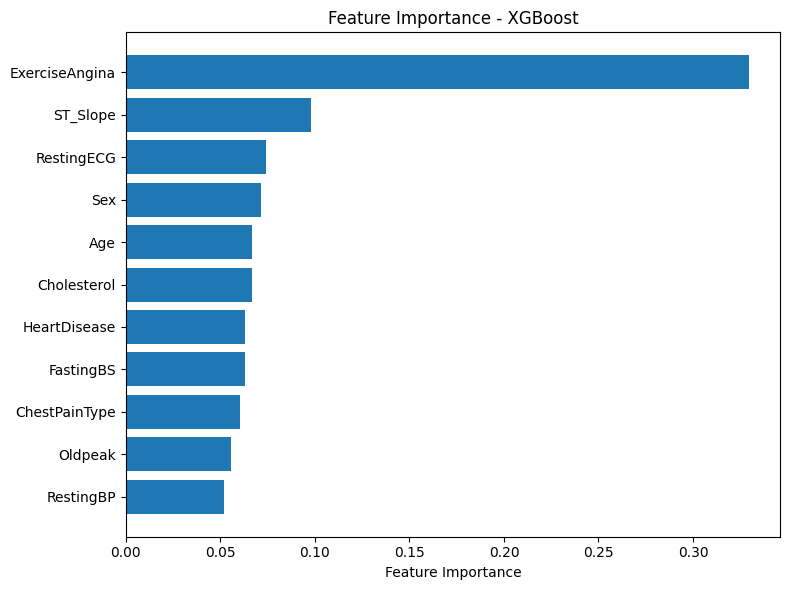


------------------------------------------------------------

Naive Bayes Classifier

Best cross validation scores:  0.7155172413793104

Test set accuracy: 0.7379
Training set accuracy: 0.6990
Test set AUC: 0.8096
Training set AUC: 0.7575
No overfitting


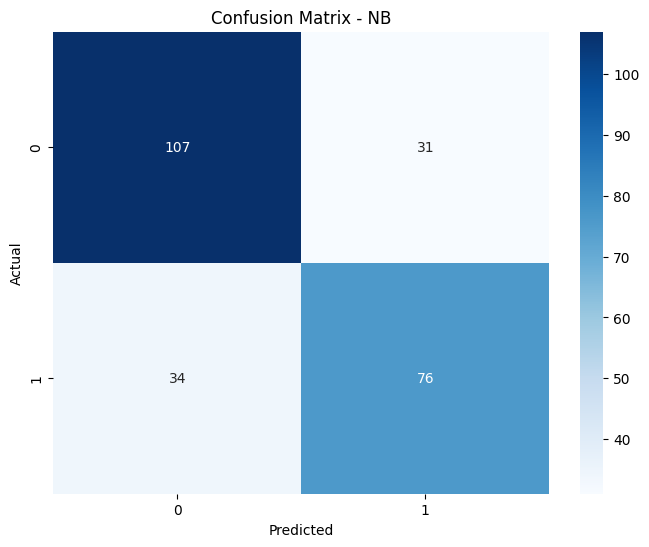


------------------------------------------------------------

K-Nearest Neighbors Classifier

Best parameters: {'n_neighbors': 10}
Best cross-validation score: 0.6350

Test set accuracy: 0.6532
Training set accuracy: 0.6851
Test set AUC: 0.6652
Training set AUC: 0.7430
No overfitting


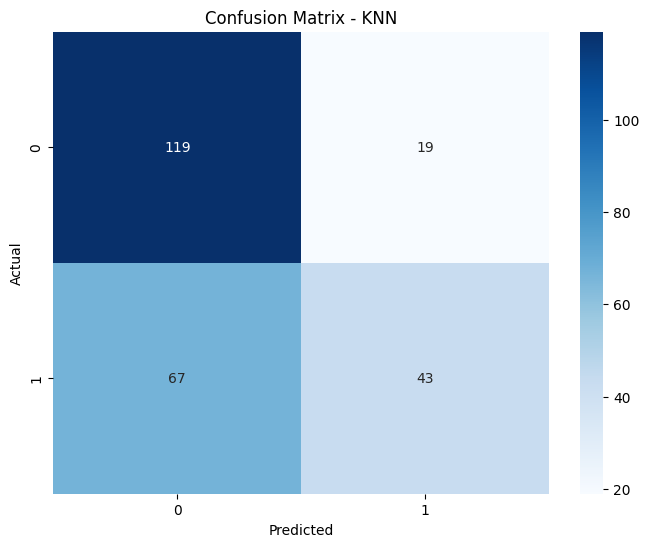


------------------------------------------------------------



In [ ]:
predict(fixed_hr_two_x_train_30, fixed_hr_two_x_test_30, fixed_hr_two_y_train_30, fixed_hr_two_y_test_30)

**test size = 25%**

Decision Tree Classifier

Best parameters: {'max_depth': 3, 'max_leaf_nodes': 20, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best cross-validation score: 0.6833

Test set accuracy: 0.7246
Training set accuracy: 0.7237
Test set AUC: 0.7413
Training set AUC: 0.7876
No overfitting


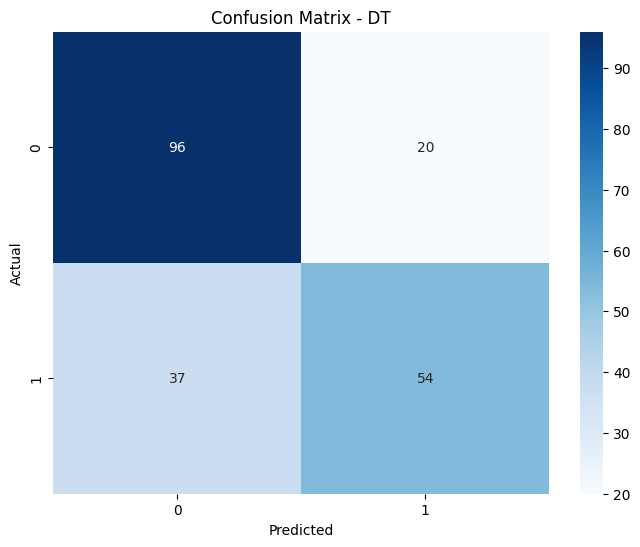

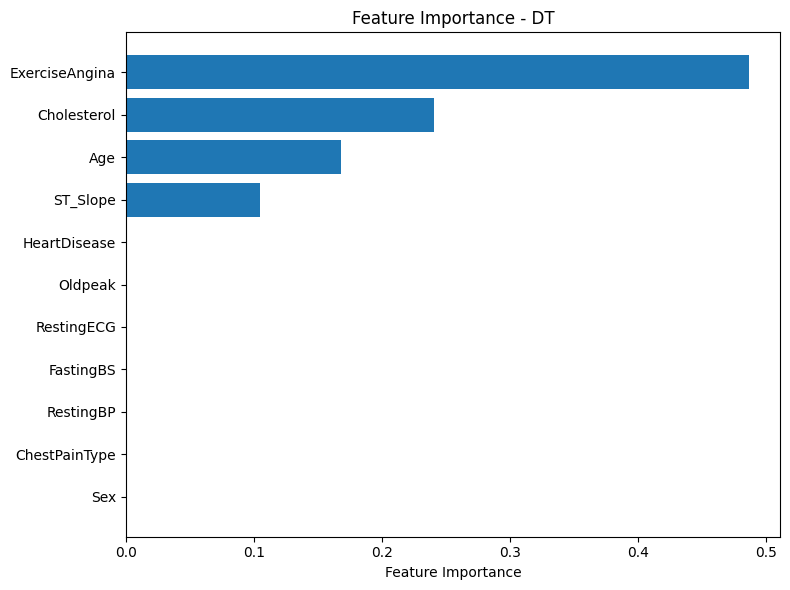


------------------------------------------------------------

Random Forest Classifier

Best parameters: {'max_depth': 5, 'n_estimators': 200}
Best cross-validation score: 0.7237

Test set accuracy: 0.8068
Training set accuracy: 0.8223
Test set AUC: 0.8545
Training set AUC: 0.8930
No overfitting


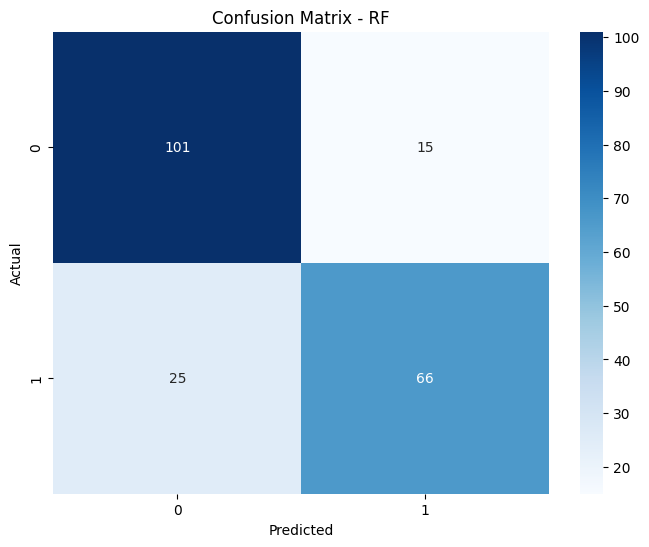

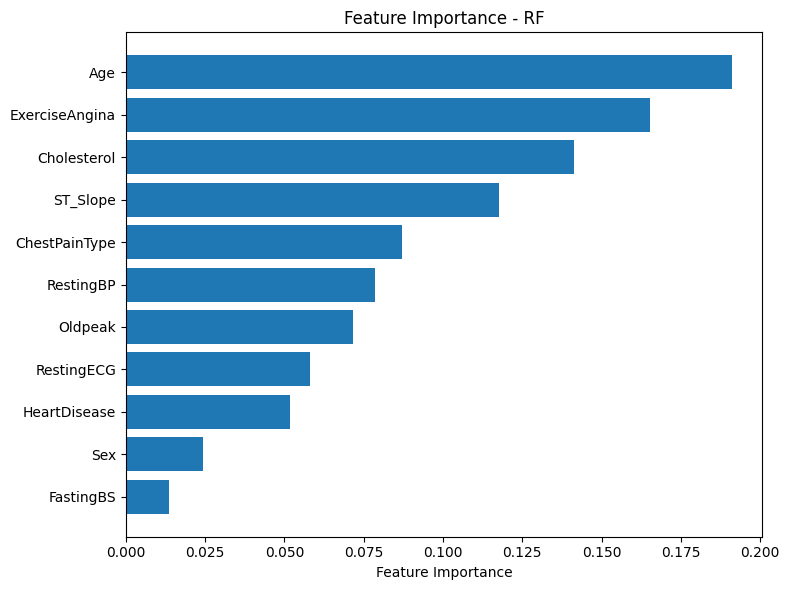


------------------------------------------------------------

XGBoost Classifier

Best cross validation score:  0.7043928665093103

Test set accuracy: 0.7053
Training set accuracy: 1.0000
Test set AUC: 0.8019
Training set AUC: 1.0000
Possible overfitting


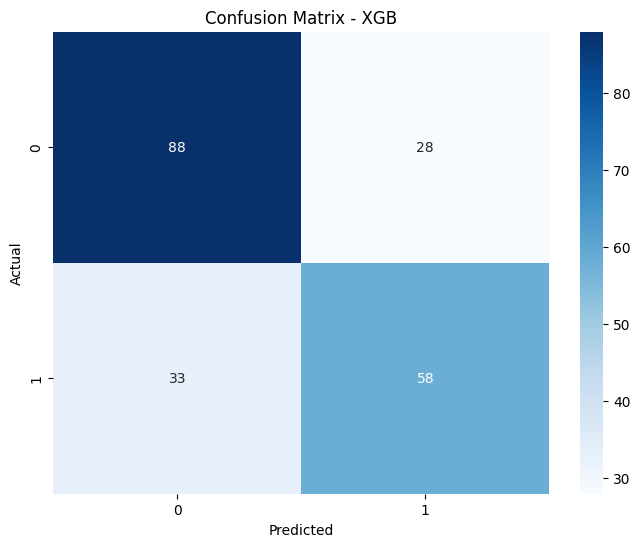

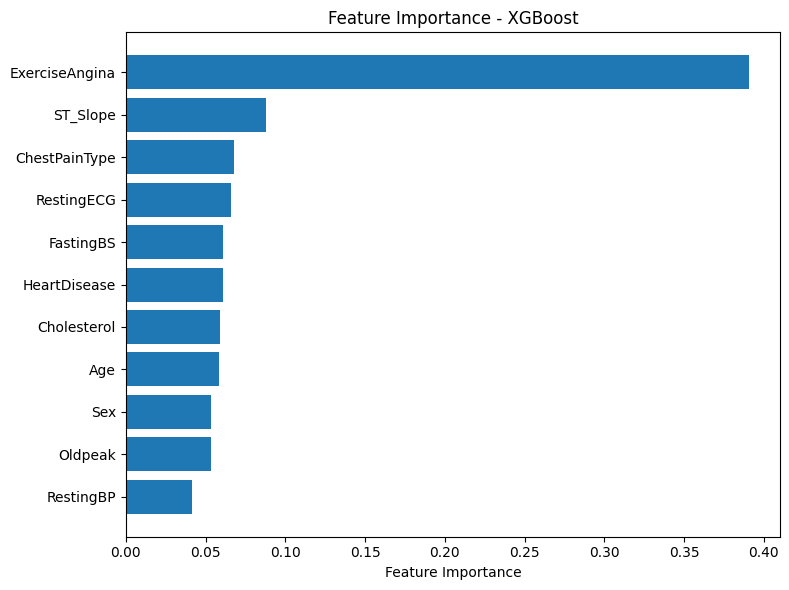


------------------------------------------------------------

Naive Bayes Classifier

Best cross validation scores:  0.7096774193548387

Test set accuracy: 0.7440
Training set accuracy: 0.6963
Test set AUC: 0.8120
Training set AUC: 0.7584
No overfitting


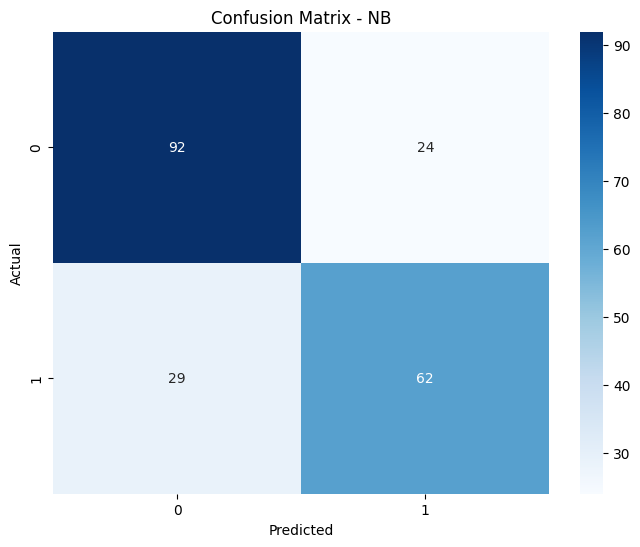


------------------------------------------------------------

K-Nearest Neighbors Classifier

Best parameters: {'n_neighbors': 10}
Best cross-validation score: 0.6219

Test set accuracy: 0.6715
Training set accuracy: 0.6753
Test set AUC: 0.6816
Training set AUC: 0.7420
No overfitting


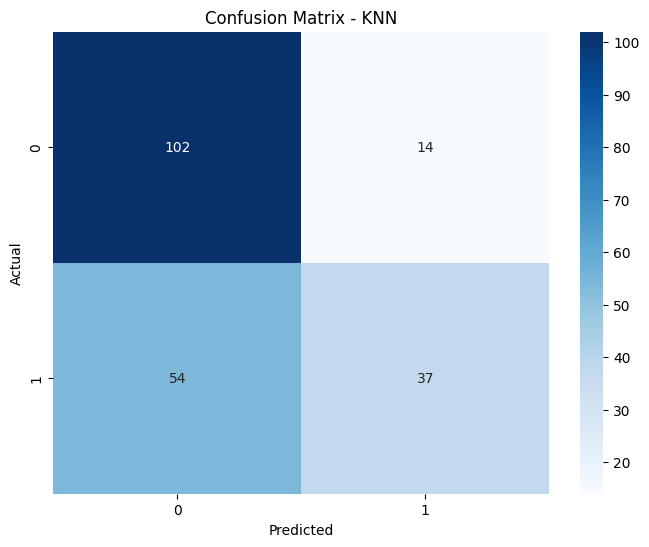


------------------------------------------------------------



In [ ]:
predict(fixed_hr_two_x_train_25, fixed_hr_two_x_test_25, fixed_hr_two_y_train_25, fixed_hr_two_y_test_25)

**test size = 20%**

Decision Tree Classifier

Best parameters: {'max_depth': 7, 'max_leaf_nodes': 20, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best cross-validation score: 0.7030

Test set accuracy: 0.7530
Training set accuracy: 0.7848
Test set AUC: 0.7870
Training set AUC: 0.8451
No overfitting


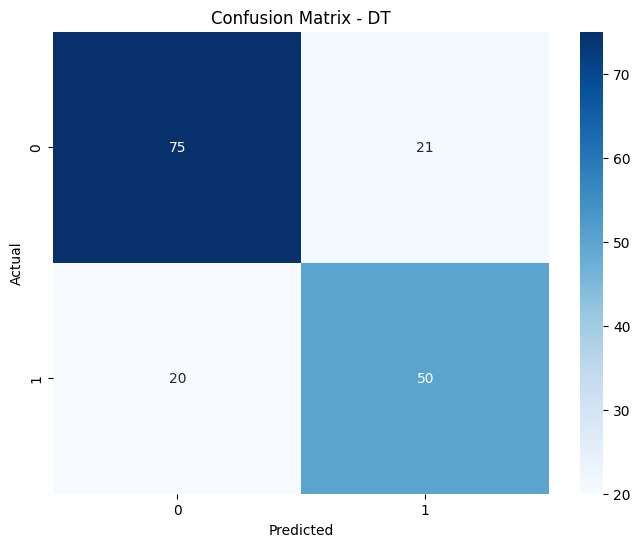

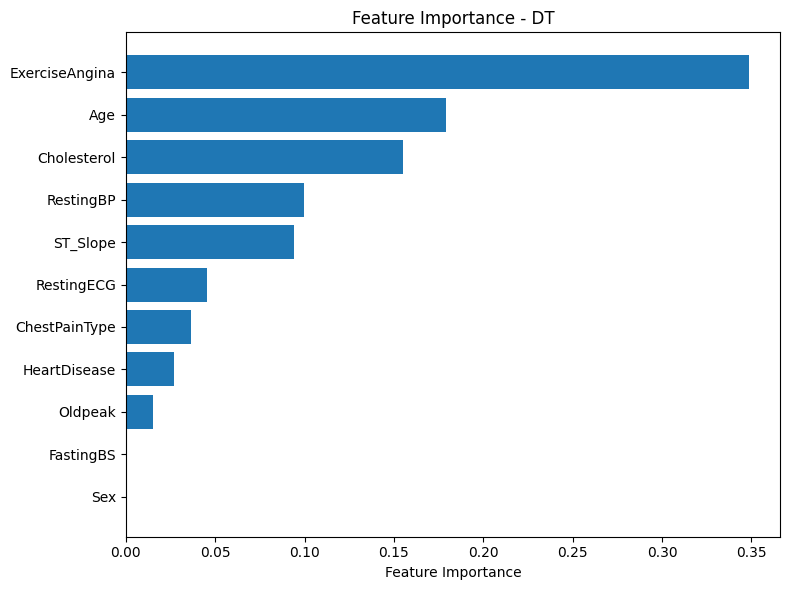


------------------------------------------------------------

Random Forest Classifier

Best parameters: {'max_depth': 7, 'n_estimators': 200}
Best cross-validation score: 0.7318

Test set accuracy: 0.7892
Training set accuracy: 0.8848
Test set AUC: 0.8519
Training set AUC: 0.9572
Possible overfitting


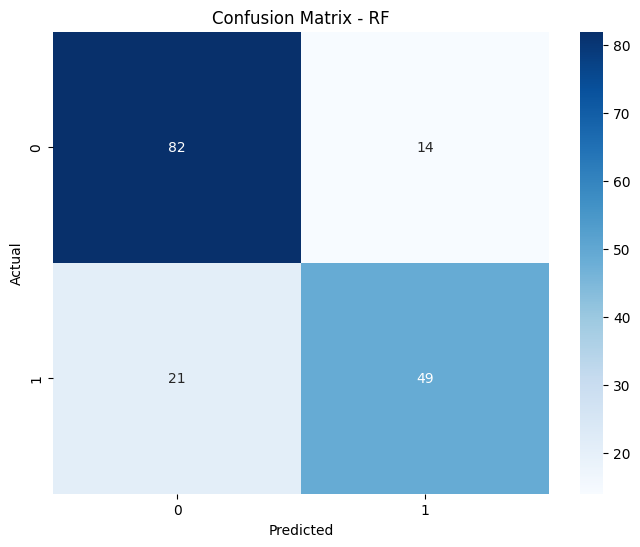

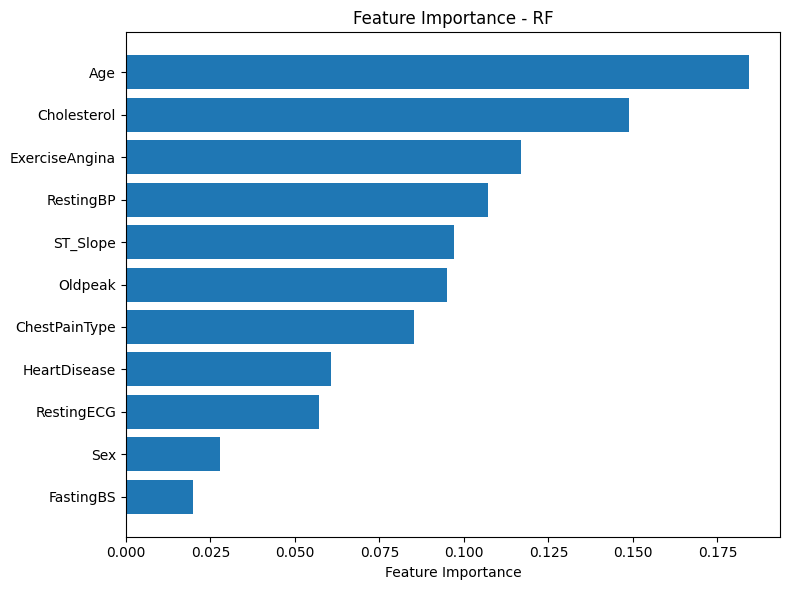


------------------------------------------------------------

XGBoost Classifier

Best cross validation score:  0.6893939393939393

Test set accuracy: 0.7711
Training set accuracy: 1.0000
Test set AUC: 0.8438
Training set AUC: 1.0000
Possible overfitting


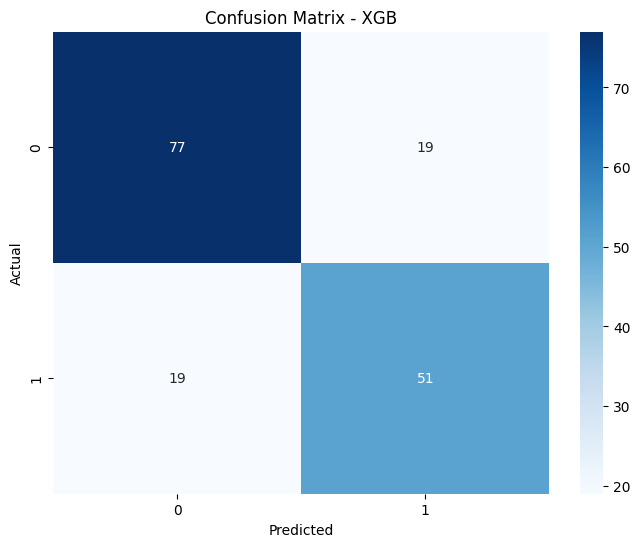

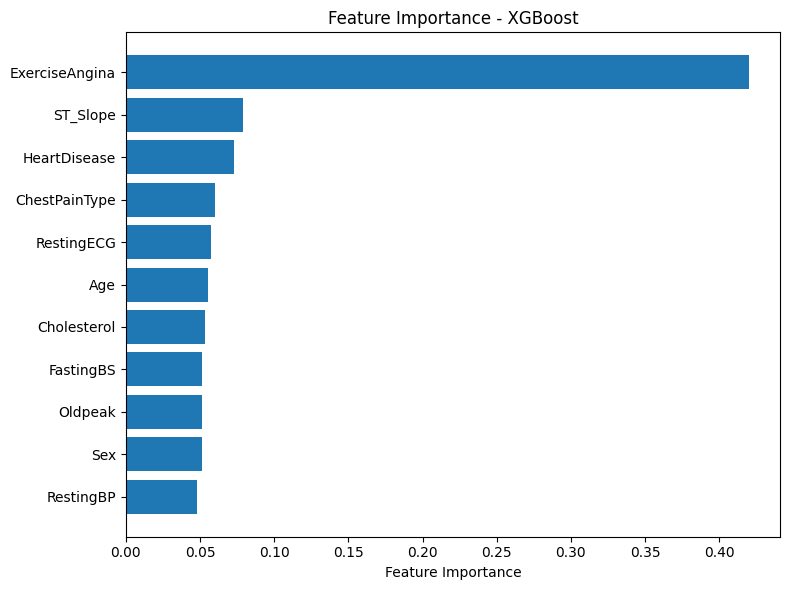


------------------------------------------------------------

Naive Bayes Classifier

Best cross validation scores:  0.7575757575757576

Test set accuracy: 0.7169
Training set accuracy: 0.7061
Test set AUC: 0.8007
Training set AUC: 0.7641
No overfitting


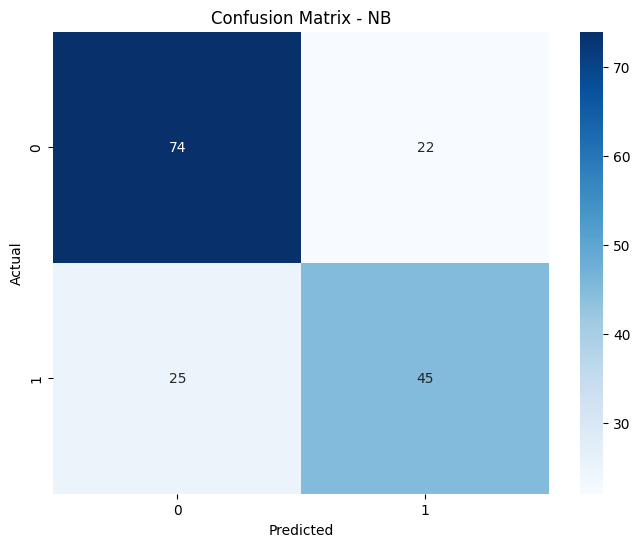


------------------------------------------------------------

K-Nearest Neighbors Classifier

Best parameters: {'n_neighbors': 10}
Best cross-validation score: 0.6394

Test set accuracy: 0.6867
Training set accuracy: 0.6803
Test set AUC: 0.7041
Training set AUC: 0.7414
No overfitting


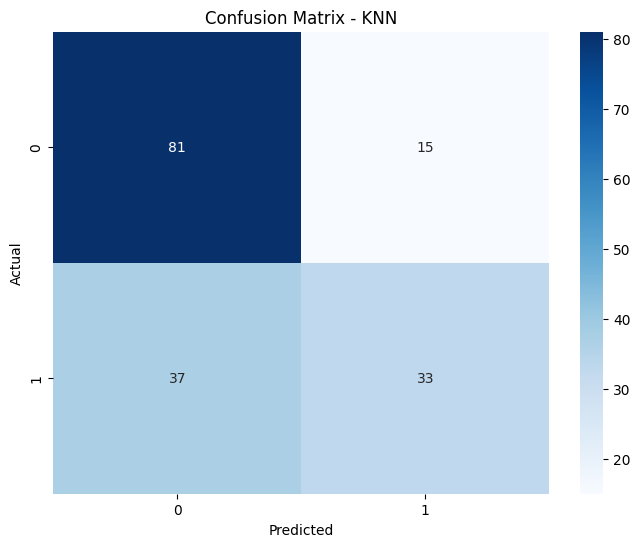


------------------------------------------------------------



In [ ]:
predict(fixed_hr_two_x_train_20, fixed_hr_two_x_test_20, fixed_hr_two_y_train_20, fixed_hr_two_y_test_20)

**Running the tests - second dataset, 3 categories**

**test size = 30%**

Decision Tree Classifier

Best parameters: {'max_depth': 3, 'max_leaf_nodes': 20, 'min_samples_leaf': 100, 'min_samples_split': 2}
Best cross-validation score: 0.4965

Test set accuracy: 0.4919
Training set accuracy: 0.5173
Test set AUC: 0.6674
Training set AUC: 0.6840
No overfitting


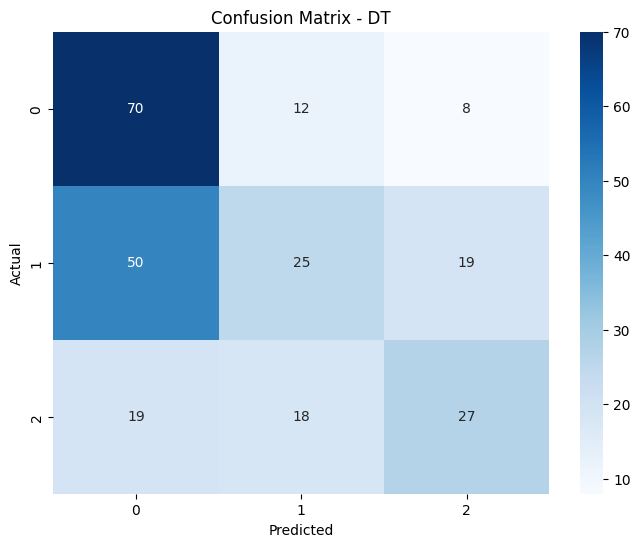

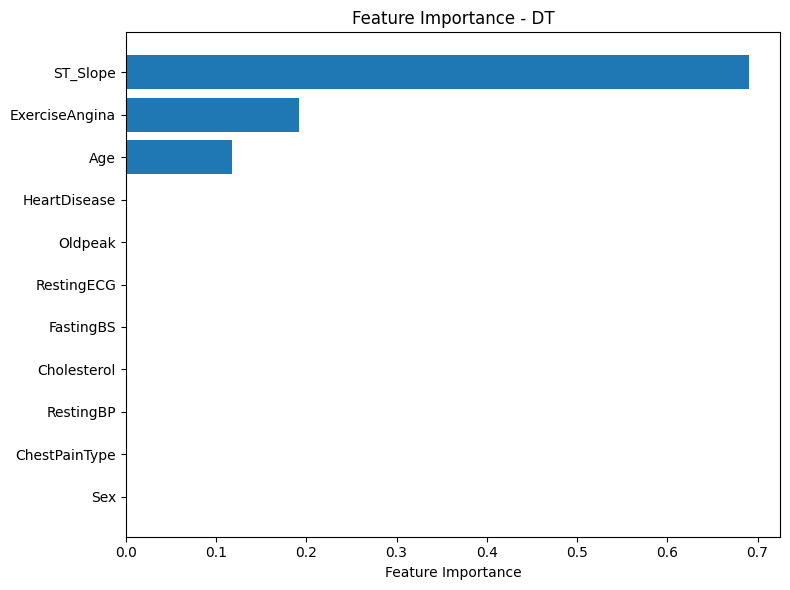


------------------------------------------------------------

Random Forest Classifier

Best parameters: {'max_depth': 7, 'n_estimators': 100}
Best cross-validation score: 0.5103

Test set accuracy: 0.5484
Training set accuracy: 0.8599
Test set AUC: 0.7259
Training set AUC: 0.9664
Possible overfitting


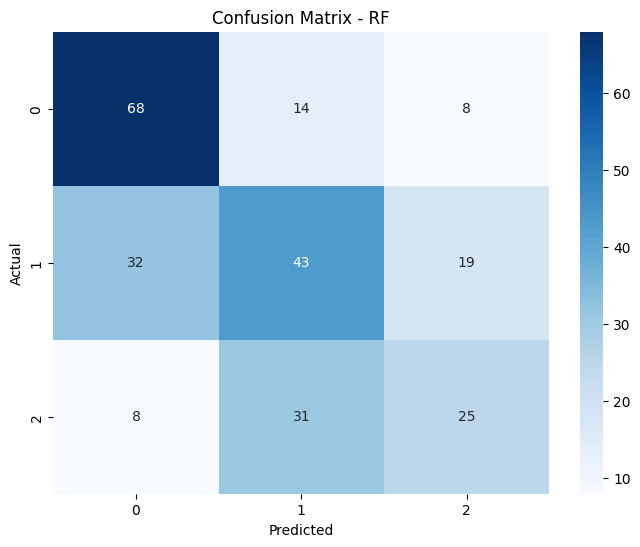

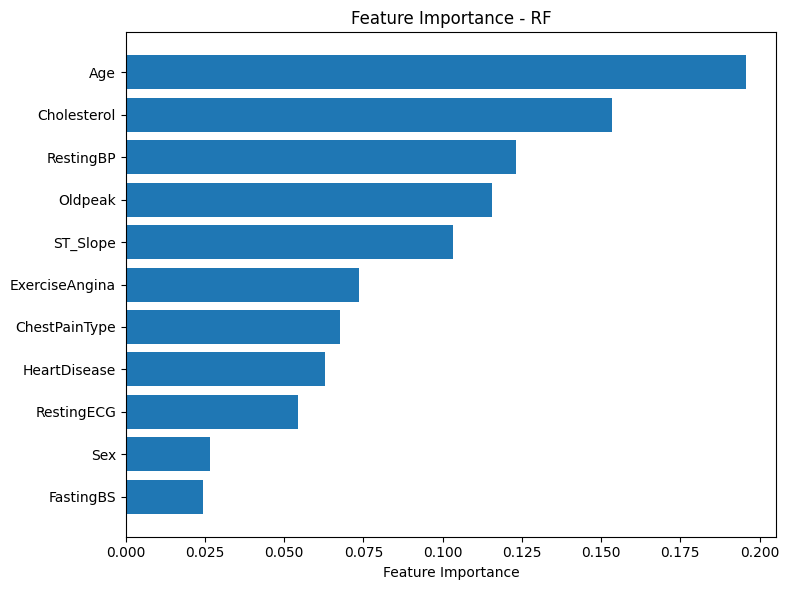


------------------------------------------------------------

XGBoost Classifier

Best cross validation score:  0.4705247376311844

Test set accuracy: 0.4960
Training set accuracy: 1.0000
Test set AUC: 0.6675
Training set AUC: 1.0000
Possible overfitting


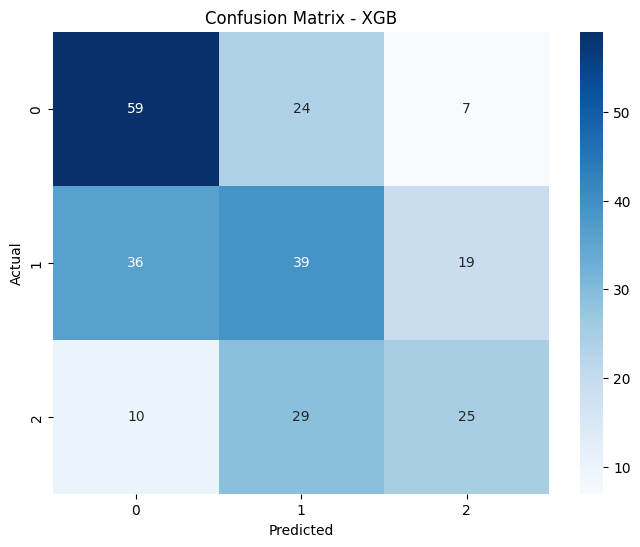

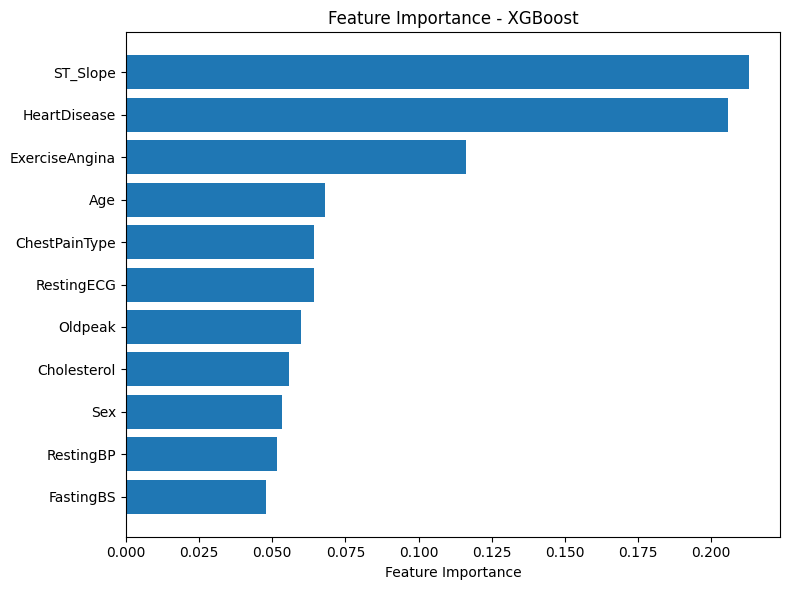


------------------------------------------------------------

Naive Bayes Classifier

Best cross validation scores:  0.5

Test set accuracy: 0.5766
Training set accuracy: 0.4983
Test set AUC: 0.7377
Training set AUC: 0.6943
No overfitting


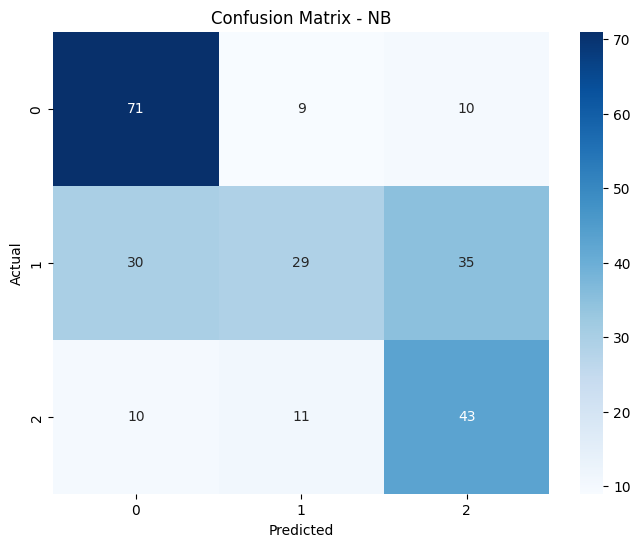


------------------------------------------------------------

K-Nearest Neighbors Classifier

Best parameters: {'n_neighbors': 10}
Best cross-validation score: 0.4308

Test set accuracy: 0.4355
Training set accuracy: 0.5398
Test set AUC: 0.5987
Training set AUC: 0.7238
Possible overfitting


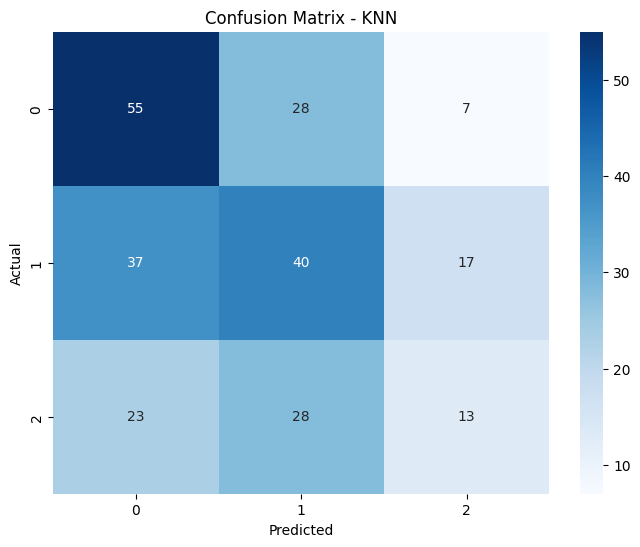


------------------------------------------------------------



In [ ]:
predict(fixed_hr_three_x_train_30, fixed_hr_three_x_test_30, fixed_hr_three_y_train_30, fixed_hr_three_y_test_30)

**test size = 25%**

Decision Tree Classifier

Best parameters: {'max_depth': 10, 'max_leaf_nodes': 50, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best cross-validation score: 0.4911

Test set accuracy: 0.5217
Training set accuracy: 0.6494
Test set AUC: 0.6785
Training set AUC: 0.8373
Possible overfitting


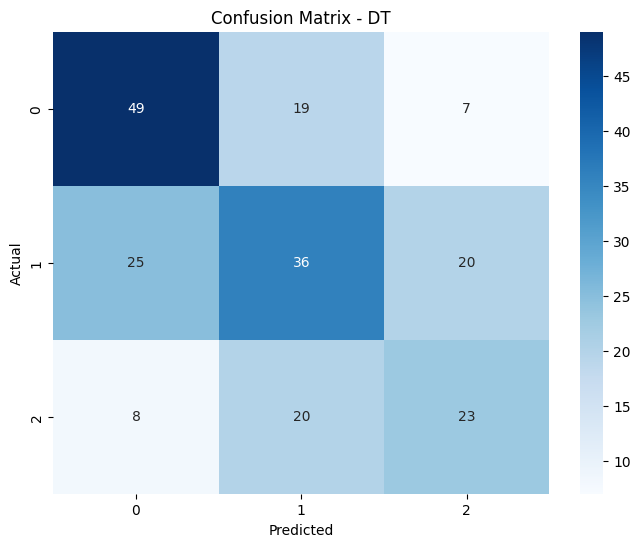

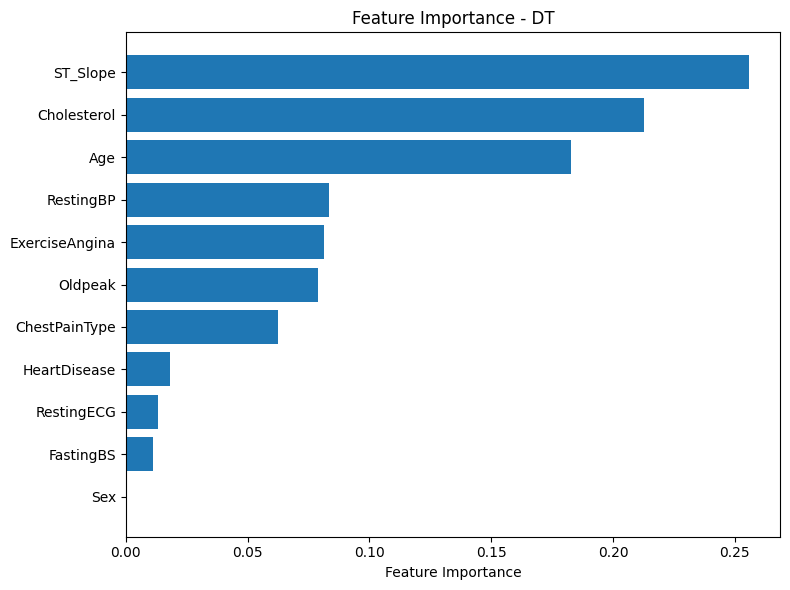


------------------------------------------------------------

Random Forest Classifier

Best parameters: {'max_depth': 10, 'n_estimators': 200}
Best cross-validation score: 0.5186

Test set accuracy: 0.5314
Training set accuracy: 0.9709
Test set AUC: 0.7280
Training set AUC: 0.9961
Possible overfitting


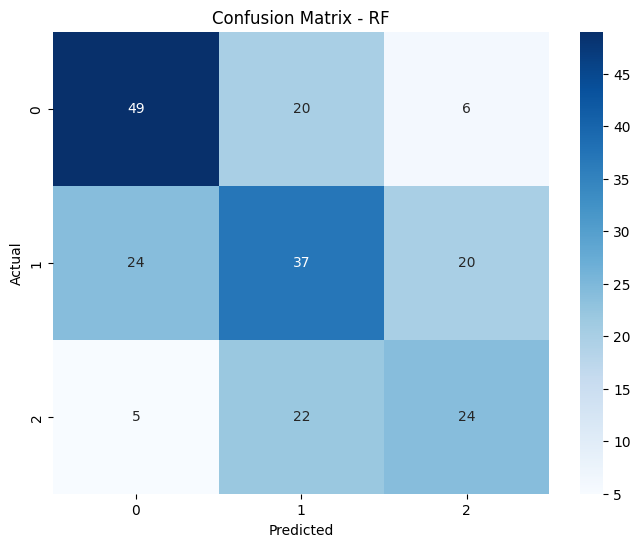

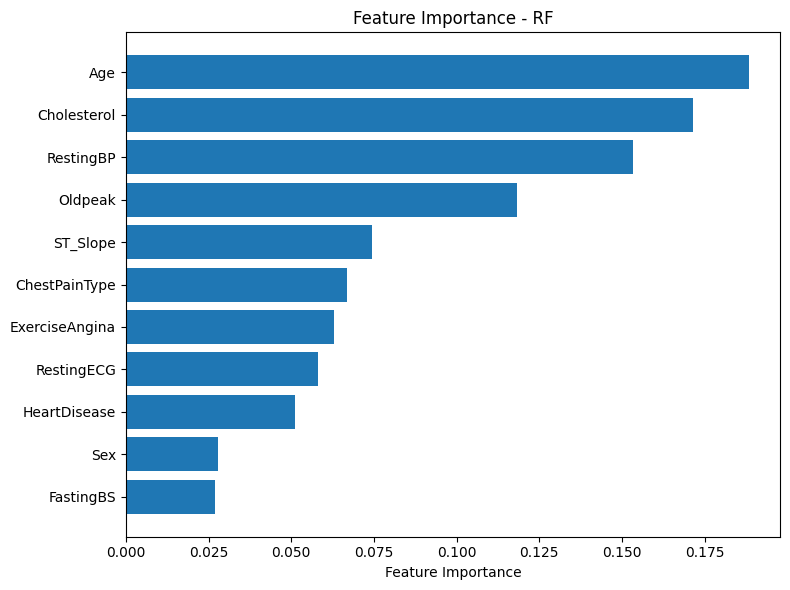


------------------------------------------------------------

XGBoost Classifier

Best cross validation score:  0.47988460529766586

Test set accuracy: 0.5072
Training set accuracy: 1.0000
Test set AUC: 0.6777
Training set AUC: 1.0000
Possible overfitting


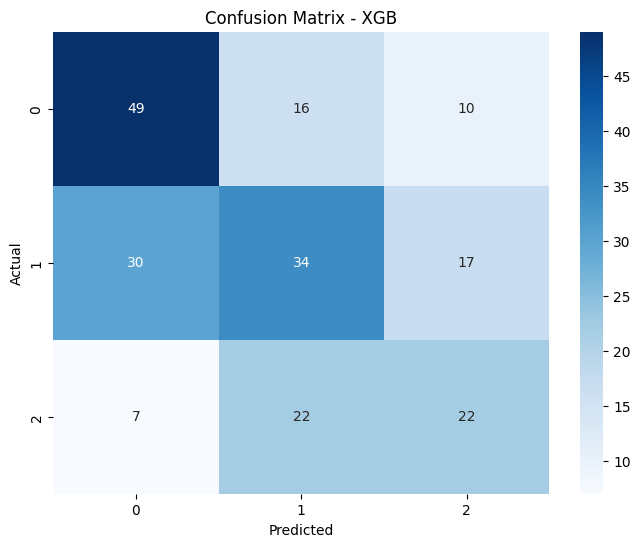

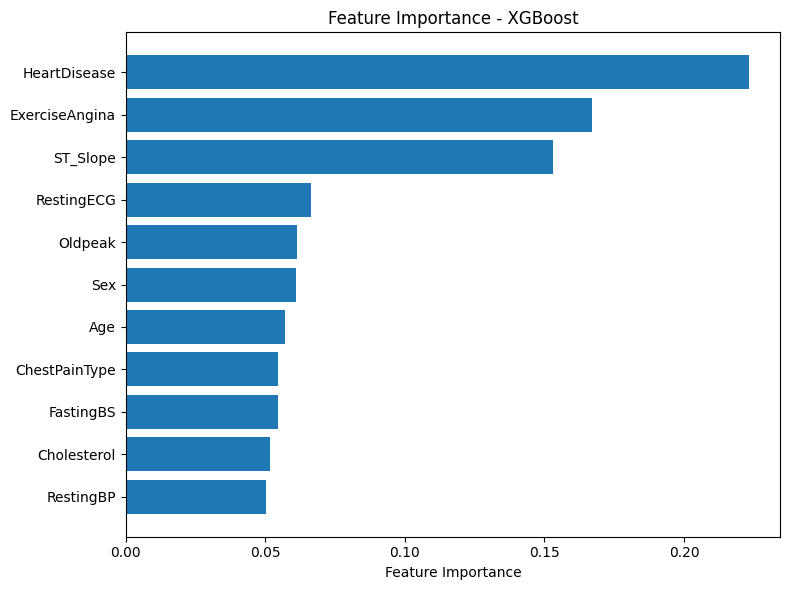


------------------------------------------------------------

Naive Bayes Classifier

Best cross validation scores:  0.5403225806451613

Test set accuracy: 0.5604
Training set accuracy: 0.5089
Test set AUC: 0.7359
Training set AUC: 0.6988
No overfitting


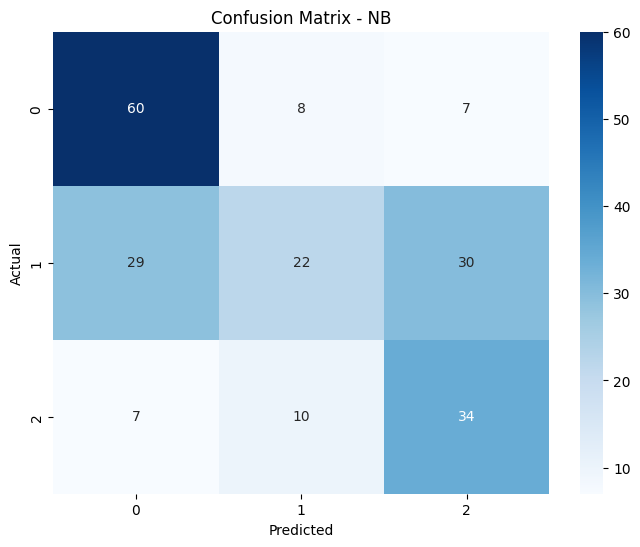


------------------------------------------------------------

K-Nearest Neighbors Classifier

Best parameters: {'n_neighbors': 10}
Best cross-validation score: 0.4410

Test set accuracy: 0.4348
Training set accuracy: 0.5331
Test set AUC: 0.6080
Training set AUC: 0.7212
Possible overfitting


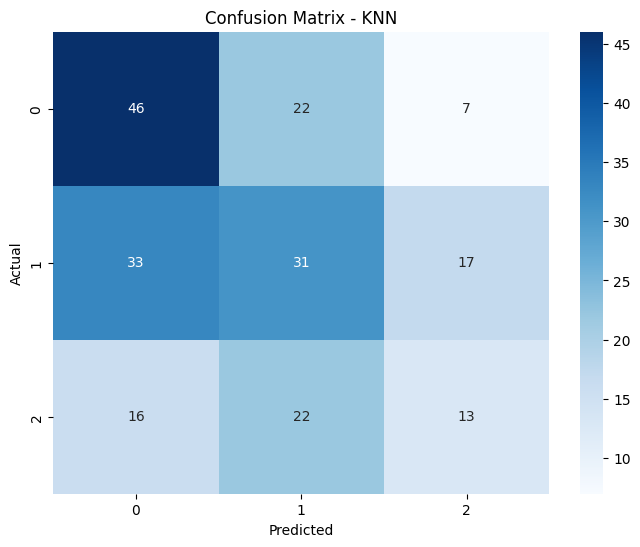


------------------------------------------------------------



In [ ]:
predict(fixed_hr_three_x_train_25, fixed_hr_three_x_test_25, fixed_hr_three_y_train_25, fixed_hr_three_y_test_25)

**test size = 20%**

Decision Tree Classifier

Best parameters: {'max_depth': 3, 'max_leaf_nodes': 20, 'min_samples_leaf': 100, 'min_samples_split': 2}
Best cross-validation score: 0.5091

Test set accuracy: 0.4578
Training set accuracy: 0.5227
Test set AUC: 0.6365
Training set AUC: 0.6901
Possible overfitting


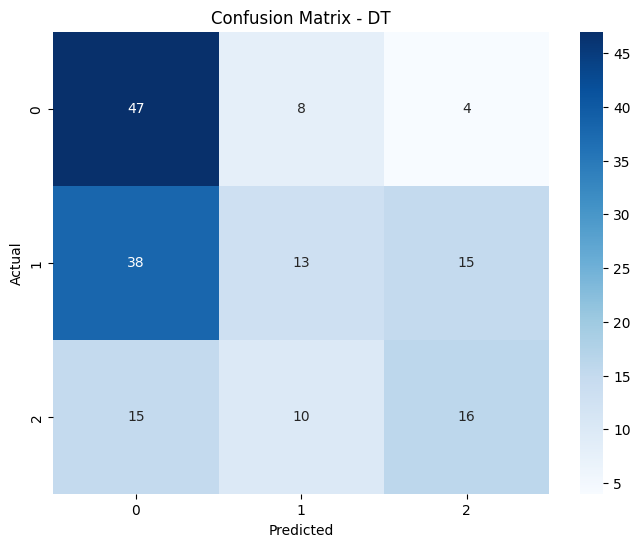

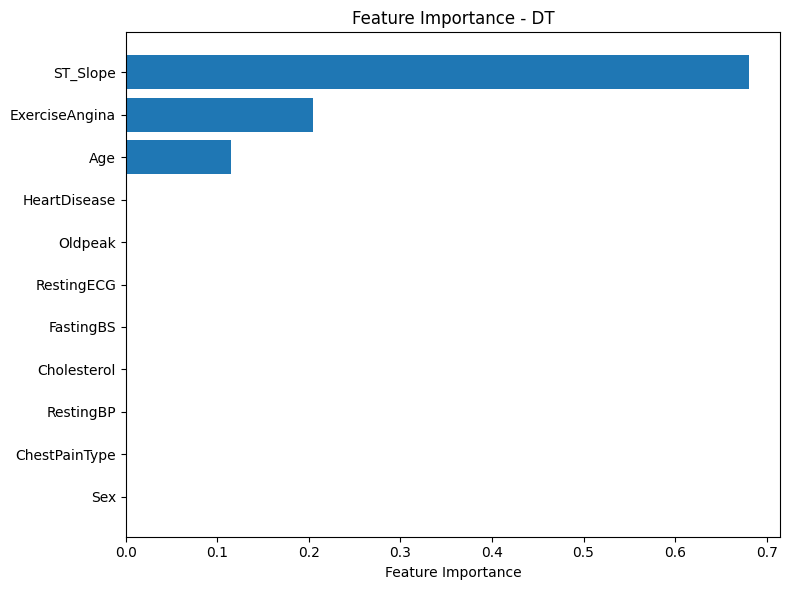


------------------------------------------------------------

Random Forest Classifier

Best parameters: {'max_depth': 3, 'n_estimators': 200}
Best cross-validation score: 0.5439

Test set accuracy: 0.5542
Training set accuracy: 0.5848
Test set AUC: 0.7098
Training set AUC: 0.7874
No overfitting


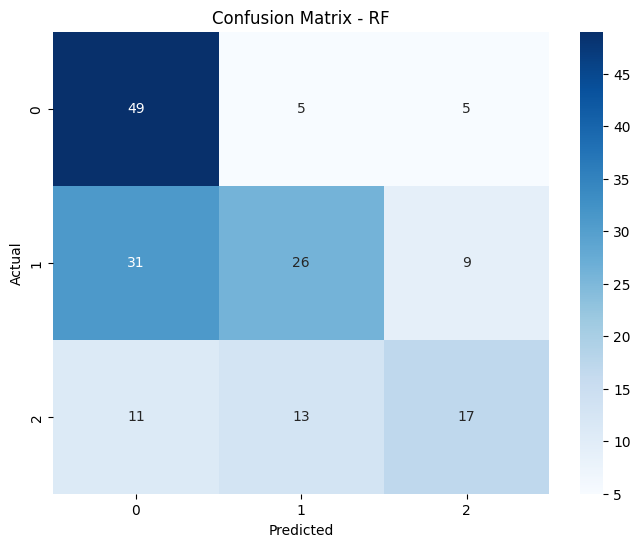

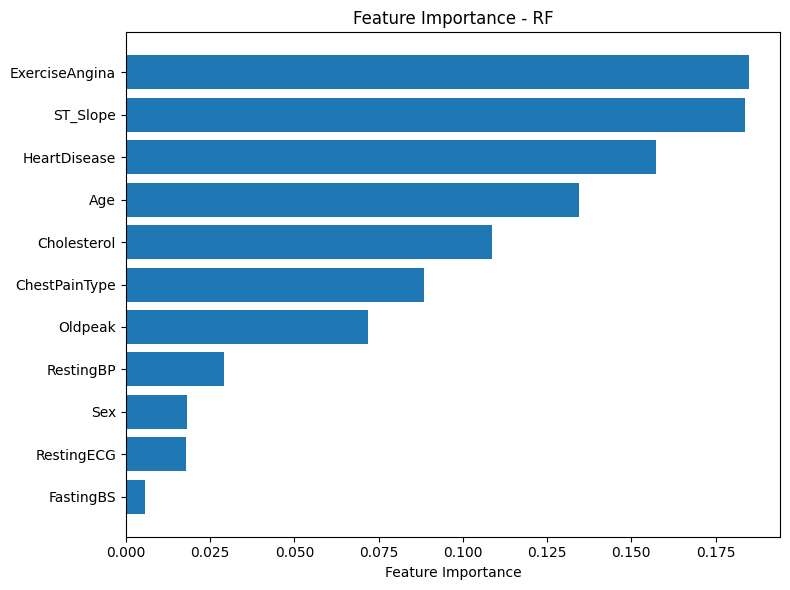


------------------------------------------------------------

XGBoost Classifier

Best cross validation score:  0.4666666666666667

Test set accuracy: 0.5181
Training set accuracy: 1.0000
Test set AUC: 0.7067
Training set AUC: 1.0000
Possible overfitting


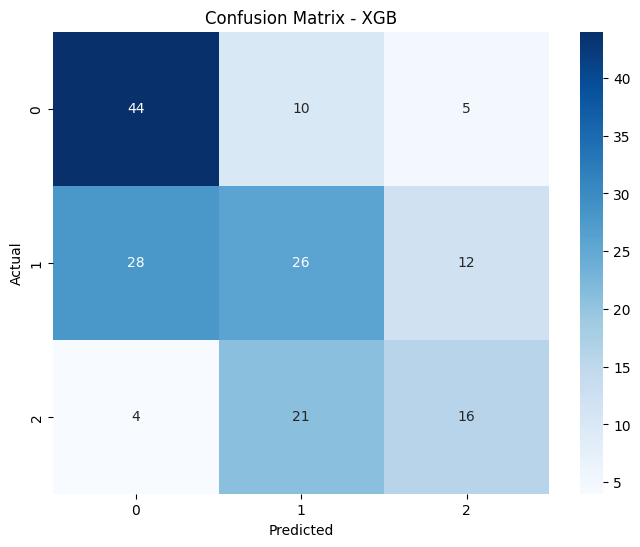

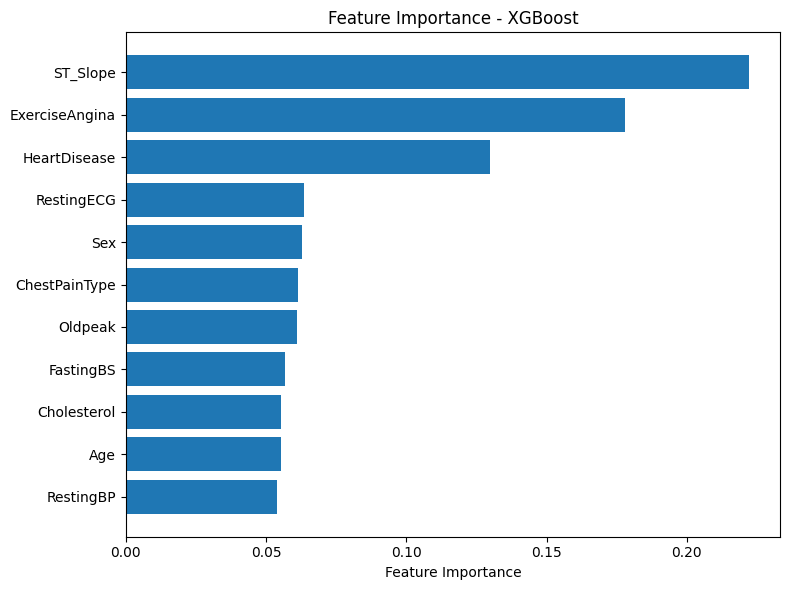


------------------------------------------------------------

Naive Bayes Classifier

Best cross validation scores:  0.5454545454545454

Test set accuracy: 0.5542
Training set accuracy: 0.5212
Test set AUC: 0.7237
Training set AUC: 0.7059
No overfitting


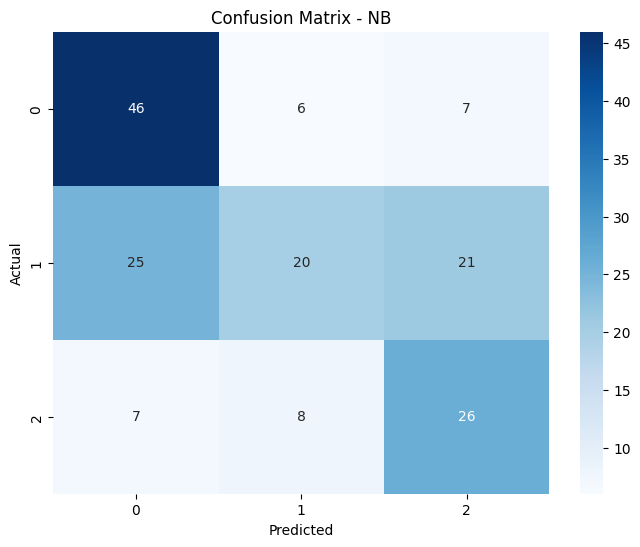


------------------------------------------------------------

K-Nearest Neighbors Classifier

Best parameters: {'n_neighbors': 10}
Best cross-validation score: 0.4258

Test set accuracy: 0.4217
Training set accuracy: 0.5379
Test set AUC: 0.5847
Training set AUC: 0.7285
Possible overfitting


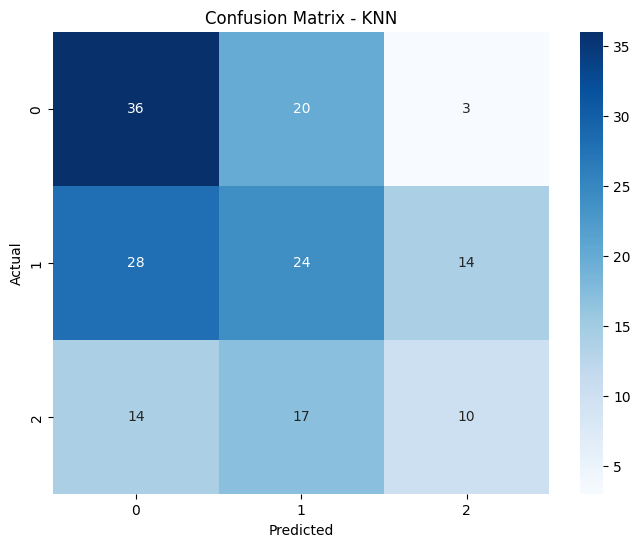


------------------------------------------------------------



In [ ]:
predict(fixed_hr_three_x_train_20, fixed_hr_three_x_test_20, fixed_hr_three_y_train_20, fixed_hr_three_y_test_20)

# Part 2: Classification and prediction for target class Heart Disease

**Dividing the datasets to train and test to predict the target class column**

In [ ]:
# first dataset

x = dataset.drop(['MaxHR', 'Discretized_MaxHR_three', 'HeartDisease'], axis=1)
y = dataset['HeartDisease']

x_train_30, x_test_30, y_train_30, y_test_30 = train_test_split(x, y, test_size=0.3, random_state=RANDOM_STATE)
x_train_20, x_test_20, y_train_20, y_test_20 = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE)
x_train_10, x_test_10, y_train_10, y_test_10 = train_test_split(x, y, test_size=0.1, random_state=RANDOM_STATE)

# second dataset

fixed_x = fixed_dataset.drop(['MaxHR', 'Discretized_MaxHR_three', 'HeartDisease'], axis=1)
fixed_y = fixed_dataset['HeartDisease']

fixed_x_train_30, fixed_x_test_30, fixed_y_train_30, fixed_y_test_30 = train_test_split(fixed_x, fixed_y, test_size=0.3, random_state=RANDOM_STATE)
fixed_x_train_20, fixed_x_test_20, fixed_y_train_20, fixed_y_test_20 = train_test_split(fixed_x, fixed_y, test_size=0.2, random_state=RANDOM_STATE)
fixed_x_train_10, fixed_x_test_10, fixed_y_train_10, fixed_y_test_10 = train_test_split(fixed_x, fixed_y, test_size=0.1, random_state=RANDOM_STATE)

# Research

**Running the test - first dataset, test size = 30%**

Decision Tree Classifier

Best parameters: {'max_depth': 7, 'max_leaf_nodes': 20, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best cross-validation score: 0.8396

Test set accuracy: 0.8116
Training set accuracy: 0.8941
Test set AUC: 0.8601
Training set AUC: 0.9394
Possible overfitting


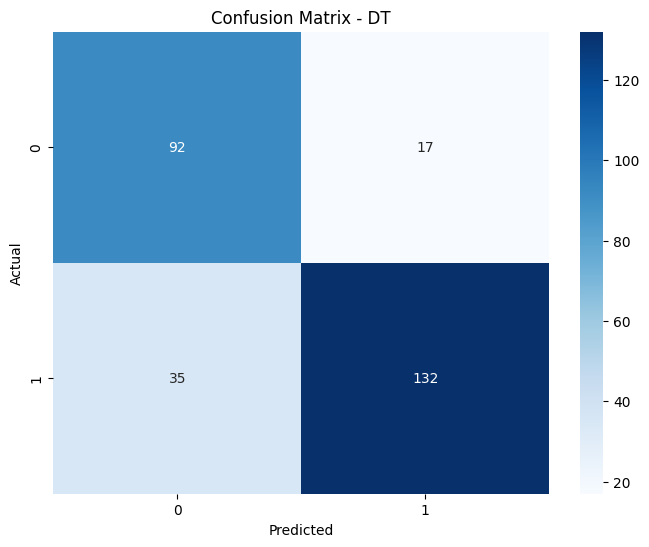

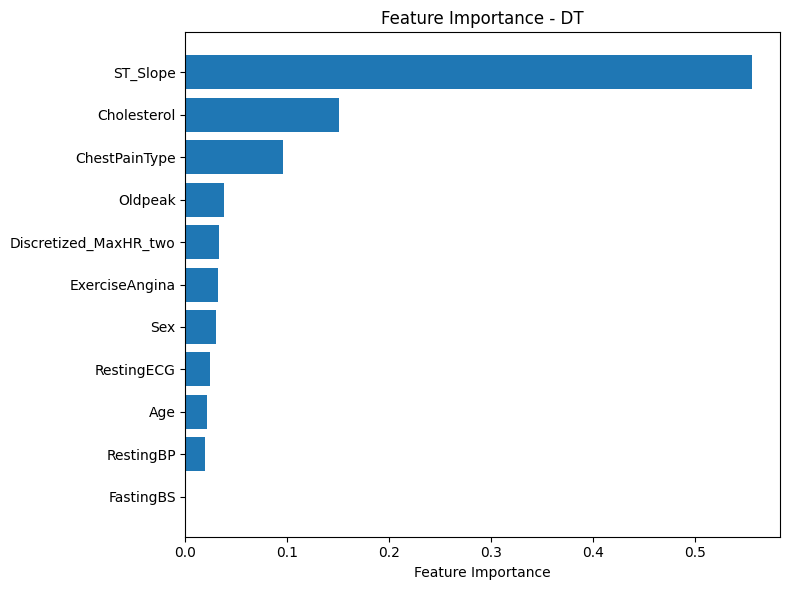


------------------------------------------------------------

Random Forest Classifier

Best parameters: {'max_depth': 5, 'n_estimators': 200}
Best cross-validation score: 0.8692

Test set accuracy: 0.8913
Training set accuracy: 0.9112
Test set AUC: 0.9379
Training set AUC: 0.9716
No overfitting


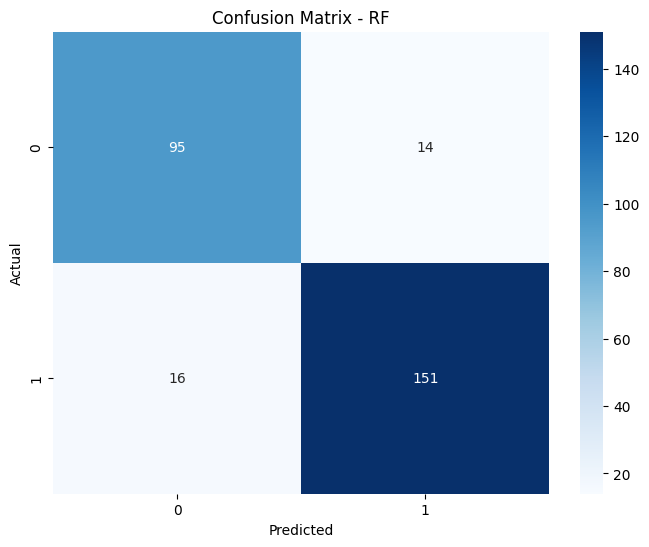

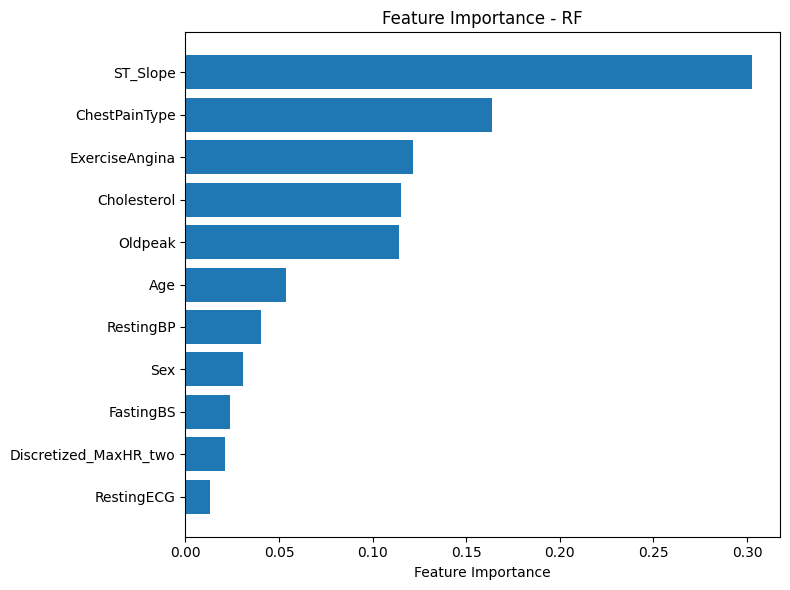


------------------------------------------------------------

XGBoost Classifier

Best cross validation score:  0.8380329457364339

Test set accuracy: 0.8514
Training set accuracy: 1.0000
Test set AUC: 0.9243
Training set AUC: 1.0000
Possible overfitting


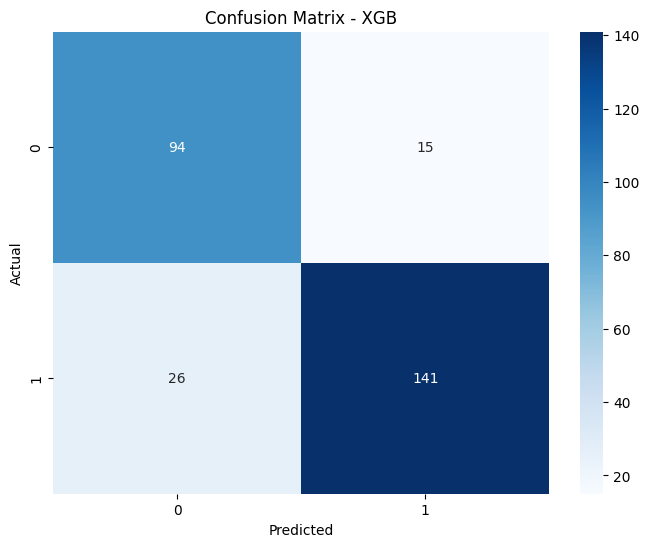

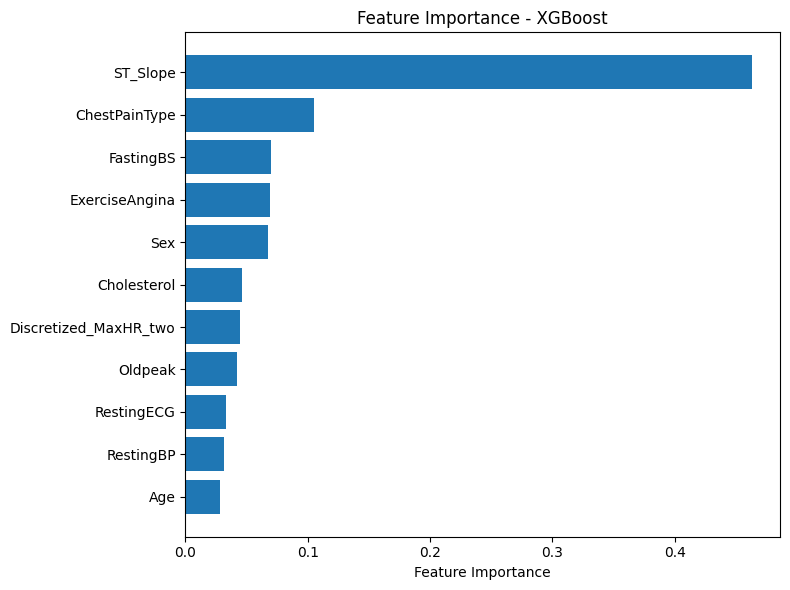


------------------------------------------------------------

Naive Bayes Classifier

Best cross validation scores:  0.8671875

Test set accuracy: 0.8551
Training set accuracy: 0.8551
Test set AUC: 0.9073
Training set AUC: 0.9171
No overfitting


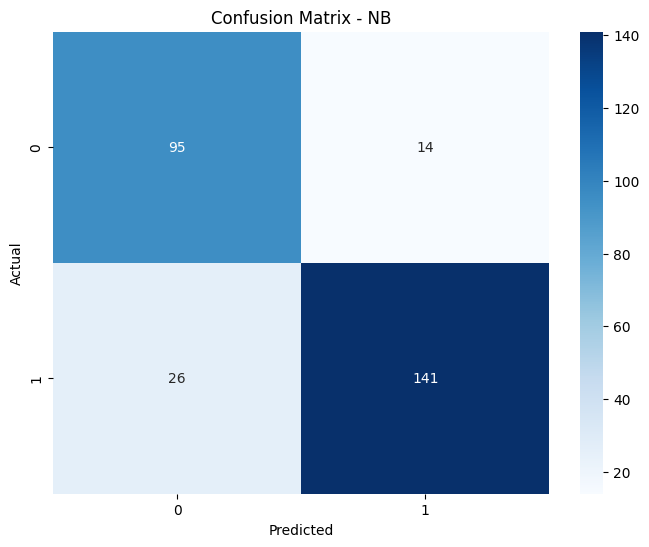


------------------------------------------------------------

K-Nearest Neighbors Classifier

Best parameters: {'n_neighbors': 3}
Best cross-validation score: 0.6574

Test set accuracy: 0.6304
Training set accuracy: 0.8474
Test set AUC: 0.6610
Training set AUC: 0.9138
Possible overfitting


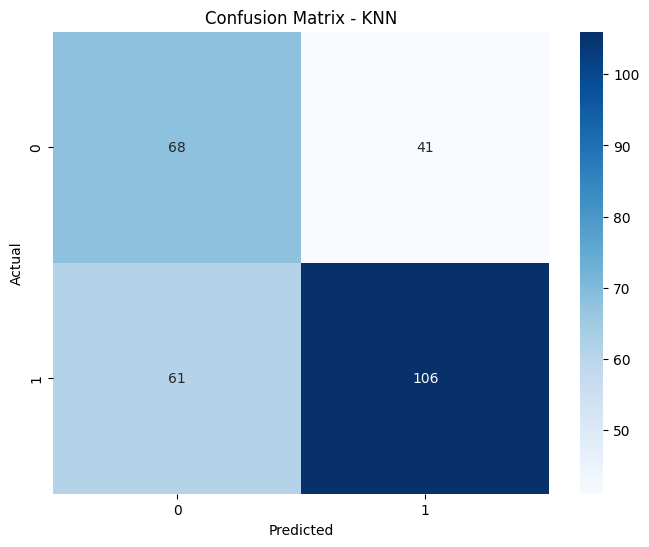


------------------------------------------------------------



In [ ]:
predict(x_train_30, x_test_30, y_train_30, y_test_30)

**Running the tests - first dataset, test size = 20%**

Decision Tree Classifier

Best parameters: {'max_depth': 5, 'max_leaf_nodes': 50, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best cross-validation score: 0.8556

Test set accuracy: 0.8696
Training set accuracy: 0.8869
Test set AUC: 0.9238
Training set AUC: 0.9482
No overfitting


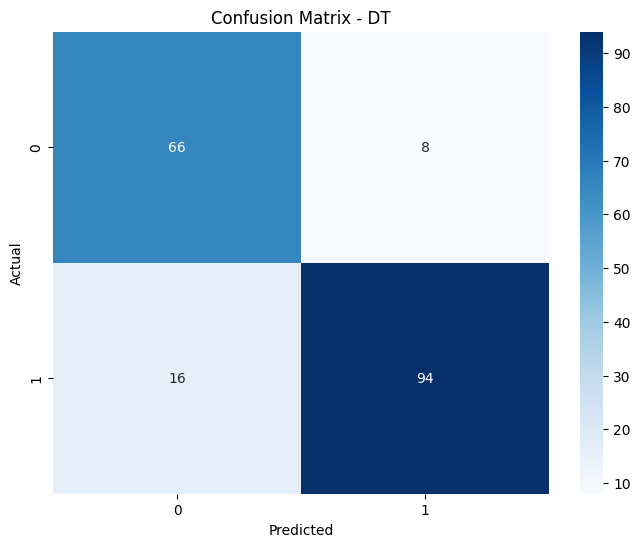

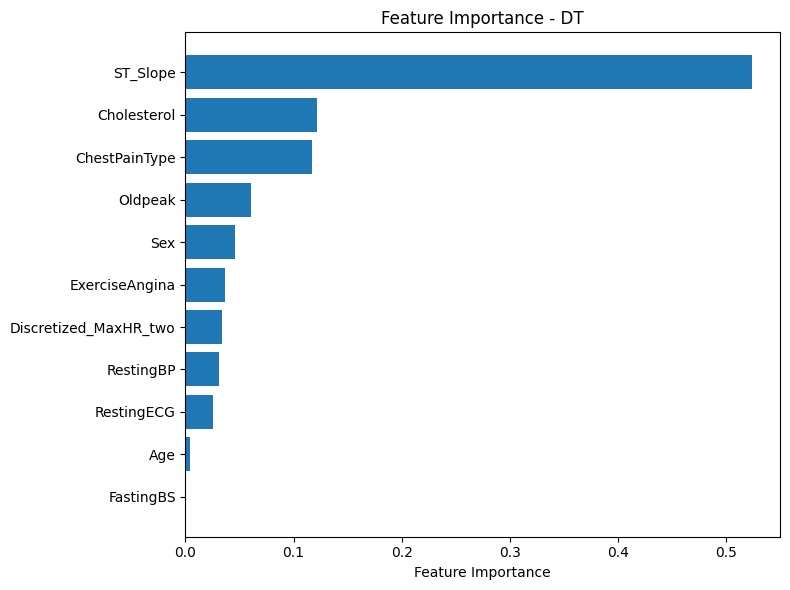


------------------------------------------------------------

Random Forest Classifier

Best parameters: {'max_depth': 10, 'n_estimators': 200}
Best cross-validation score: 0.8733

Test set accuracy: 0.8750
Training set accuracy: 0.9850
Test set AUC: 0.9408
Training set AUC: 0.9996
Possible overfitting


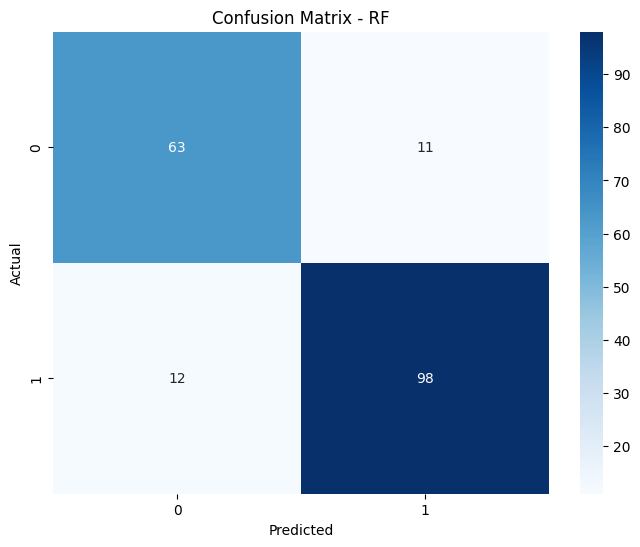

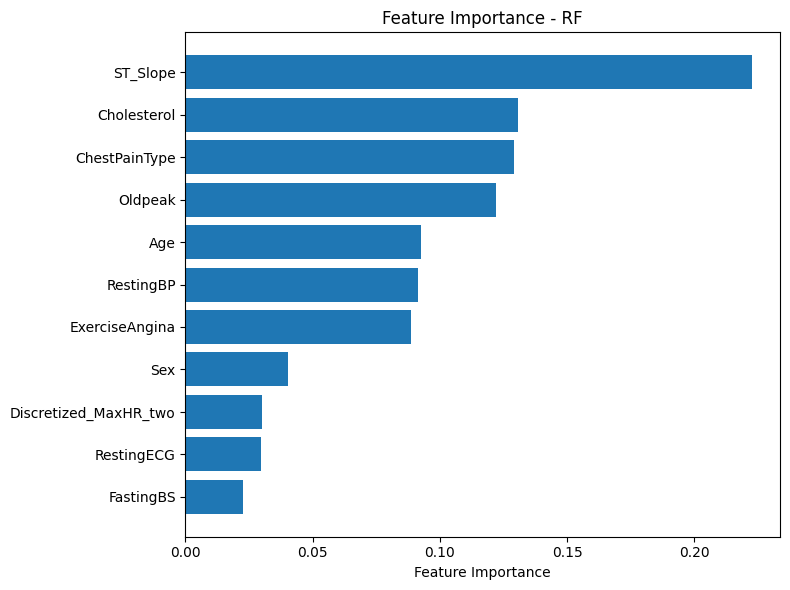


------------------------------------------------------------

XGBoost Classifier

Best cross validation score:  0.8501351225421676

Test set accuracy: 0.8804
Training set accuracy: 1.0000
Test set AUC: 0.9459
Training set AUC: 1.0000
Possible overfitting


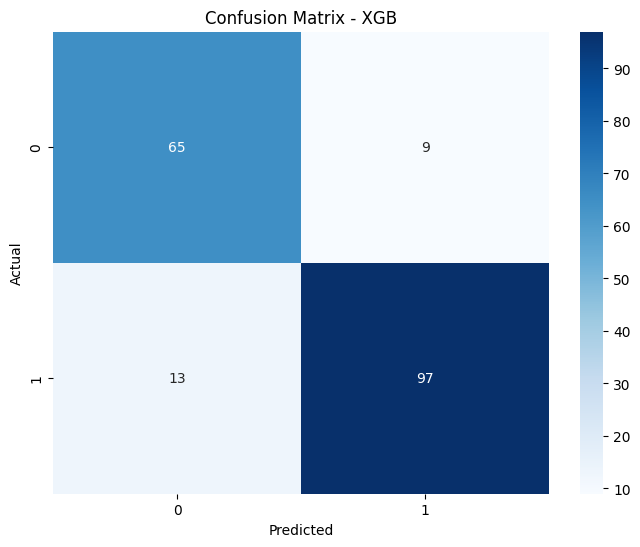

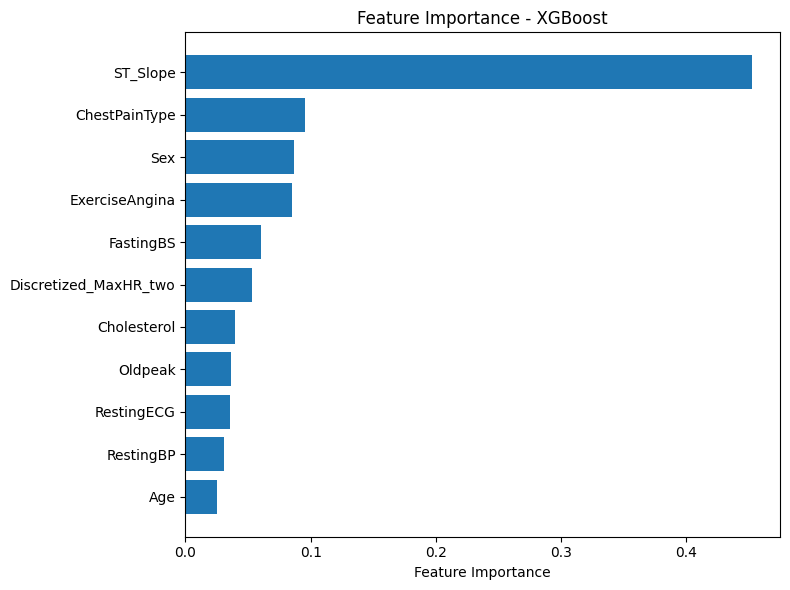


------------------------------------------------------------

Naive Bayes Classifier

Best cross validation scores:  0.8503401360544217

Test set accuracy: 0.8967
Training set accuracy: 0.8447
Test set AUC: 0.9247
Training set AUC: 0.9101
No overfitting


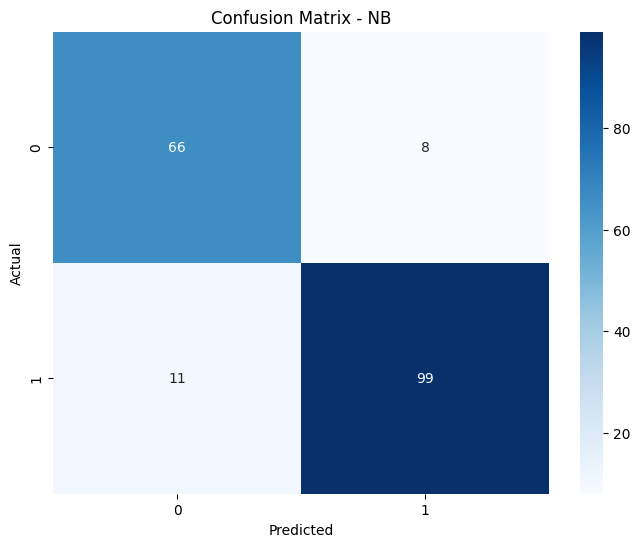


------------------------------------------------------------

K-Nearest Neighbors Classifier

Best parameters: {'n_neighbors': 3}
Best cross-validation score: 0.6580

Test set accuracy: 0.6630
Training set accuracy: 0.8311
Test set AUC: 0.6966
Training set AUC: 0.9031
Possible overfitting


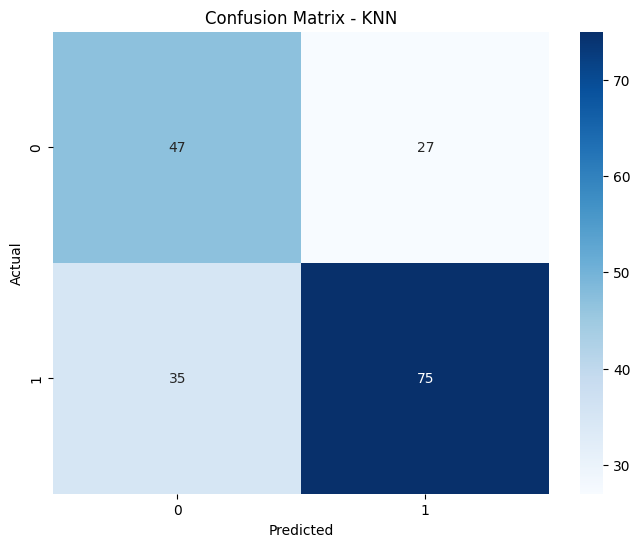


------------------------------------------------------------



In [ ]:
predict(x_train_20, x_test_20, y_train_20, y_test_20)

**Running the tests - first dataset, test size = 10%**

Decision Tree Classifier

Best parameters: {'max_depth': 5, 'max_leaf_nodes': 20, 'min_samples_leaf': 20, 'min_samples_split': 50}
Best cross-validation score: 0.8342

Test set accuracy: 0.8804
Training set accuracy: 0.8668
Test set AUC: 0.9378
Training set AUC: 0.9334
No overfitting


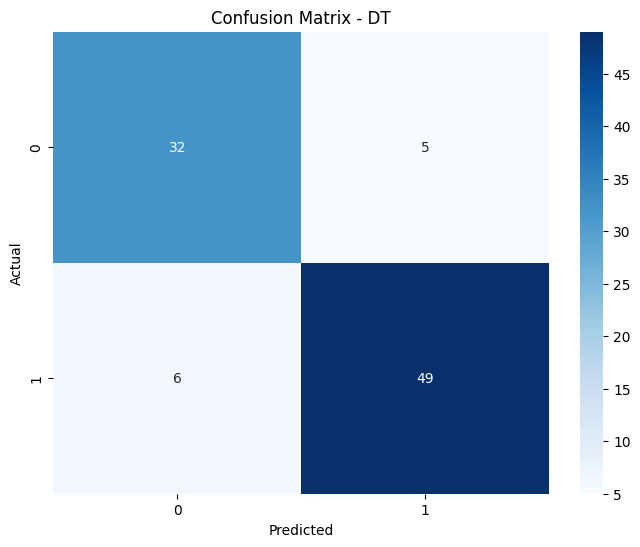

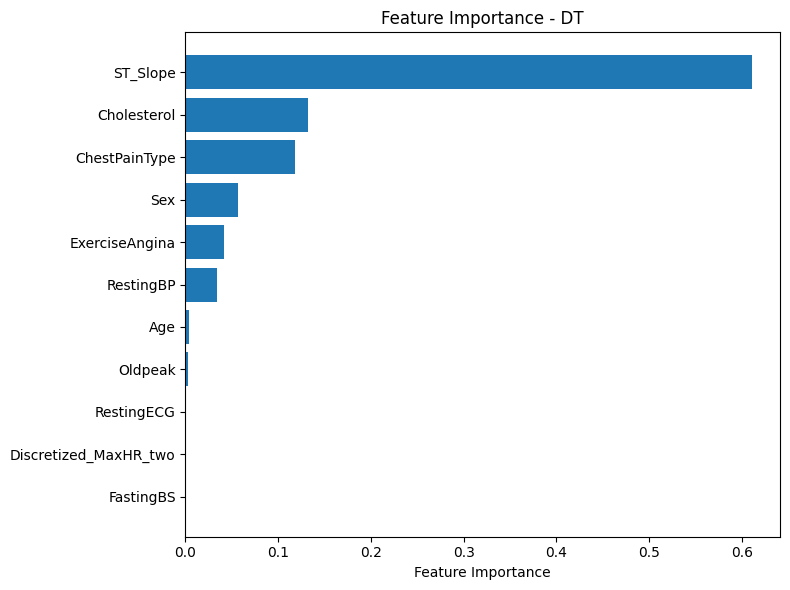


------------------------------------------------------------

Random Forest Classifier

Best parameters: {'max_depth': 7, 'n_estimators': 100}
Best cross-validation score: 0.8656

Test set accuracy: 0.9457
Training set accuracy: 0.9455
Test set AUC: 0.9592
Training set AUC: 0.9883
No overfitting


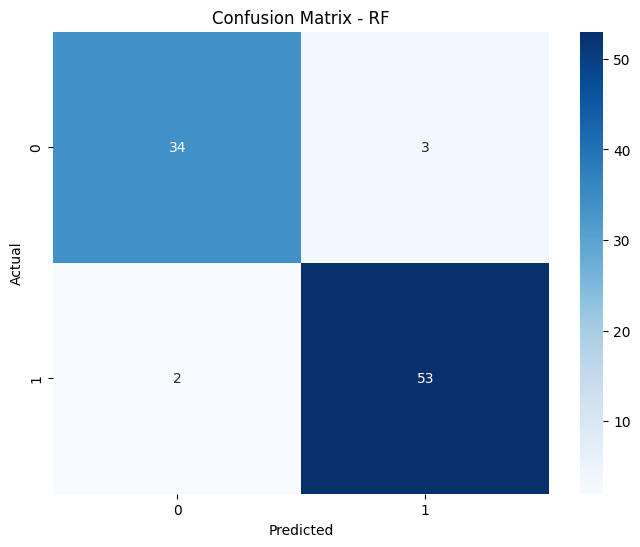

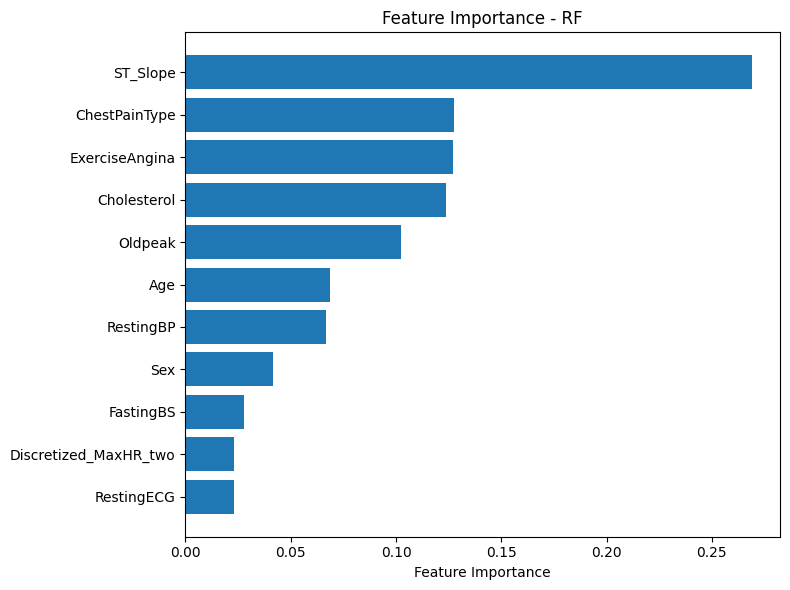


------------------------------------------------------------

XGBoost Classifier

Best cross validation score:  0.8341657539247901

Test set accuracy: 0.9239
Training set accuracy: 1.0000
Test set AUC: 0.9553
Training set AUC: 1.0000
Possible overfitting


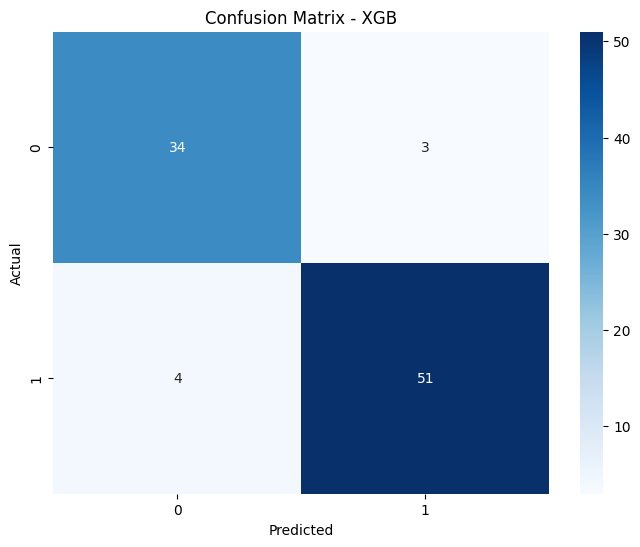

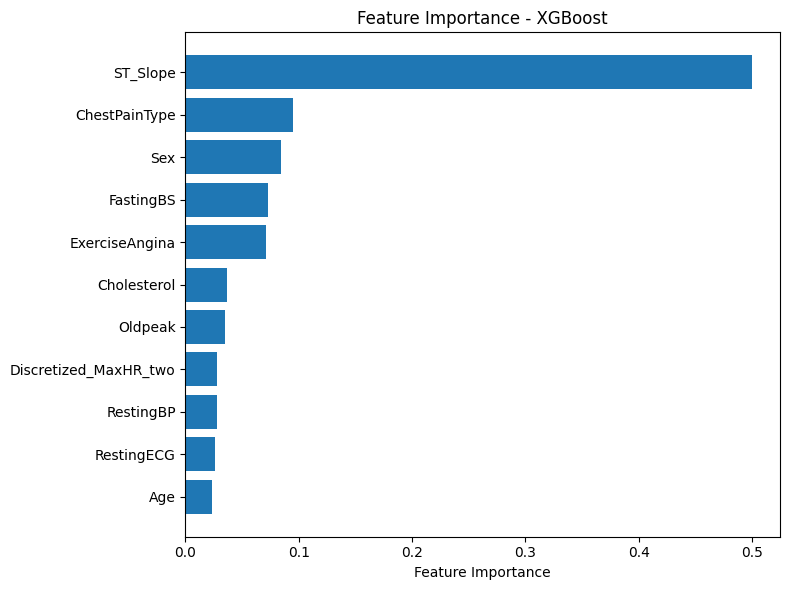


------------------------------------------------------------

Naive Bayes Classifier

Best cross validation scores:  0.8484848484848485

Test set accuracy: 0.9130
Training set accuracy: 0.8511
Test set AUC: 0.9459
Training set AUC: 0.9107
No overfitting


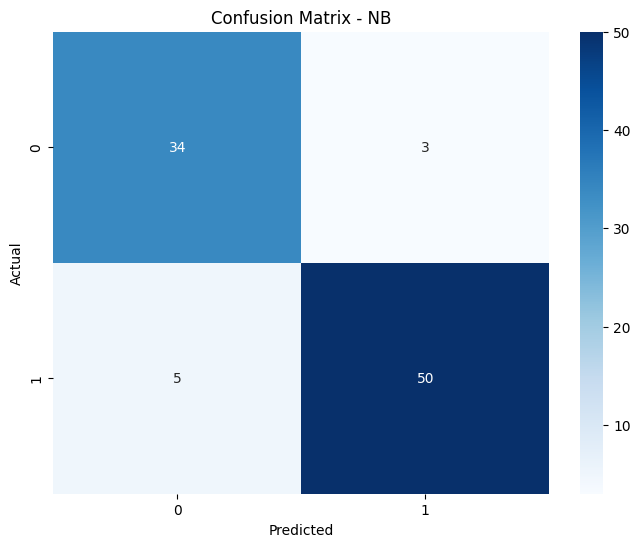


------------------------------------------------------------

K-Nearest Neighbors Classifier

Best parameters: {'n_neighbors': 7}
Best cross-validation score: 0.6538

Test set accuracy: 0.6630
Training set accuracy: 0.7591
Test set AUC: 0.6575
Training set AUC: 0.8428
Possible overfitting


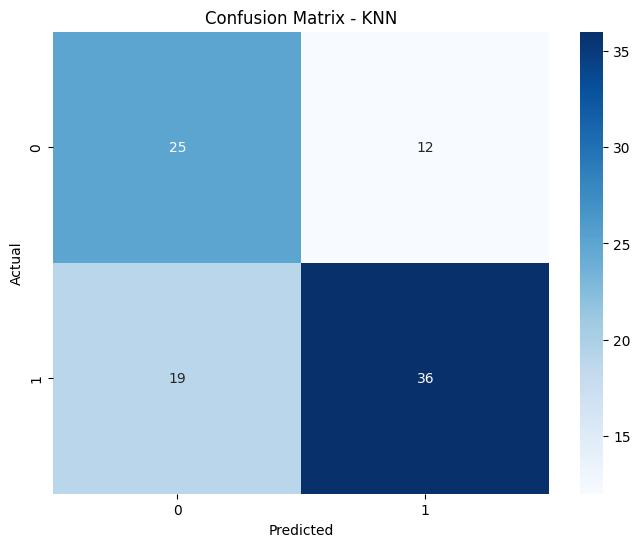


------------------------------------------------------------



In [ ]:
predict(x_train_10, x_test_10, y_train_10, y_test_10)

**Running the tests - second dataset, test size = 30%**

Decision Tree Classifier

Best parameters: {'max_depth': 5, 'max_leaf_nodes': 20, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best cross-validation score: 0.8599

Test set accuracy: 0.8145
Training set accuracy: 0.9014
Test set AUC: 0.8712
Training set AUC: 0.9477
Possible overfitting


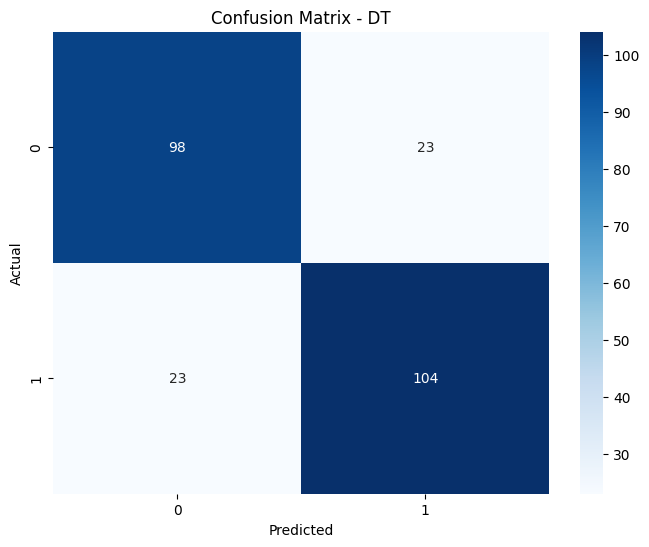

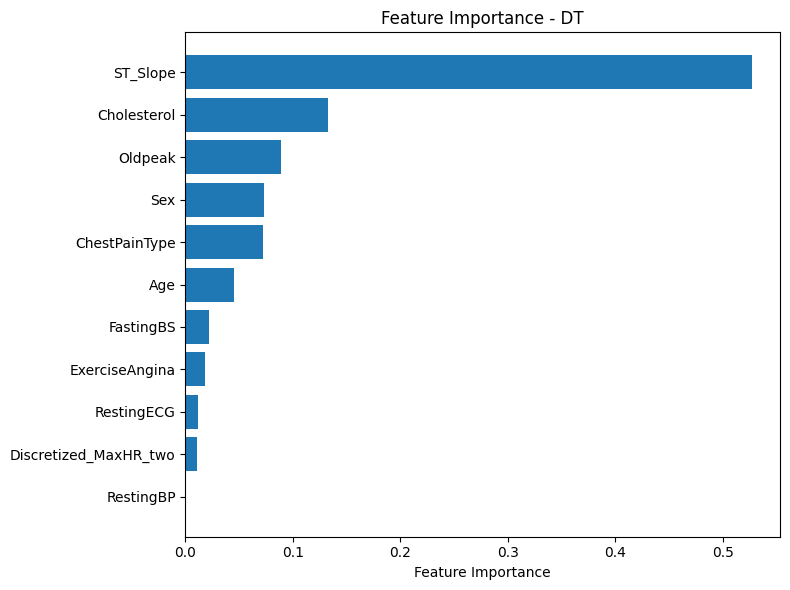


------------------------------------------------------------

Random Forest Classifier

Best parameters: {'max_depth': 7, 'n_estimators': 50}
Best cross-validation score: 0.8824

Test set accuracy: 0.8508
Training set accuracy: 0.9567
Test set AUC: 0.9066
Training set AUC: 0.9923
Possible overfitting


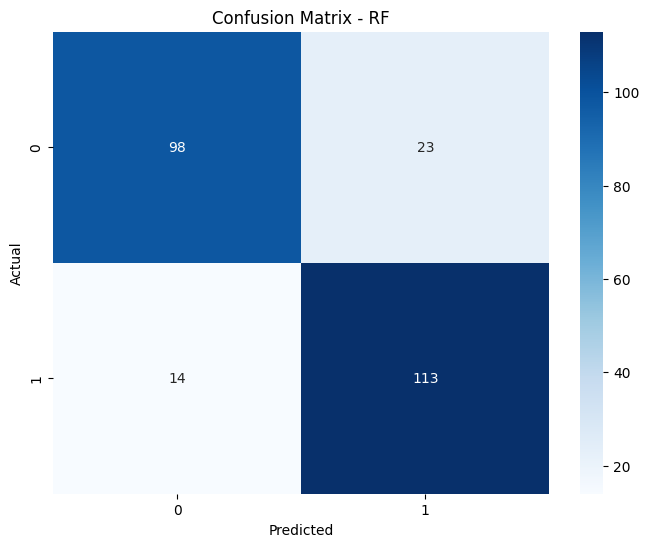

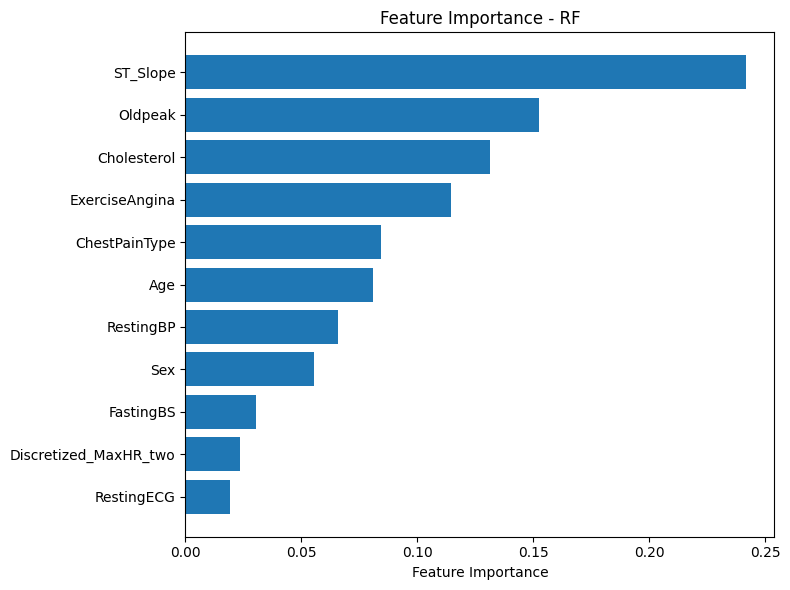


------------------------------------------------------------

XGBoost Classifier

Best cross validation score:  0.8564917541229387

Test set accuracy: 0.8387
Training set accuracy: 1.0000
Test set AUC: 0.9135
Training set AUC: 1.0000
Possible overfitting


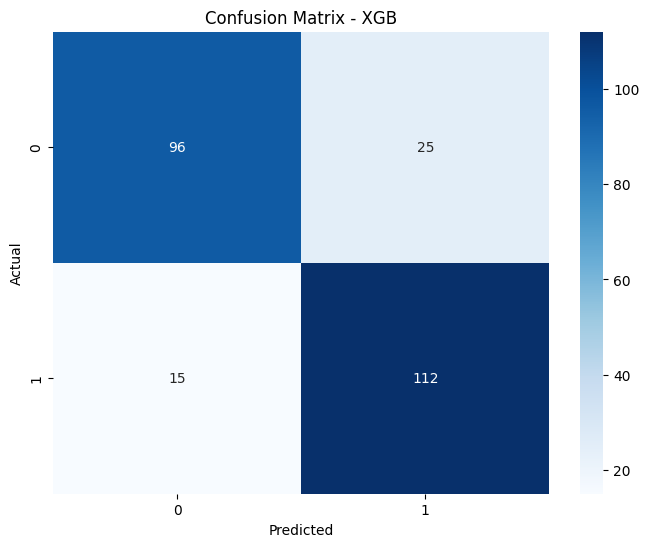

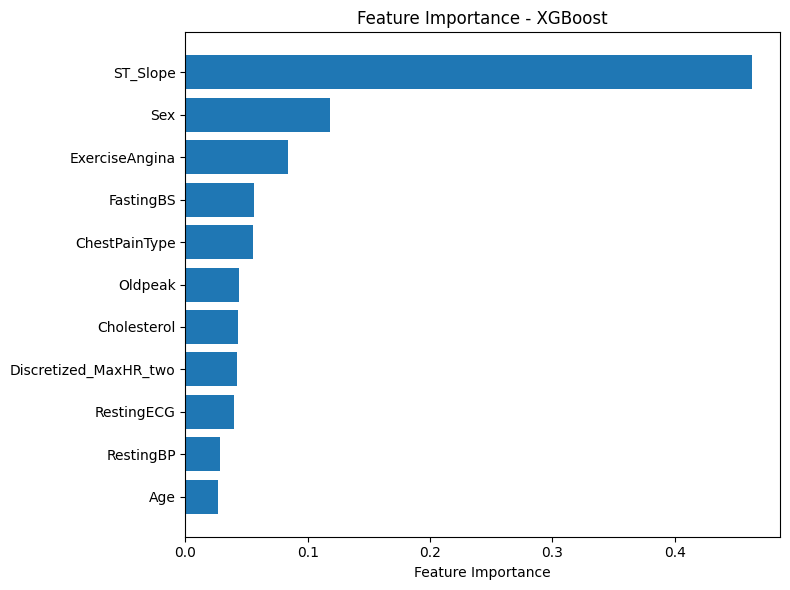


------------------------------------------------------------

Naive Bayes Classifier

Best cross validation scores:  0.8879310344827587

Test set accuracy: 0.8105
Training set accuracy: 0.8685
Test set AUC: 0.8817
Training set AUC: 0.9287
Possible overfitting


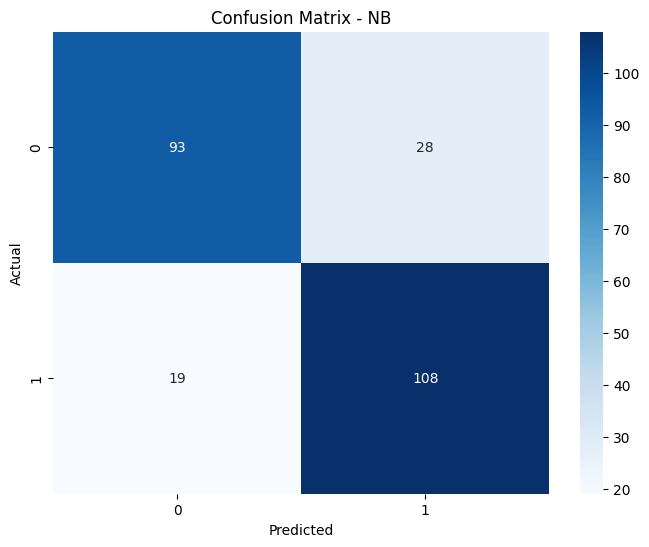


------------------------------------------------------------

K-Nearest Neighbors Classifier

Best parameters: {'n_neighbors': 10}
Best cross-validation score: 0.6747

Test set accuracy: 0.6290
Training set accuracy: 0.7336
Test set AUC: 0.7047
Training set AUC: 0.8255
Possible overfitting


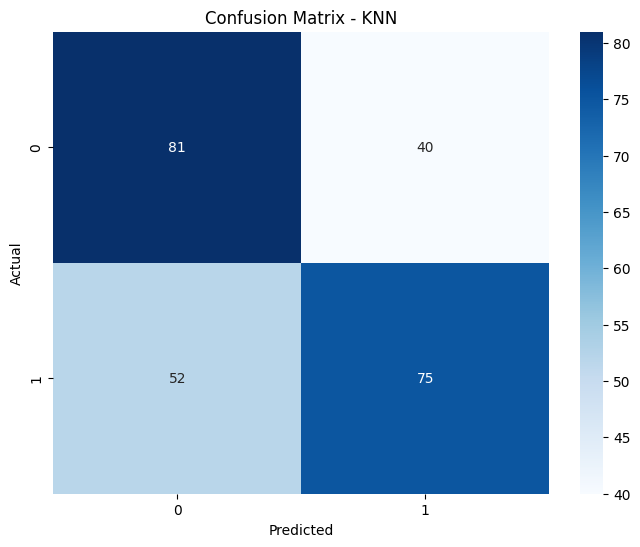


------------------------------------------------------------



In [ ]:
predict(fixed_x_train_30, fixed_x_test_30, fixed_y_train_30, fixed_y_test_30)

**Running the tests - second dataset, test size = 20%**

Decision Tree Classifier

Best parameters: {'max_depth': 7, 'max_leaf_nodes': 20, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best cross-validation score: 0.8485

Test set accuracy: 0.8373
Training set accuracy: 0.8758
Test set AUC: 0.9041
Training set AUC: 0.9452
No overfitting


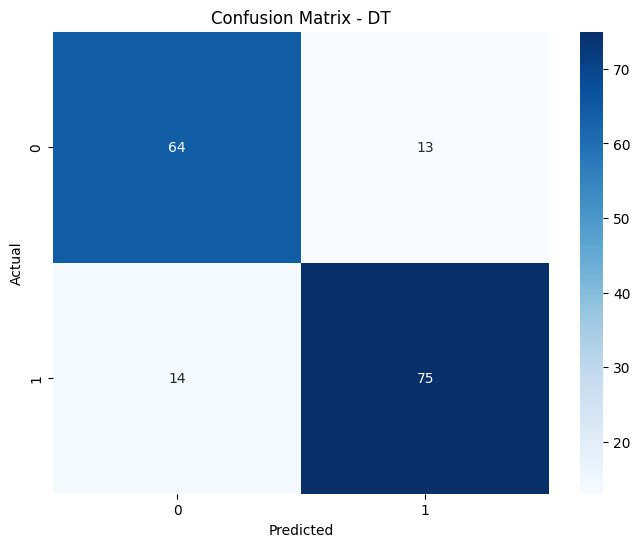

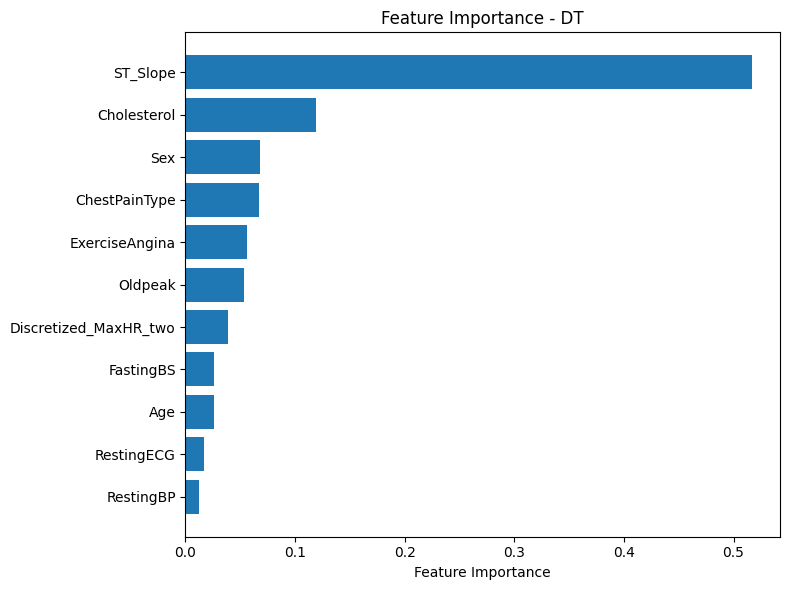


------------------------------------------------------------

Random Forest Classifier

Best parameters: {'max_depth': 3, 'n_estimators': 50}
Best cross-validation score: 0.8652

Test set accuracy: 0.8735
Training set accuracy: 0.8818
Test set AUC: 0.9378
Training set AUC: 0.9376
No overfitting


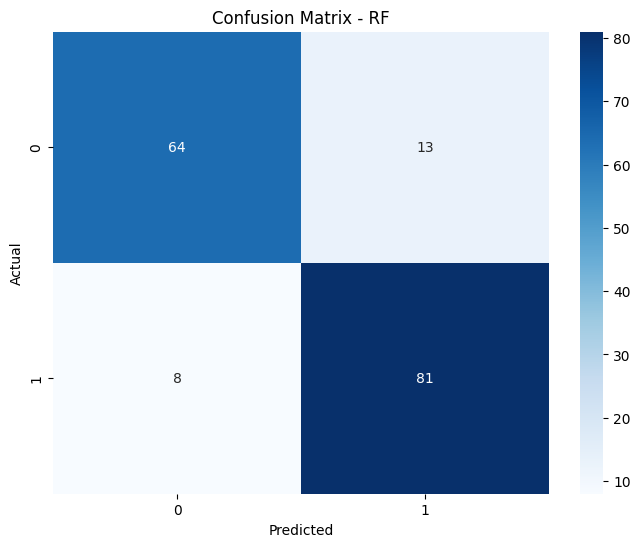

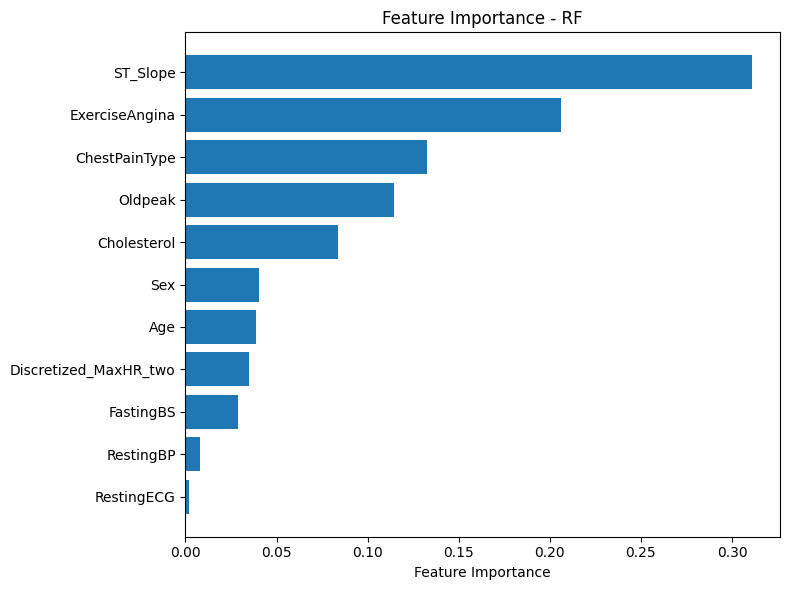


------------------------------------------------------------

XGBoost Classifier

Best cross validation score:  0.8575757575757577

Test set accuracy: 0.8675
Training set accuracy: 1.0000
Test set AUC: 0.9319
Training set AUC: 1.0000
Possible overfitting


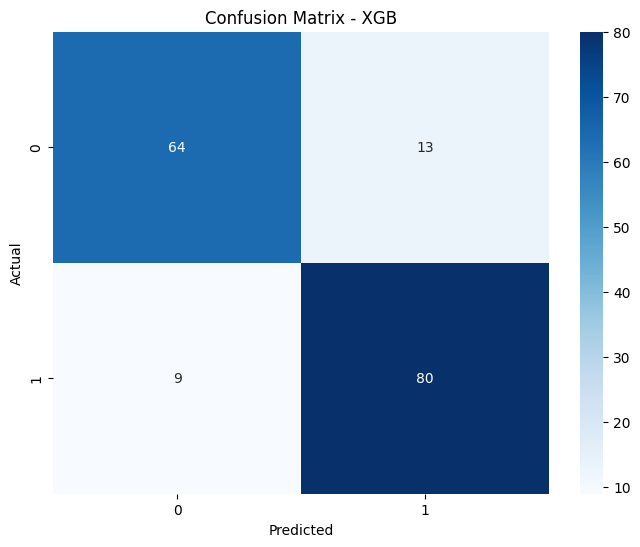

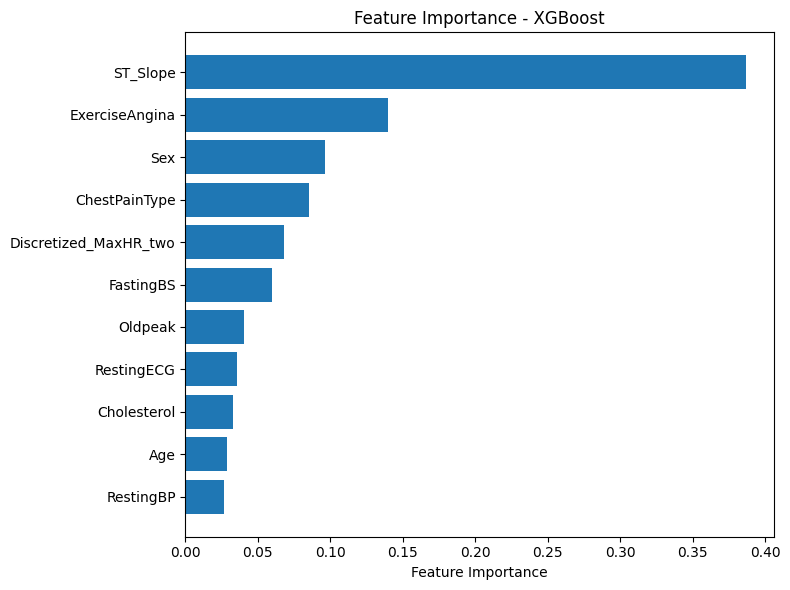


------------------------------------------------------------

Naive Bayes Classifier

Best cross validation scores:  0.8787878787878788

Test set accuracy: 0.8193
Training set accuracy: 0.8621
Test set AUC: 0.8927
Training set AUC: 0.9199
No overfitting


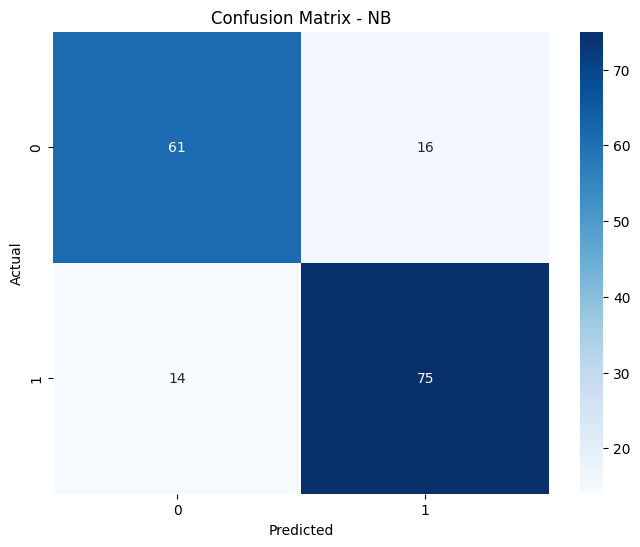


------------------------------------------------------------

K-Nearest Neighbors Classifier

Best parameters: {'n_neighbors': 3}
Best cross-validation score: 0.6667

Test set accuracy: 0.6084
Training set accuracy: 0.8348
Test set AUC: 0.6794
Training set AUC: 0.9086
Possible overfitting


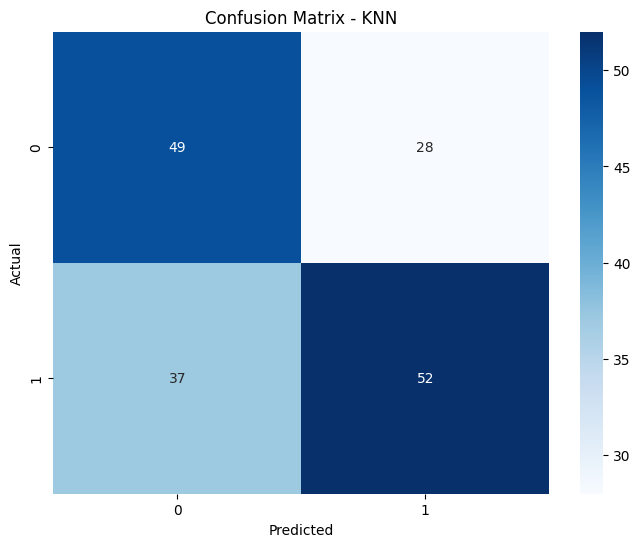


------------------------------------------------------------



In [ ]:
predict(fixed_x_train_20, fixed_x_test_20, fixed_y_train_20, fixed_y_test_20)

**Running the tests - second dataset, test size = 10%**

Decision Tree Classifier

Best parameters: {'max_depth': 7, 'max_leaf_nodes': 20, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best cross-validation score: 0.8399

Test set accuracy: 0.8554
Training set accuracy: 0.8991
Test set AUC: 0.9220
Training set AUC: 0.9374
No overfitting


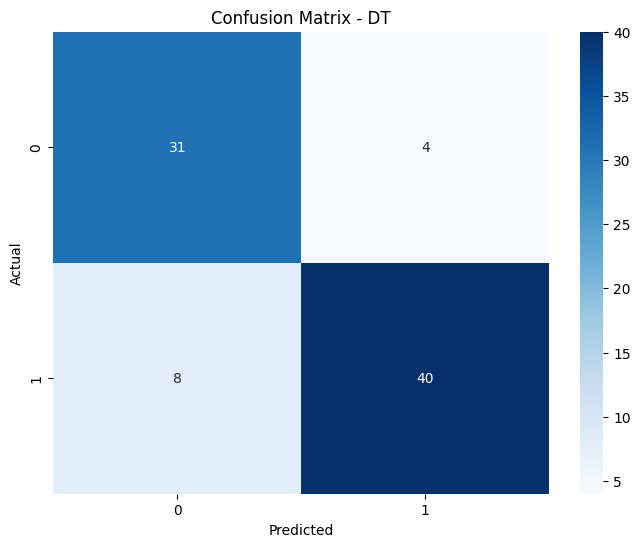

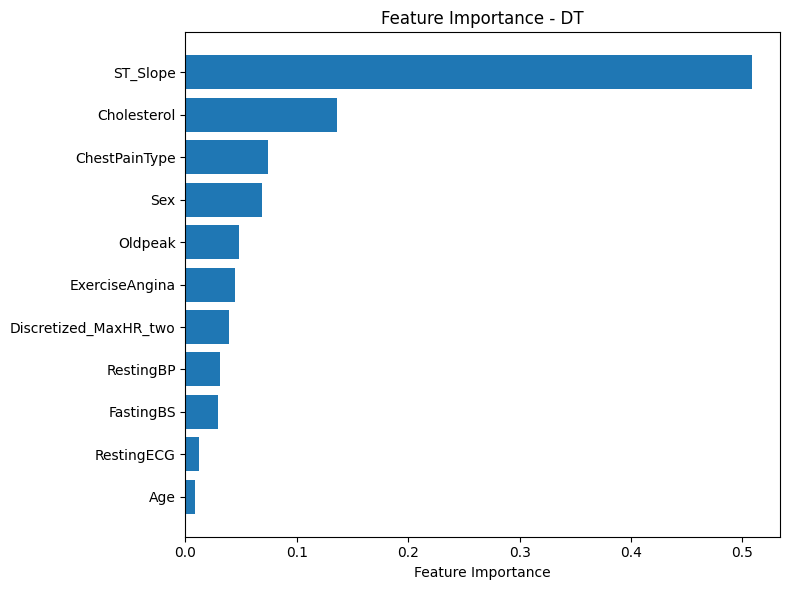


------------------------------------------------------------

Random Forest Classifier

Best parameters: {'max_depth': 10, 'n_estimators': 100}
Best cross-validation score: 0.8709

Test set accuracy: 0.8795
Training set accuracy: 0.9892
Test set AUC: 0.9440
Training set AUC: 0.9996
Possible overfitting


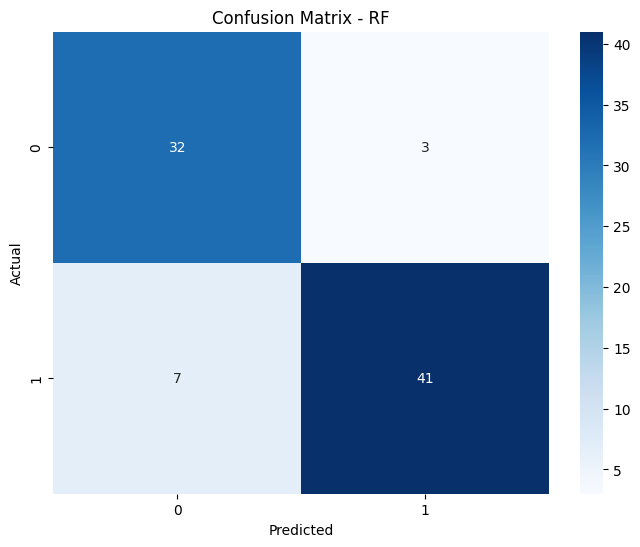

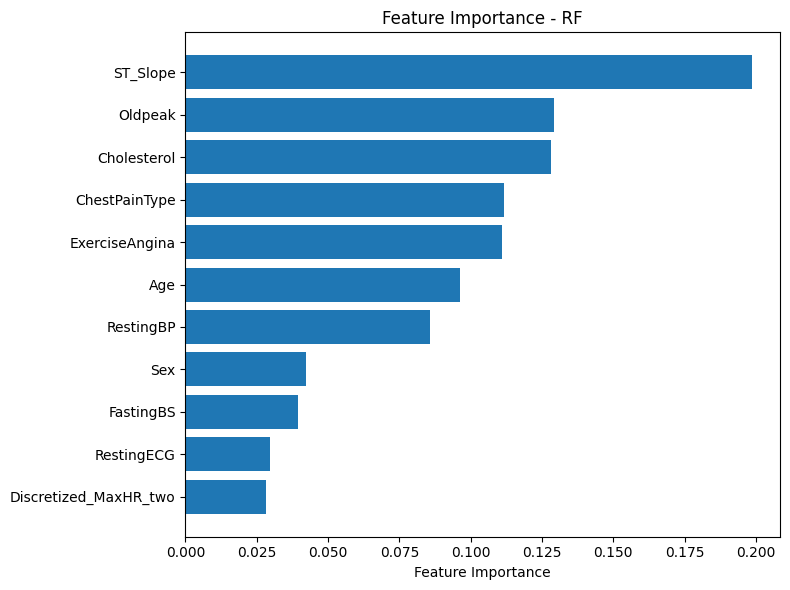


------------------------------------------------------------

XGBoost Classifier

Best cross validation score:  0.8613912570288409

Test set accuracy: 0.8795
Training set accuracy: 1.0000
Test set AUC: 0.9179
Training set AUC: 1.0000
Possible overfitting


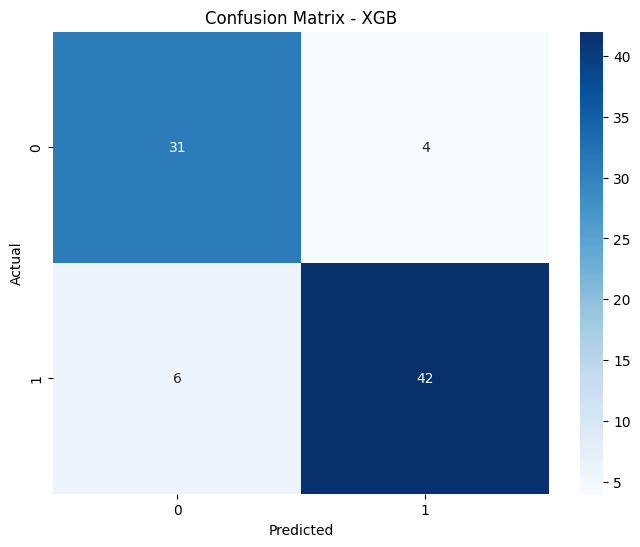

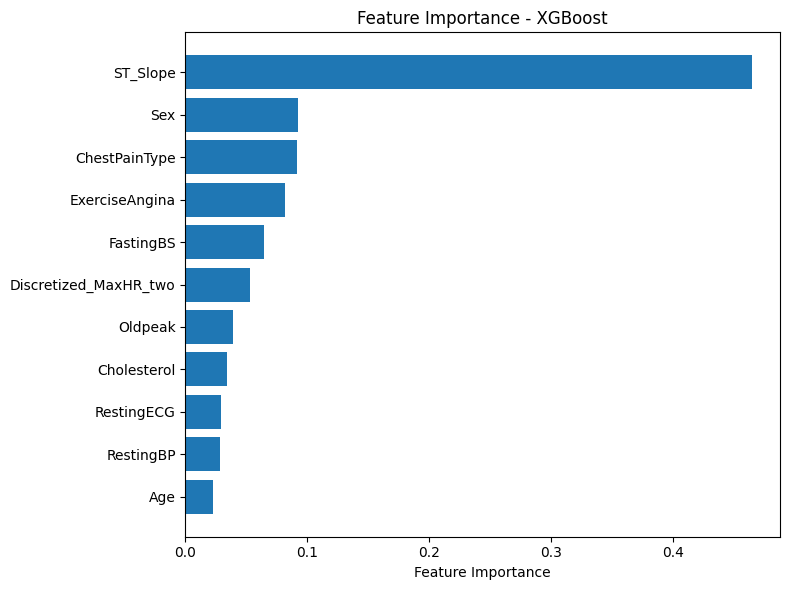


------------------------------------------------------------

Naive Bayes Classifier

Best cross validation scores:  0.8456375838926175

Test set accuracy: 0.8193
Training set accuracy: 0.8560
Test set AUC: 0.8905
Training set AUC: 0.9185
No overfitting


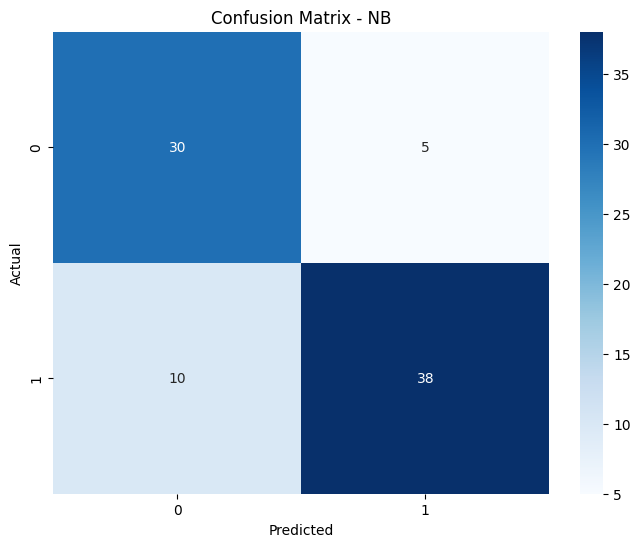


------------------------------------------------------------

K-Nearest Neighbors Classifier

Best parameters: {'n_neighbors': 10}
Best cross-validation score: 0.6649

Test set accuracy: 0.6145
Training set accuracy: 0.7308
Test set AUC: 0.7009
Training set AUC: 0.8240
Possible overfitting


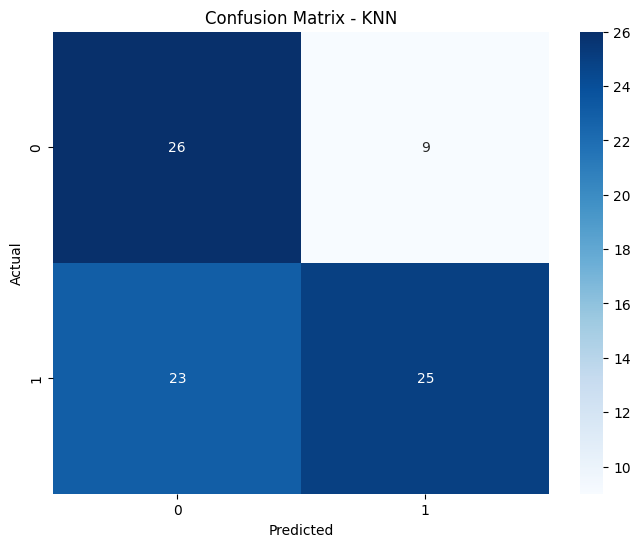


------------------------------------------------------------



In [ ]:
predict(fixed_x_train_10, fixed_x_test_10, fixed_y_train_10, fixed_y_test_10)

# Part 3: Normalizing values, removing features and comparing the resuls

**To understand the methods deeper we will normalize values, remove certain features and compare the results with the best-performing models we have.**

**Best-performing models:**

MaxHR Prediction - First dataset:
Decision Tree Classifier

Best parameters: {'max_depth': 5, 'max_leaf_nodes': 20, 'min_samples_leaf': 10, 'min_samples_split': 50}
Best cross-validation score: 0.6845

Test set accuracy: 0.7087
Training set accuracy: 0.7485
Test set AUC: 0.7710
Training set AUC: 0.8103
No overfitting


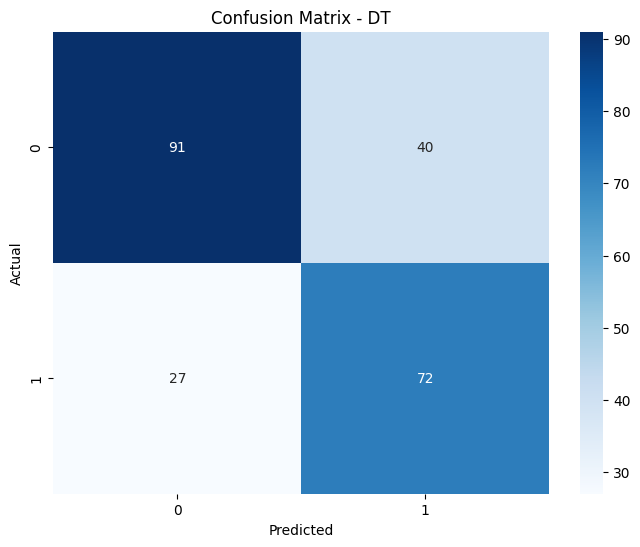

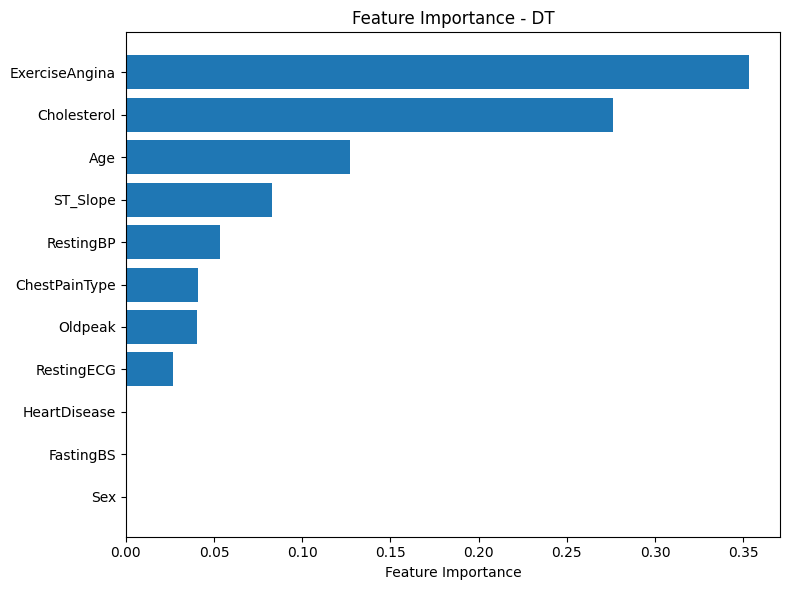


------------------------------------------------------------

Random Forest Classifier

Best parameters: {'max_depth': 3, 'n_estimators': 200}
Best cross-validation score: 0.7107

Test set accuracy: 0.7478
Training set accuracy: 0.7456
Test set AUC: 0.7861
Training set AUC: 0.8080
No overfitting


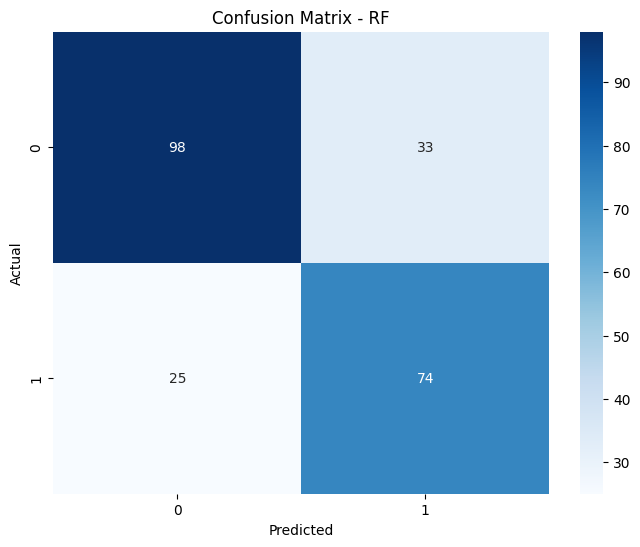

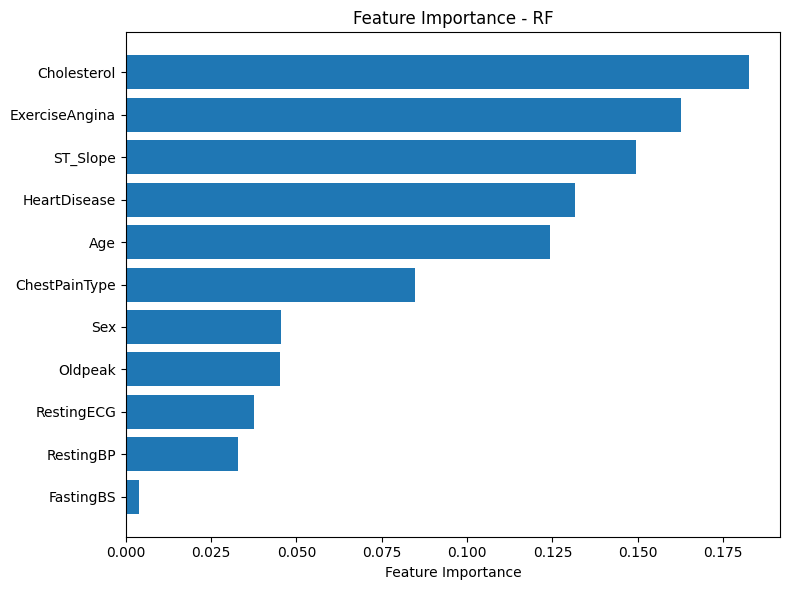


------------------------------------------------------------

XGBoost Classifier

Best cross validation score:  0.687464297048556

Test set accuracy: 0.6565
Training set accuracy: 1.0000
Test set AUC: 0.6878
Training set AUC: 1.0000
Possible overfitting


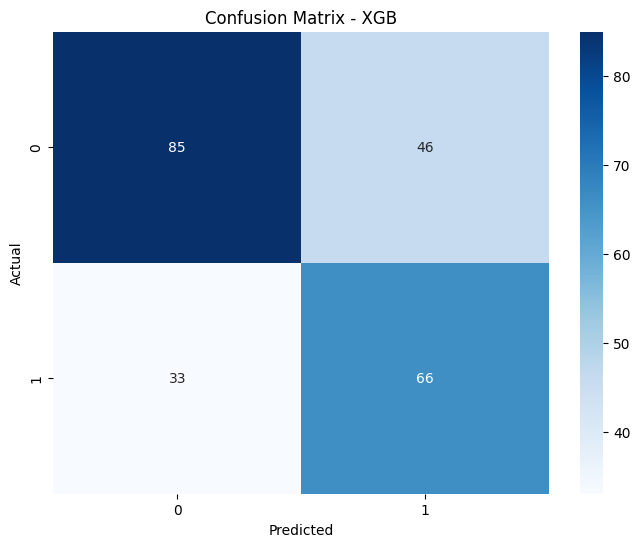

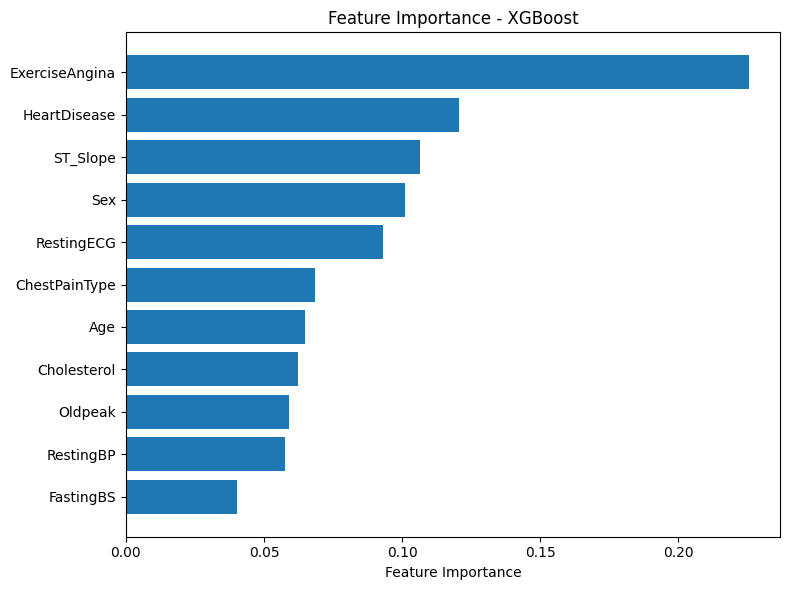


------------------------------------------------------------

Naive Bayes Classifier

Best cross validation scores:  0.7681159420289855

Test set accuracy: 0.7478
Training set accuracy: 0.7108
Test set AUC: 0.7470
Training set AUC: 0.7646
No overfitting


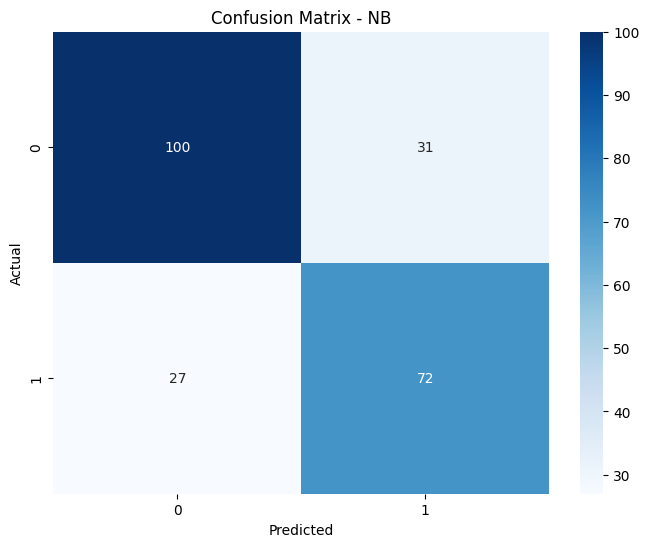


------------------------------------------------------------

K-Nearest Neighbors Classifier

Best parameters: {'n_neighbors': 10}
Best cross-validation score: 0.6395

Test set accuracy: 0.5957
Training set accuracy: 0.7093
Test set AUC: 0.6282
Training set AUC: 0.7779
Possible overfitting


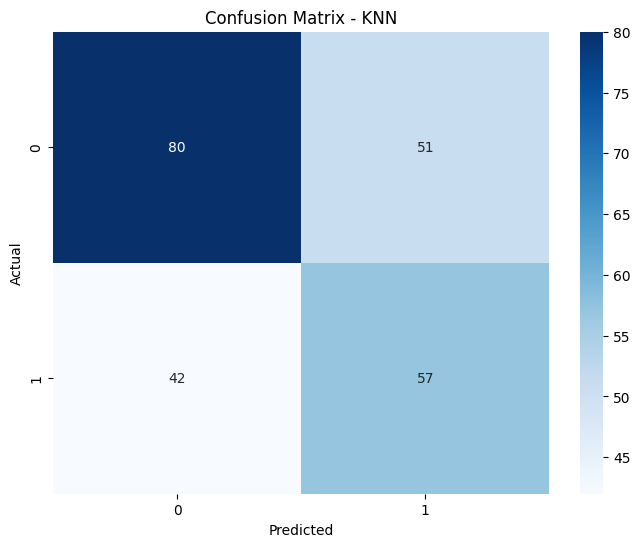


------------------------------------------------------------



In [ ]:
print("==================================")
print("MaxHR Prediction - First dataset:")
print("==================================")
predict(hr_two_x_train_25, hr_two_x_test_25, hr_two_y_train_25, hr_two_y_test_25)

MaxHR Prediction - Second dataset:
Decision Tree Classifier

Best parameters: {'max_depth': 3, 'max_leaf_nodes': 20, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best cross-validation score: 0.6833

Test set accuracy: 0.7246
Training set accuracy: 0.7237
Test set AUC: 0.7413
Training set AUC: 0.7876
No overfitting


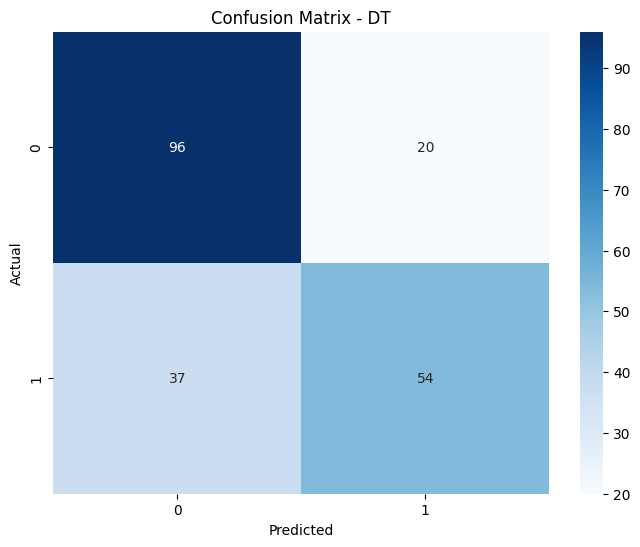

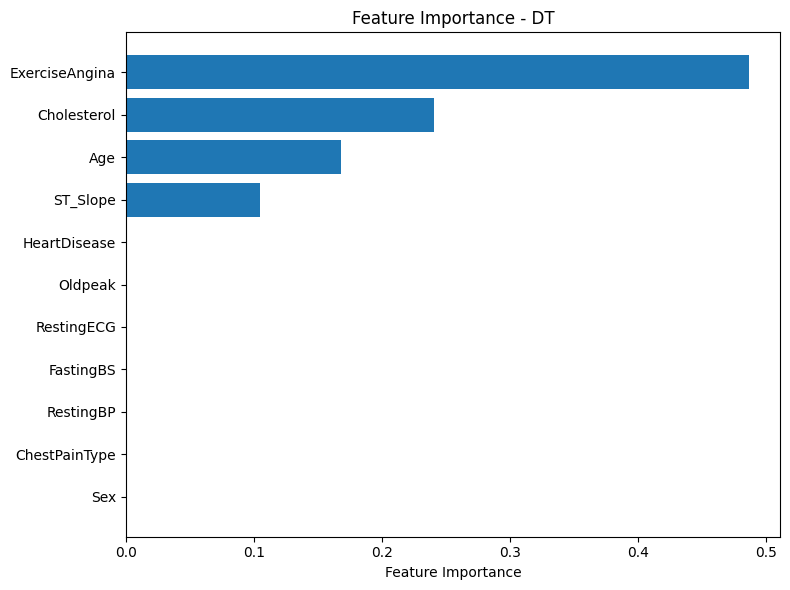


------------------------------------------------------------

Random Forest Classifier

Best parameters: {'max_depth': 5, 'n_estimators': 200}
Best cross-validation score: 0.7237

Test set accuracy: 0.8068
Training set accuracy: 0.8223
Test set AUC: 0.8545
Training set AUC: 0.8930
No overfitting


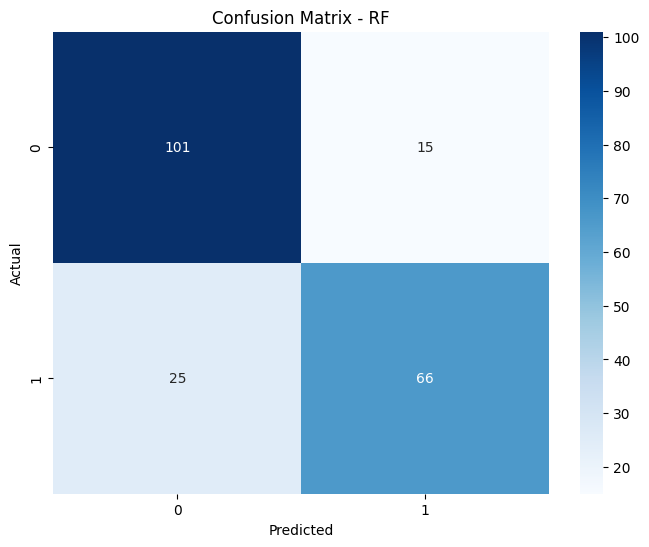

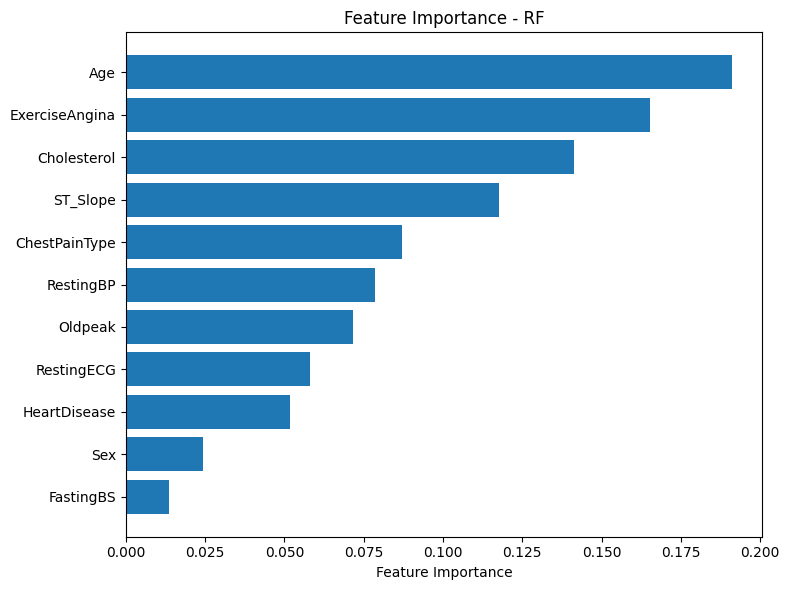


------------------------------------------------------------

XGBoost Classifier

Best cross validation score:  0.7043928665093103

Test set accuracy: 0.7053
Training set accuracy: 1.0000
Test set AUC: 0.8019
Training set AUC: 1.0000
Possible overfitting


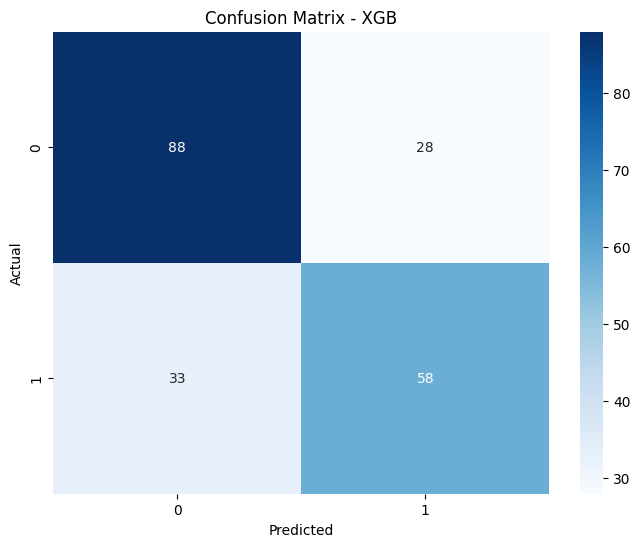

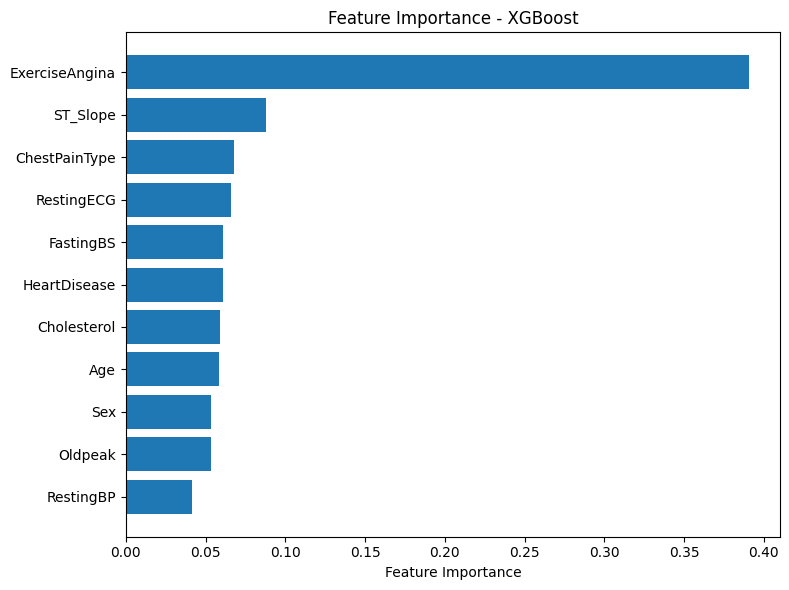


------------------------------------------------------------

Naive Bayes Classifier

Best cross validation scores:  0.7096774193548387

Test set accuracy: 0.7440
Training set accuracy: 0.6963
Test set AUC: 0.8120
Training set AUC: 0.7584
No overfitting


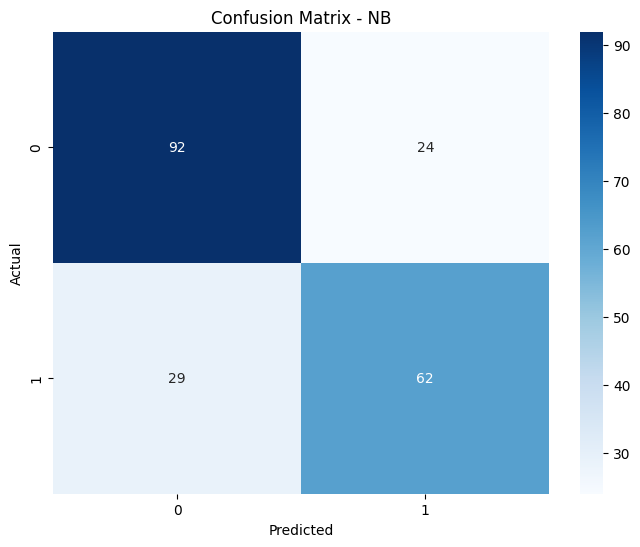


------------------------------------------------------------

K-Nearest Neighbors Classifier

Best parameters: {'n_neighbors': 10}
Best cross-validation score: 0.6219

Test set accuracy: 0.6715
Training set accuracy: 0.6753
Test set AUC: 0.6816
Training set AUC: 0.7420
No overfitting


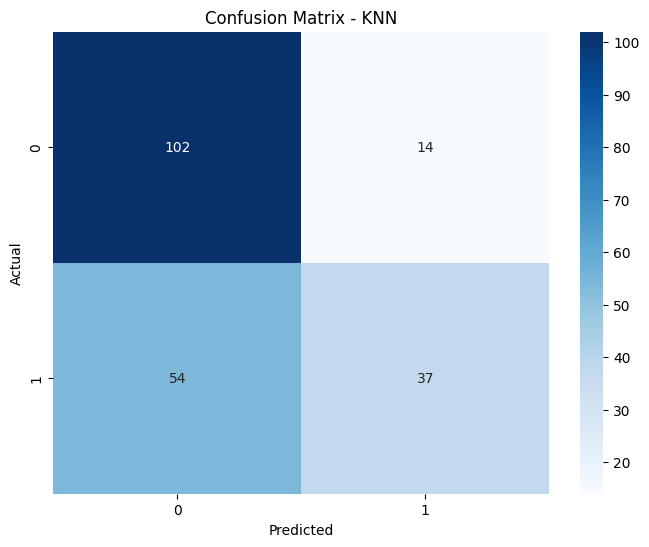


------------------------------------------------------------



In [ ]:
print("==================================")
print("MaxHR Prediction - Second dataset:")
print("==================================")
predict(fixed_hr_two_x_train_25, fixed_hr_two_x_test_25, fixed_hr_two_y_train_25, fixed_hr_two_y_test_25)

HeartDisease Prediction - First dataset:
Decision Tree Classifier

Best parameters: {'max_depth': 5, 'max_leaf_nodes': 20, 'min_samples_leaf': 20, 'min_samples_split': 50}
Best cross-validation score: 0.8342

Test set accuracy: 0.8804
Training set accuracy: 0.8668
Test set AUC: 0.9378
Training set AUC: 0.9334
No overfitting


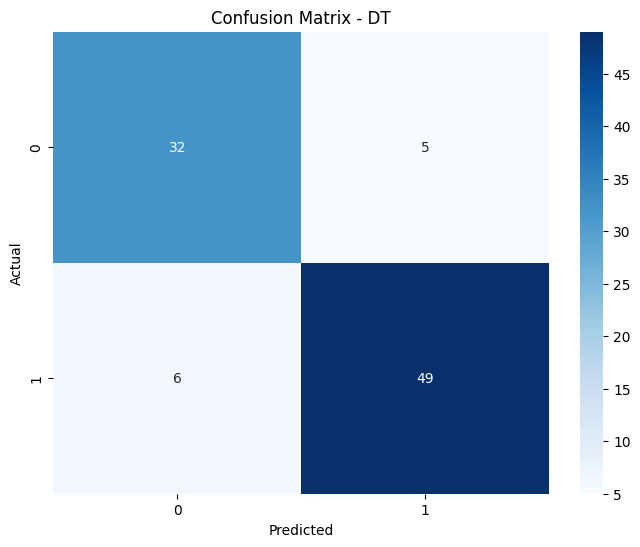

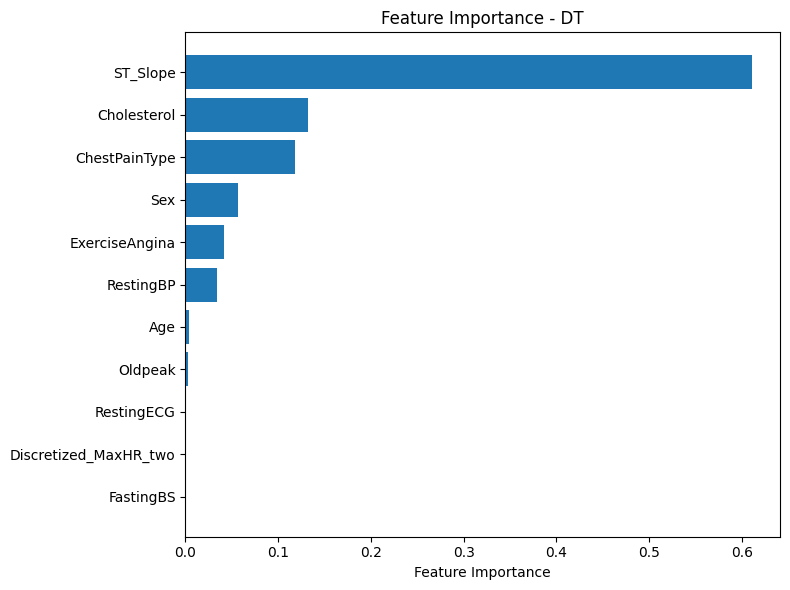


------------------------------------------------------------

Random Forest Classifier

Best parameters: {'max_depth': 7, 'n_estimators': 100}
Best cross-validation score: 0.8656

Test set accuracy: 0.9457
Training set accuracy: 0.9455
Test set AUC: 0.9592
Training set AUC: 0.9883
No overfitting


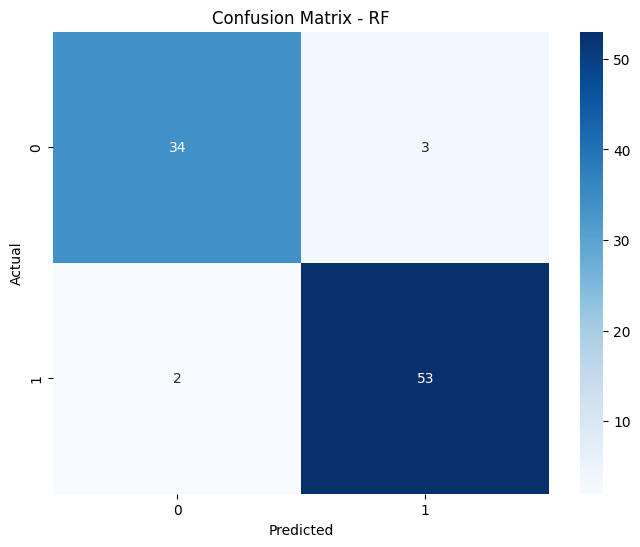

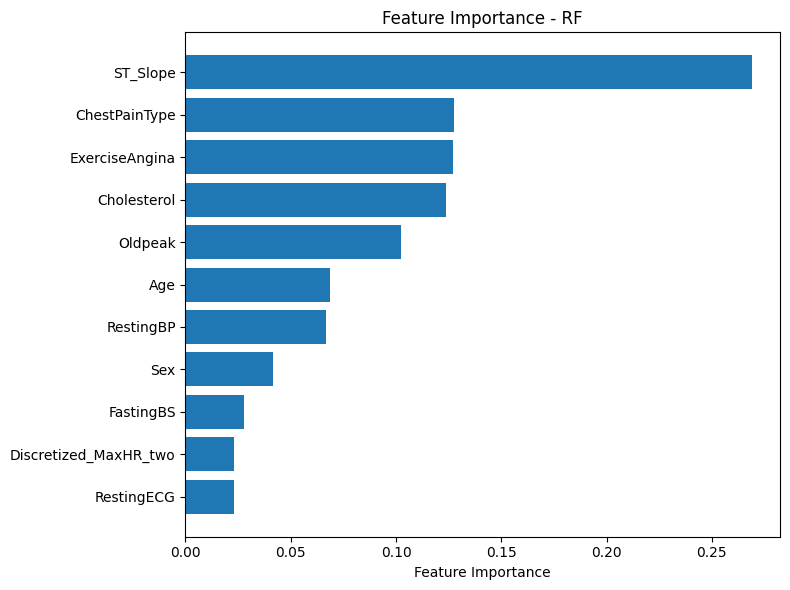


------------------------------------------------------------

XGBoost Classifier

Best cross validation score:  0.8341657539247901

Test set accuracy: 0.9239
Training set accuracy: 1.0000
Test set AUC: 0.9553
Training set AUC: 1.0000
Possible overfitting


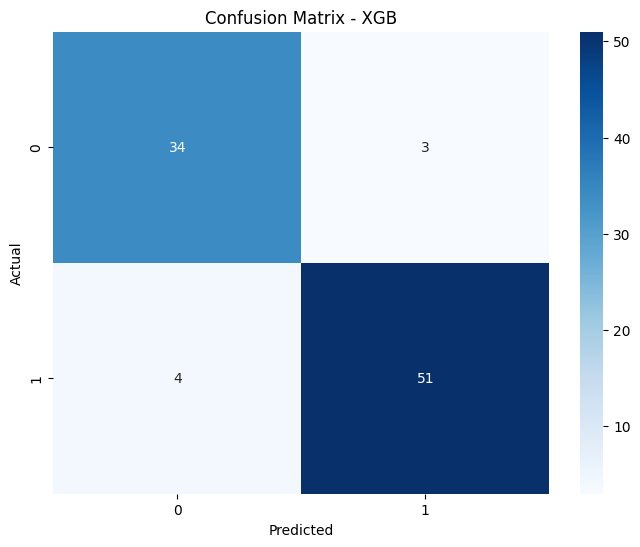

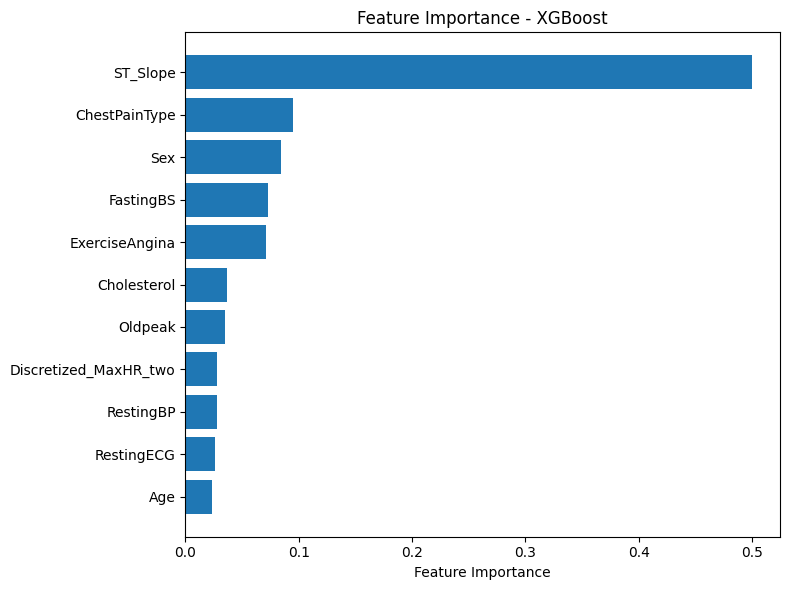


------------------------------------------------------------

Naive Bayes Classifier

Best cross validation scores:  0.8484848484848485

Test set accuracy: 0.9130
Training set accuracy: 0.8511
Test set AUC: 0.9459
Training set AUC: 0.9107
No overfitting


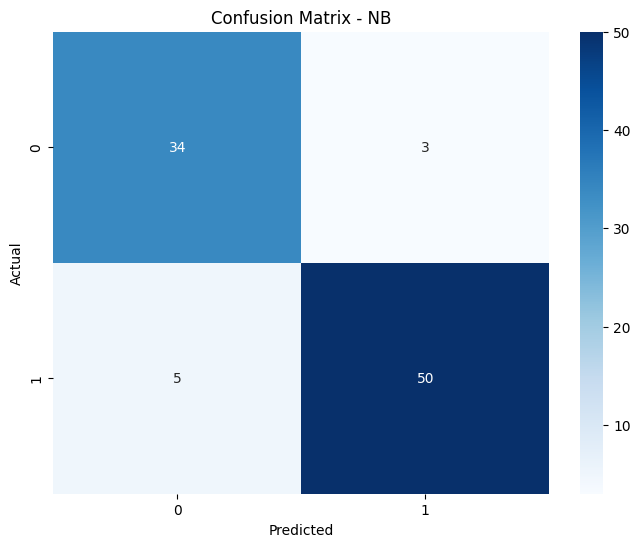


------------------------------------------------------------

K-Nearest Neighbors Classifier

Best parameters: {'n_neighbors': 7}
Best cross-validation score: 0.6538

Test set accuracy: 0.6630
Training set accuracy: 0.7591
Test set AUC: 0.6575
Training set AUC: 0.8428
Possible overfitting


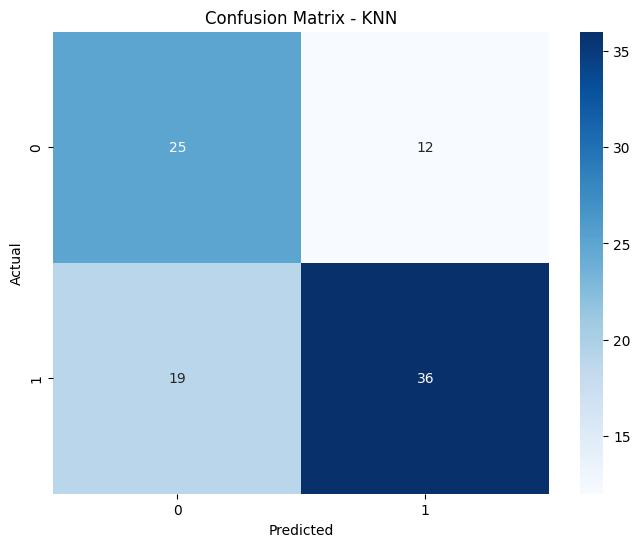


------------------------------------------------------------



In [ ]:
print("==================================")
print("HeartDisease Prediction - First dataset:")
print("==================================")
predict(x_train_10, x_test_10, y_train_10, y_test_10)

HeartDisease Prediction - Second dataset:
Decision Tree Classifier

Best parameters: {'max_depth': 7, 'max_leaf_nodes': 20, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best cross-validation score: 0.8399

Test set accuracy: 0.8554
Training set accuracy: 0.8991
Test set AUC: 0.9220
Training set AUC: 0.9374
No overfitting


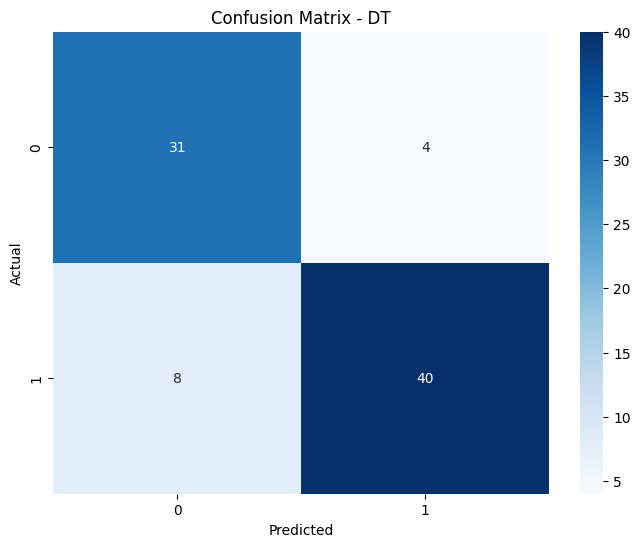

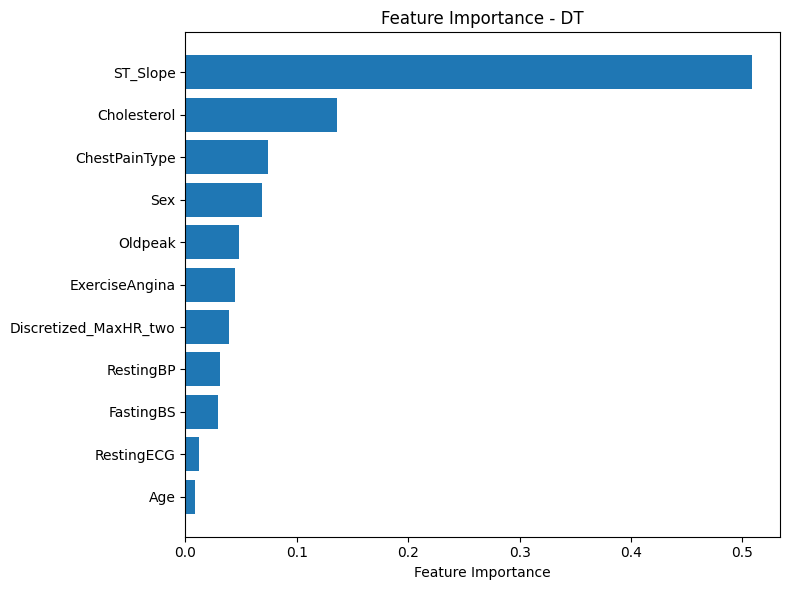


------------------------------------------------------------

Random Forest Classifier

Best parameters: {'max_depth': 10, 'n_estimators': 100}
Best cross-validation score: 0.8709

Test set accuracy: 0.8795
Training set accuracy: 0.9892
Test set AUC: 0.9440
Training set AUC: 0.9996
Possible overfitting


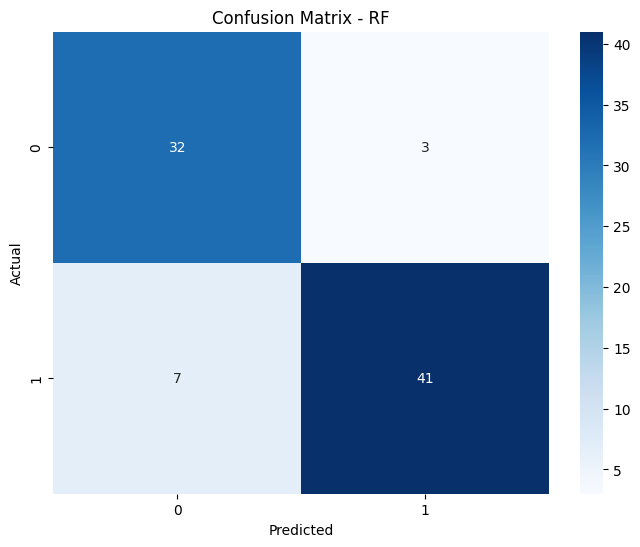

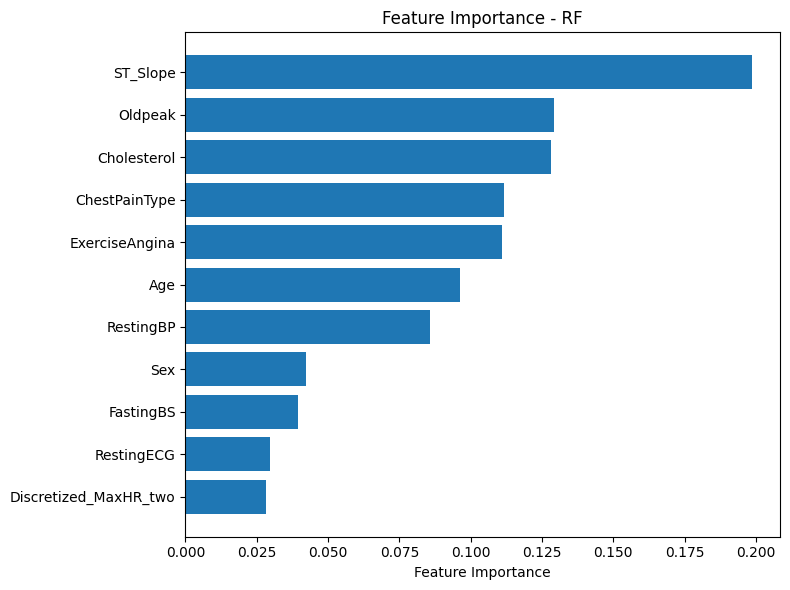


------------------------------------------------------------

XGBoost Classifier

Best cross validation score:  0.8613912570288409

Test set accuracy: 0.8795
Training set accuracy: 1.0000
Test set AUC: 0.9179
Training set AUC: 1.0000
Possible overfitting


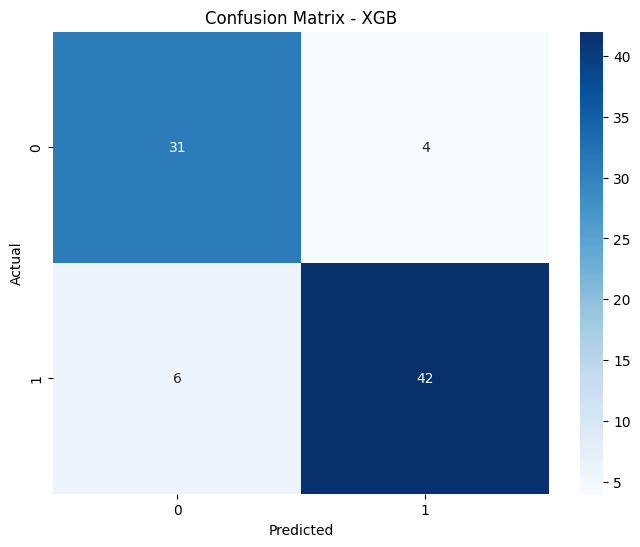

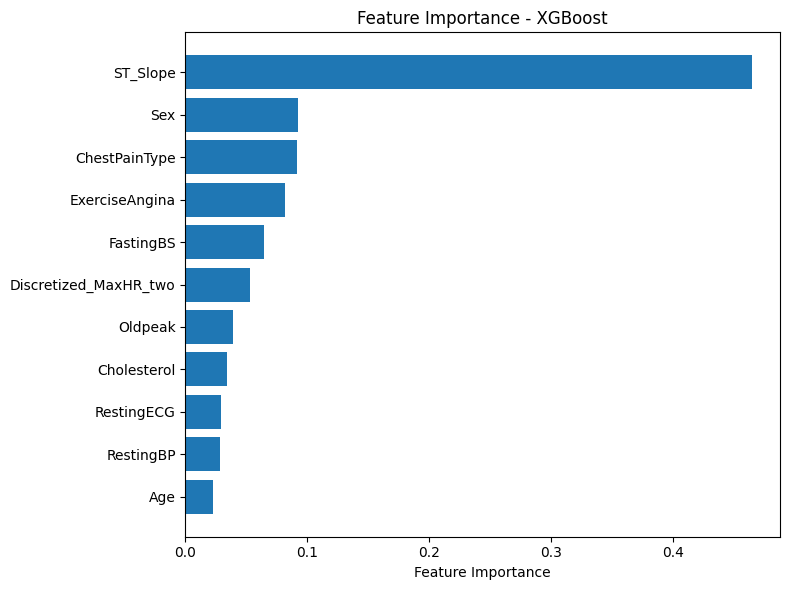


------------------------------------------------------------

Naive Bayes Classifier

Best cross validation scores:  0.8456375838926175

Test set accuracy: 0.8193
Training set accuracy: 0.8560
Test set AUC: 0.8905
Training set AUC: 0.9185
No overfitting


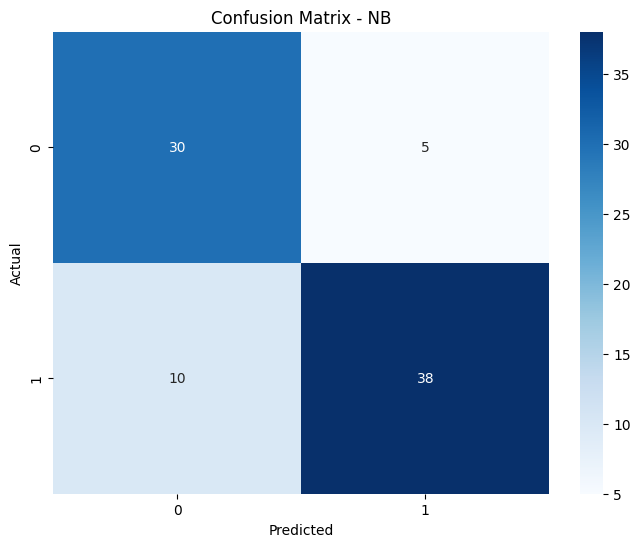


------------------------------------------------------------

K-Nearest Neighbors Classifier

Best parameters: {'n_neighbors': 10}
Best cross-validation score: 0.6649

Test set accuracy: 0.6145
Training set accuracy: 0.7308
Test set AUC: 0.7009
Training set AUC: 0.8240
Possible overfitting


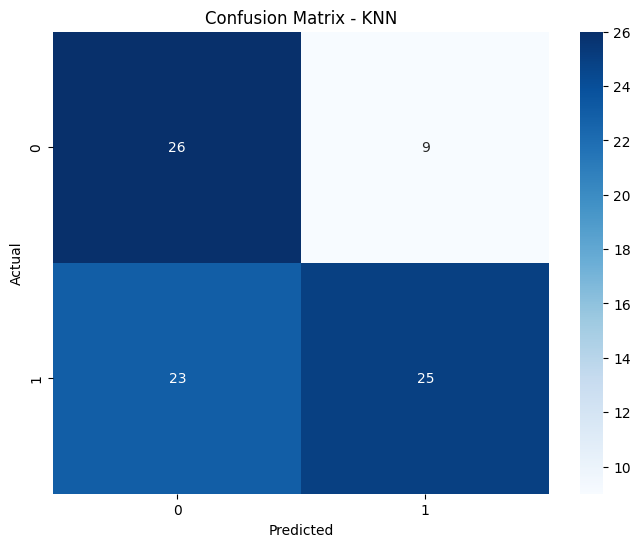


------------------------------------------------------------



In [ ]:
print("==================================")
print("HeartDisease Prediction - Second dataset:")
print("==================================")
predict(fixed_x_train_10, fixed_x_test_10, fixed_y_train_10, fixed_y_test_10)

**Normalizing values:**

In [ ]:
# Normalizing RestingBP and Cholesterol columns

# first dataset
dataset[['RestingBP_normalized','Cholesterol_normalized']] = MinMaxScaler().fit_transform(dataset[['RestingBP', 'Cholesterol']])
hr_x = dataset.drop(['MaxHR', 'Discretized_MaxHR_three', 'Discretized_MaxHR_two', 'RestingBP', 'Cholesterol'], axis=1)
hr_y = dataset['Discretized_MaxHR_two']
x = dataset.drop(['MaxHR', 'Discretized_MaxHR_three', 'HeartDisease', 'RestingBP', 'Cholesterol'], axis=1)
y = dataset['HeartDisease']

hr_x_train, hr_x_test, hr_y_train, hr_y_test = train_test_split(hr_x, hr_y, test_size=0.2, random_state=RANDOM_STATE)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=RANDOM_STATE)

# second dataset
fixed_dataset[['RestingBP_normalized','Cholesterol_normalized']] = MinMaxScaler().fit_transform(fixed_dataset[['RestingBP', 'Cholesterol']])
fixed_hr_x = dataset.drop(['MaxHR', 'Discretized_MaxHR_three', 'Discretized_MaxHR_two', 'RestingBP', 'Cholesterol'], axis=1)
fixed_hr_y = dataset['Discretized_MaxHR_two']
fixed_x = fixed_dataset.drop(['MaxHR', 'Discretized_MaxHR_three', 'HeartDisease', 'RestingBP', 'Cholesterol'], axis=1)
fixed_y = fixed_dataset['HeartDisease']

fixed_hr_x_train, fixed_hr_x_test, fixed_hr_y_train, fixed_hr_y_test = train_test_split(fixed_hr_x, fixed_hr_y, test_size=0.25, random_state=RANDOM_STATE)
fixed_x_train, fixed_x_test, fixed_y_train, fixed_y_test = train_test_split(fixed_x, fixed_y, test_size=0.1, random_state=RANDOM_STATE)

**Running the models after normalization**

Predicting MaxHR: second dataset, 2 category discretization, test size = 25%
Decision Tree Classifier

Best parameters: {'max_depth': 5, 'max_leaf_nodes': 20, 'min_samples_leaf': 10, 'min_samples_split': 50}
Best cross-validation score: 0.6845

Test set accuracy: 0.7087
Training set accuracy: 0.7485
Test set AUC: 0.7710
Training set AUC: 0.8103
No overfitting


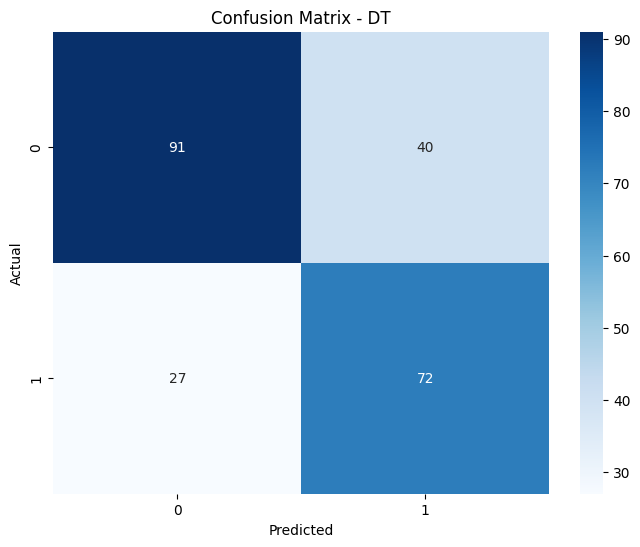

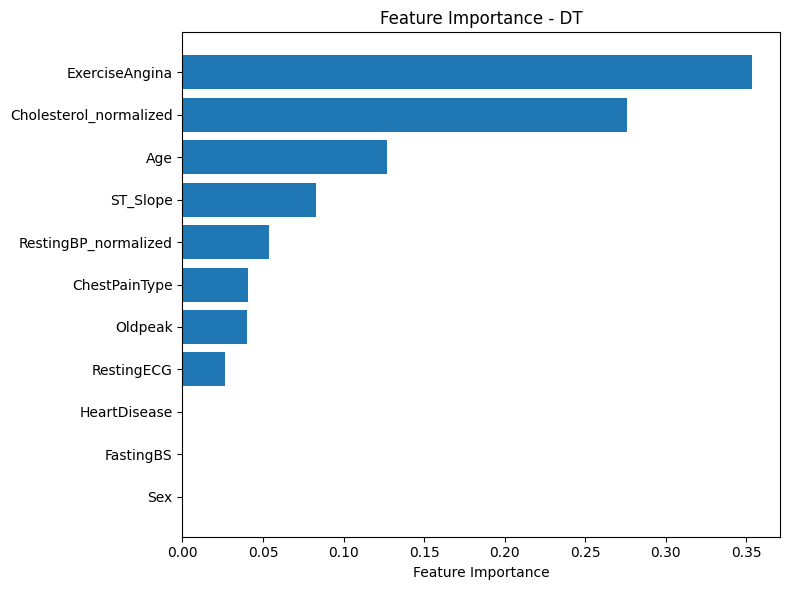


------------------------------------------------------------

Random Forest Classifier

Best parameters: {'max_depth': 5, 'n_estimators': 50}
Best cross-validation score: 0.7194

Test set accuracy: 0.7348
Training set accuracy: 0.7936
Test set AUC: 0.7753
Training set AUC: 0.8746
Possible overfitting


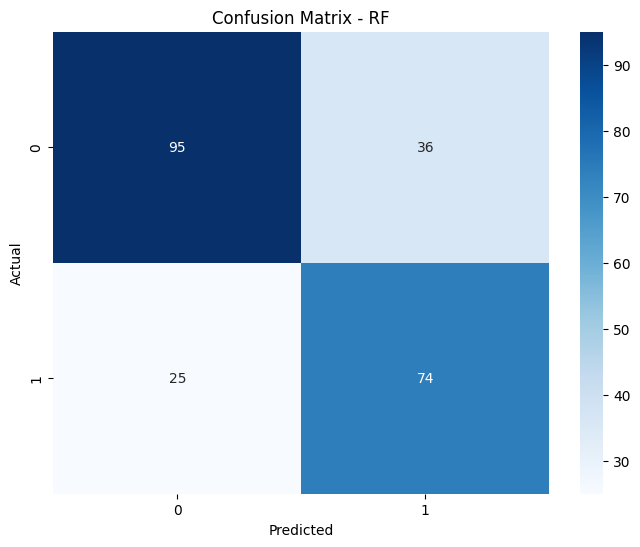

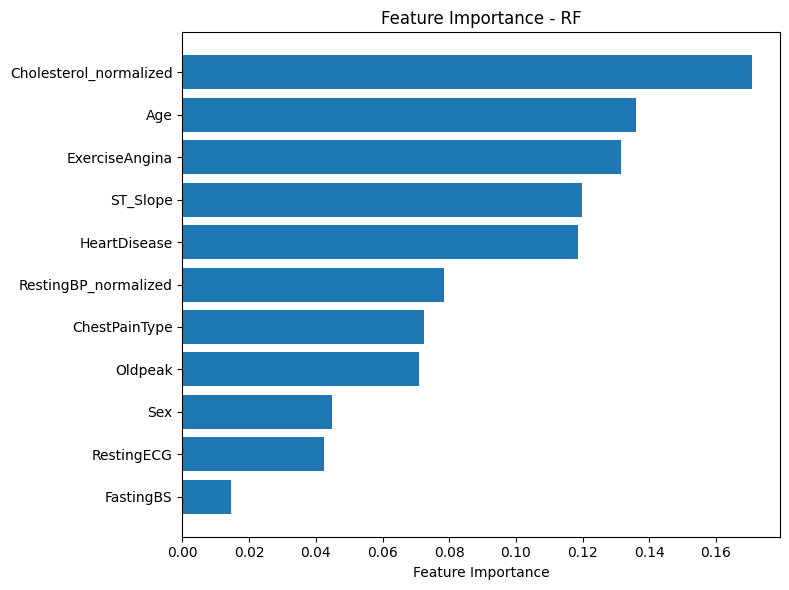


------------------------------------------------------------

XGBoost Classifier

Best cross validation score:  0.6947212525124298

Test set accuracy: 0.6348
Training set accuracy: 1.0000
Test set AUC: 0.6755
Training set AUC: 1.0000
Possible overfitting


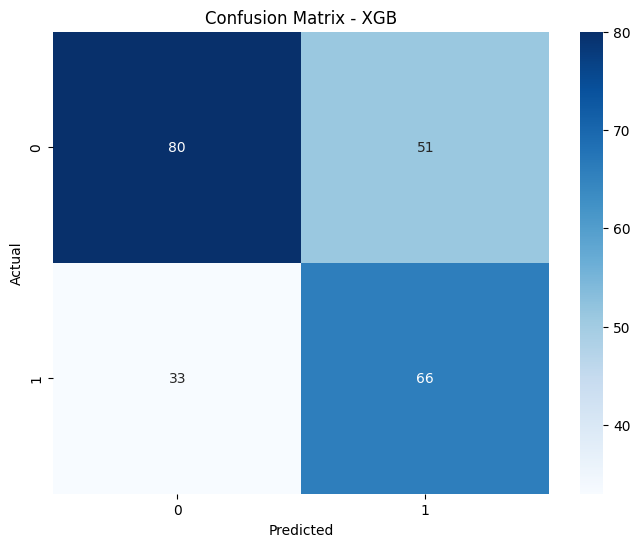

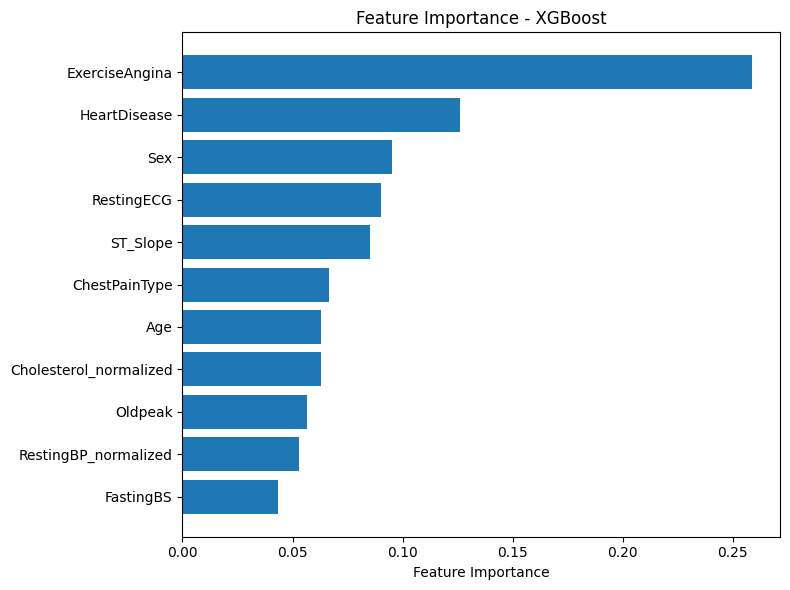


------------------------------------------------------------

Naive Bayes Classifier

Best cross validation scores:  0.7681159420289855

Test set accuracy: 0.7478
Training set accuracy: 0.7108
Test set AUC: 0.7470
Training set AUC: 0.7646
No overfitting


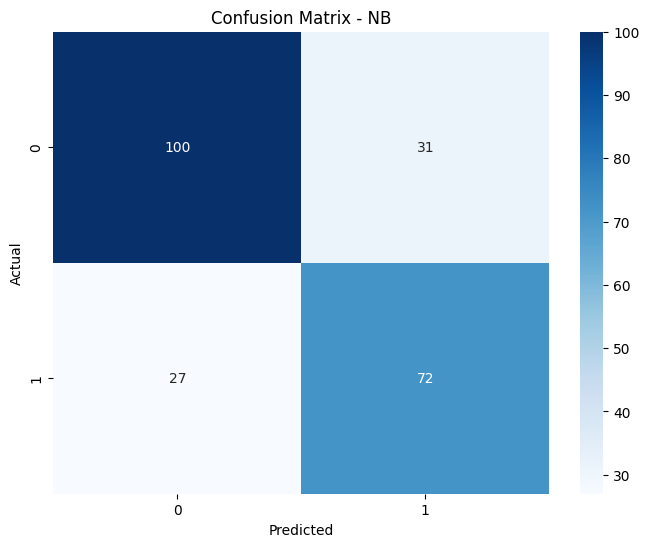


------------------------------------------------------------

K-Nearest Neighbors Classifier

Best parameters: {'n_neighbors': 7}
Best cross-validation score: 0.6585

Test set accuracy: 0.7000
Training set accuracy: 0.7413
Test set AUC: 0.7643
Training set AUC: 0.8222
No overfitting


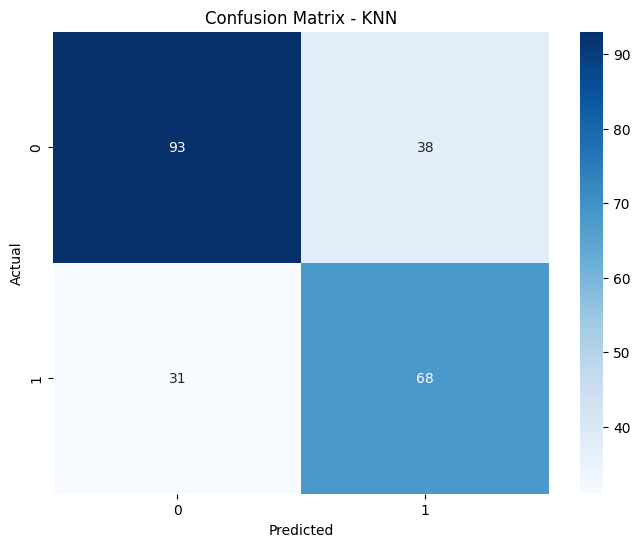


------------------------------------------------------------



In [ ]:
print("======================================================================================================")
print("Predicting MaxHR: second dataset, 2 category discretization, test size = 25%")
print("======================================================================================================")
predict(fixed_hr_x_train, fixed_hr_x_test, fixed_hr_y_train, fixed_hr_y_test)

HeartDisease Prediction - First dataset, 2 category discretization, test size = 10%:
Decision Tree Classifier

Best parameters: {'max_depth': 5, 'max_leaf_nodes': 20, 'min_samples_leaf': 20, 'min_samples_split': 50}
Best cross-validation score: 0.8342

Test set accuracy: 0.8804
Training set accuracy: 0.8668
Test set AUC: 0.9378
Training set AUC: 0.9334
No overfitting


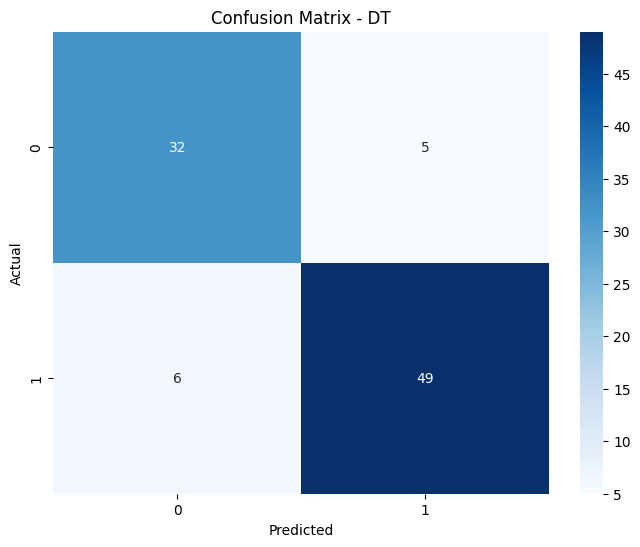

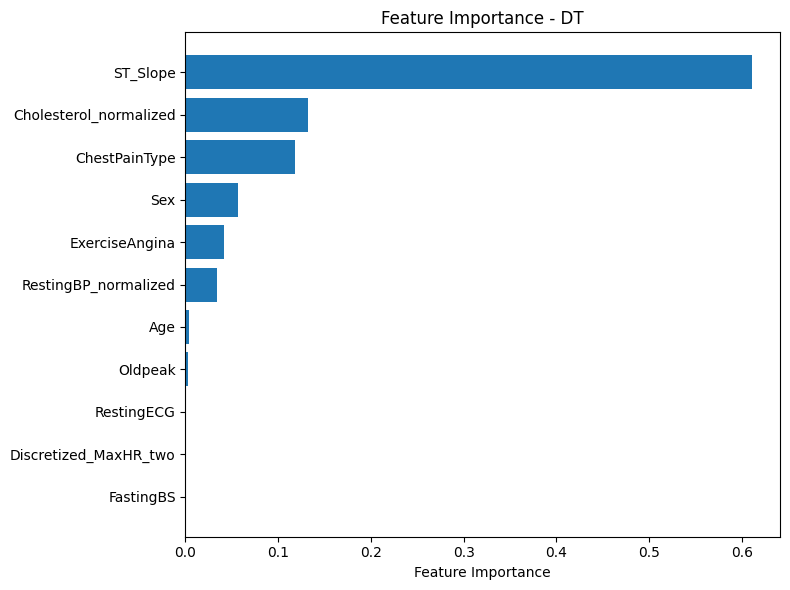


------------------------------------------------------------

Random Forest Classifier

Best parameters: {'max_depth': 5, 'n_estimators': 50}
Best cross-validation score: 0.8680

Test set accuracy: 0.9348
Training set accuracy: 0.8971
Test set AUC: 0.9622
Training set AUC: 0.9624
No overfitting


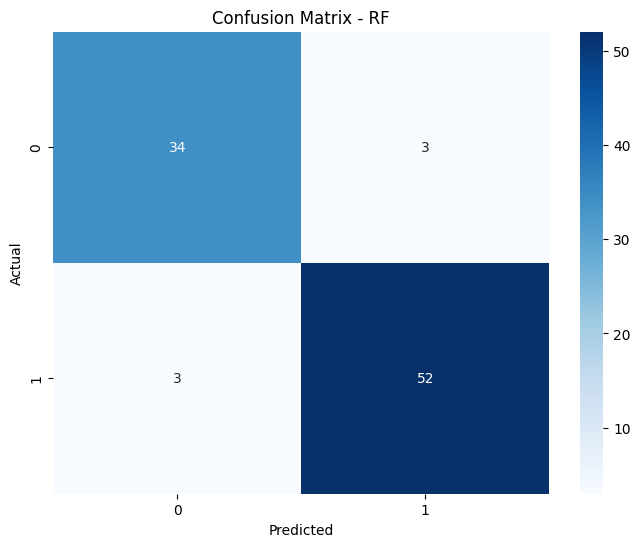

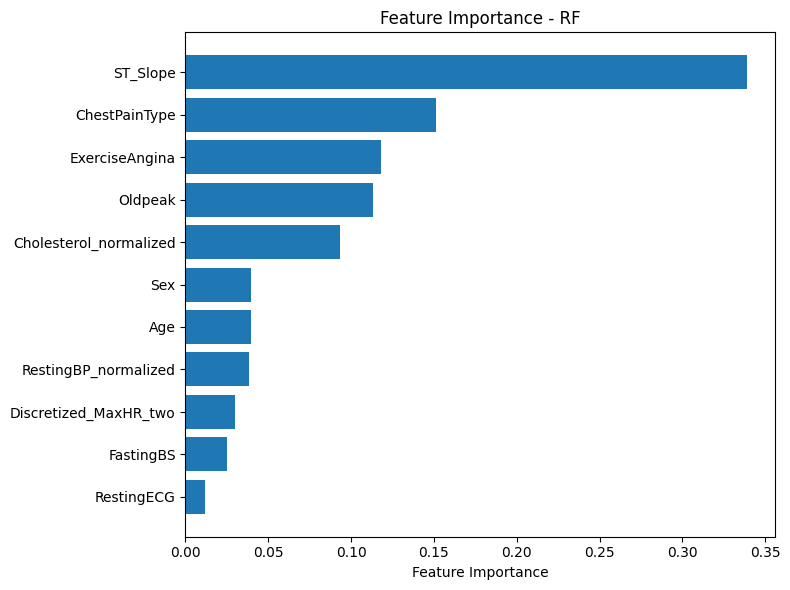


------------------------------------------------------------

XGBoost Classifier

Best cross validation score:  0.8353778751369113

Test set accuracy: 0.9239
Training set accuracy: 1.0000
Test set AUC: 0.9553
Training set AUC: 1.0000
Possible overfitting


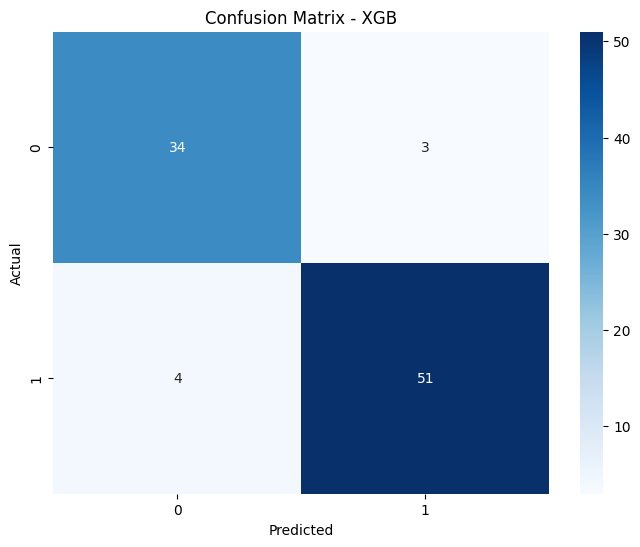

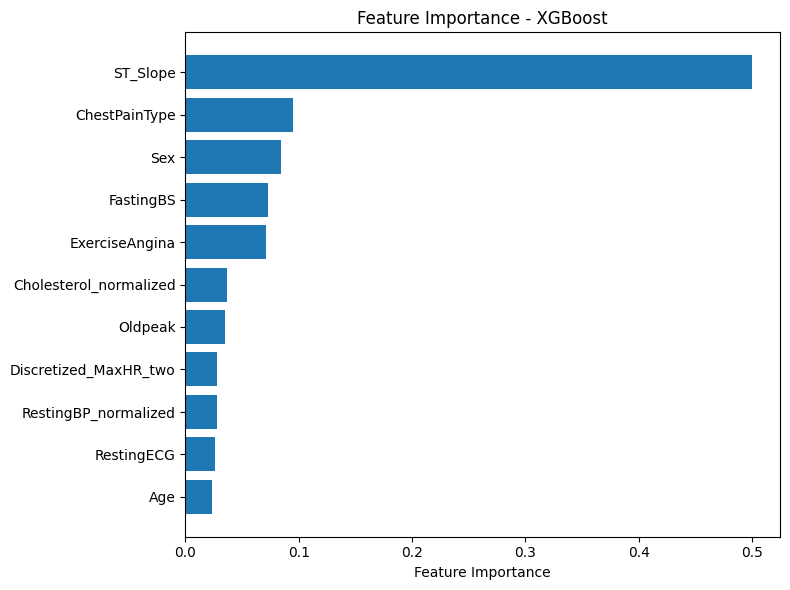


------------------------------------------------------------

Naive Bayes Classifier

Best cross validation scores:  0.8484848484848485

Test set accuracy: 0.9130
Training set accuracy: 0.8523
Test set AUC: 0.9459
Training set AUC: 0.9107
No overfitting


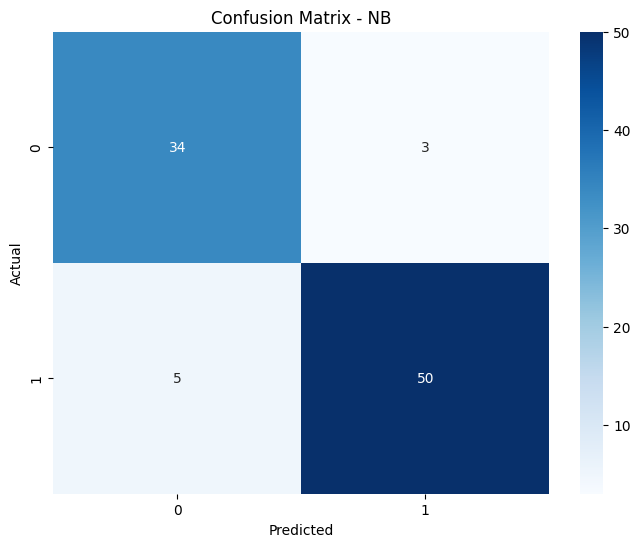


------------------------------------------------------------

K-Nearest Neighbors Classifier

Best parameters: {'n_neighbors': 3}
Best cross-validation score: 0.8002

Test set accuracy: 0.8696
Training set accuracy: 0.8826
Test set AUC: 0.9302
Training set AUC: 0.9581
No overfitting


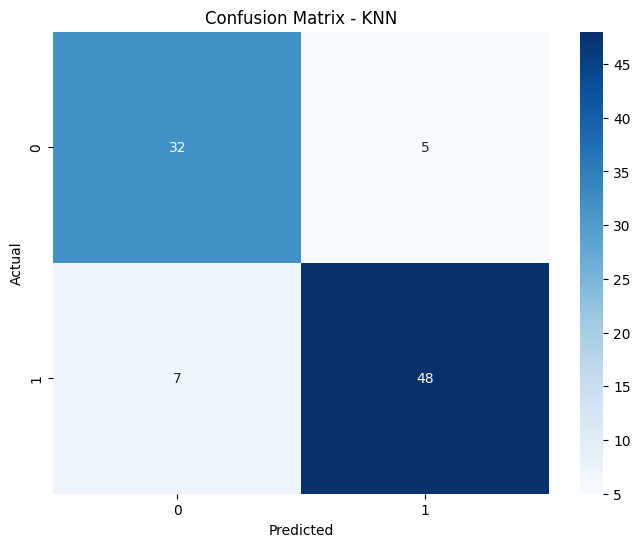


------------------------------------------------------------



In [ ]:
print("======================================================================================================")
print("HeartDisease Prediction - First dataset, 2 category discretization, test size = 10%:")
print("======================================================================================================")
predict(x_train, x_test, y_train, y_test)

**Removing features: 'Oldpeak', 'RestingECG' and comparing results**

In [ ]:
# for hr prediction
columns_to_remove1 = ['Oldpeak', 'RestingECG', 'RestingBP_normalized','Cholesterol_normalized', 'Discretized_MaxHR_two', 'MaxHR', 'Discretized_MaxHR_three']

# for heartdisease prediction
columns_to_remove2 = ['Oldpeak', 'RestingECG', 'RestingBP_normalized','Cholesterol_normalized', 'Discretized_MaxHR_three', 'MaxHR', 'HeartDisease']

hr_x = fixed_dataset.drop(columns_to_remove1, axis=1, errors='ignore')
hr_y = fixed_dataset['Discretized_MaxHR_two']

x = dataset.drop(columns_to_remove2, axis=1, errors='ignore')
y = dataset['HeartDisease']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=RANDOM_STATE)
hr_x_train, hr_x_test, hr_y_train, hr_y_test = train_test_split(hr_x, hr_y, test_size=0.25, random_state=RANDOM_STATE)


**Running the models after removing features**

Predicting MaxHR: second dataset, 2 category discretization, test size = 25%
Decision Tree Classifier

Best parameters: {'max_depth': 3, 'max_leaf_nodes': 20, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best cross-validation score: 0.6833

Test set accuracy: 0.7246
Training set accuracy: 0.7237
Test set AUC: 0.7413
Training set AUC: 0.7876
No overfitting


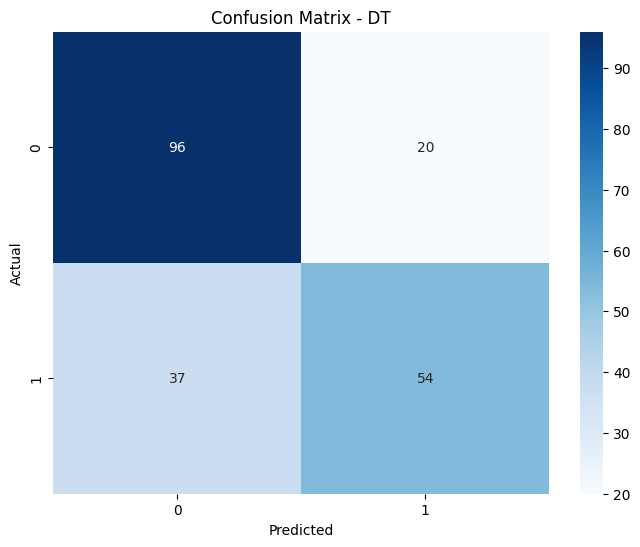

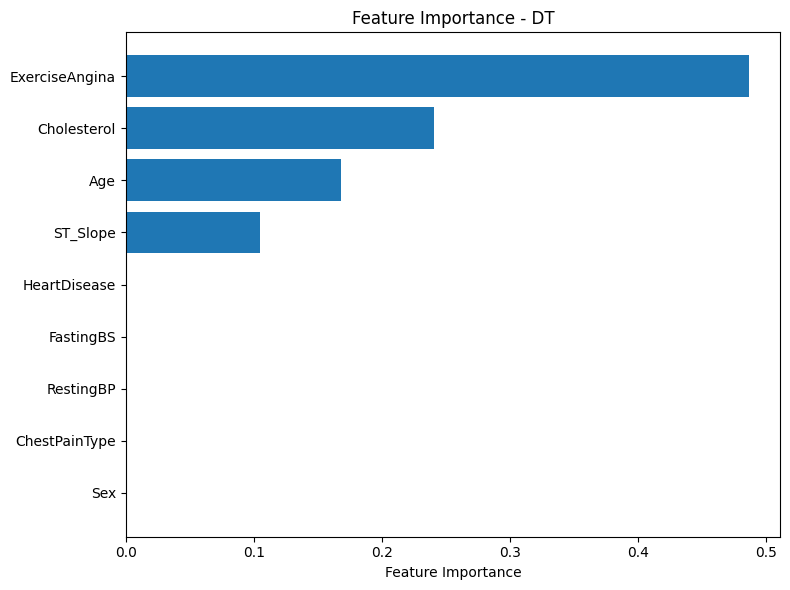


------------------------------------------------------------

Random Forest Classifier

Best parameters: {'max_depth': 5, 'n_estimators': 200}
Best cross-validation score: 0.7060

Test set accuracy: 0.7826
Training set accuracy: 0.8013
Test set AUC: 0.8482
Training set AUC: 0.8832
No overfitting


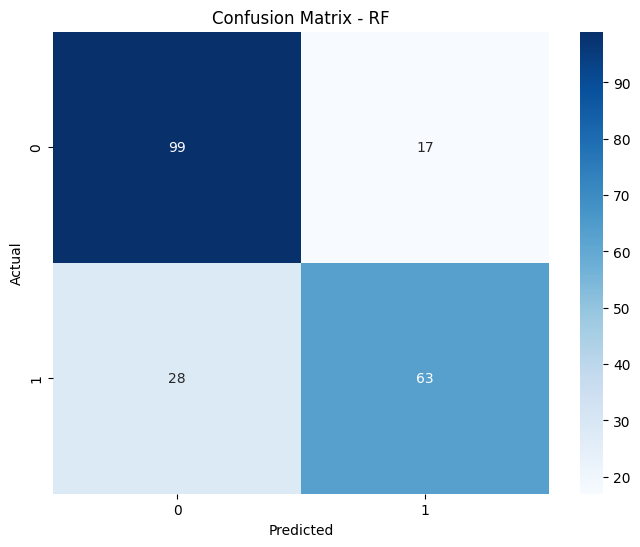

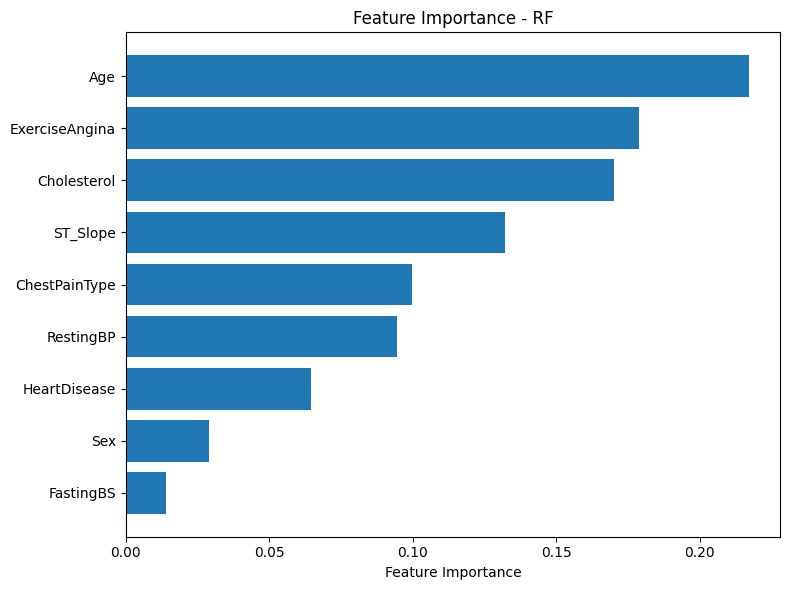


------------------------------------------------------------

XGBoost Classifier

Best cross validation score:  0.6833071072646211

Test set accuracy: 0.7198
Training set accuracy: 1.0000
Test set AUC: 0.7974
Training set AUC: 1.0000
Possible overfitting


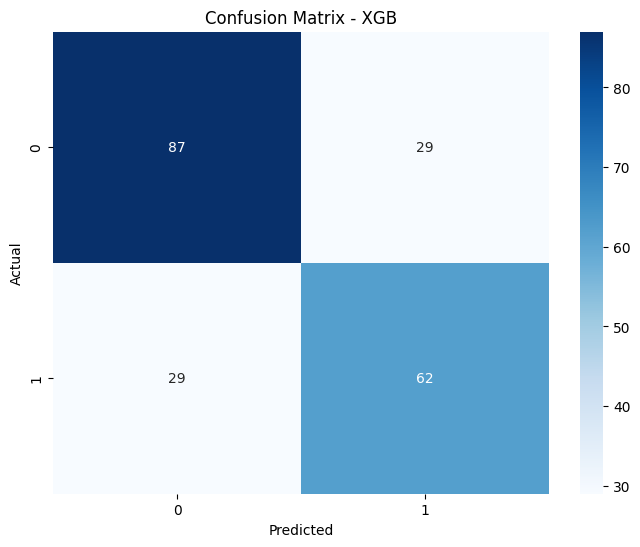

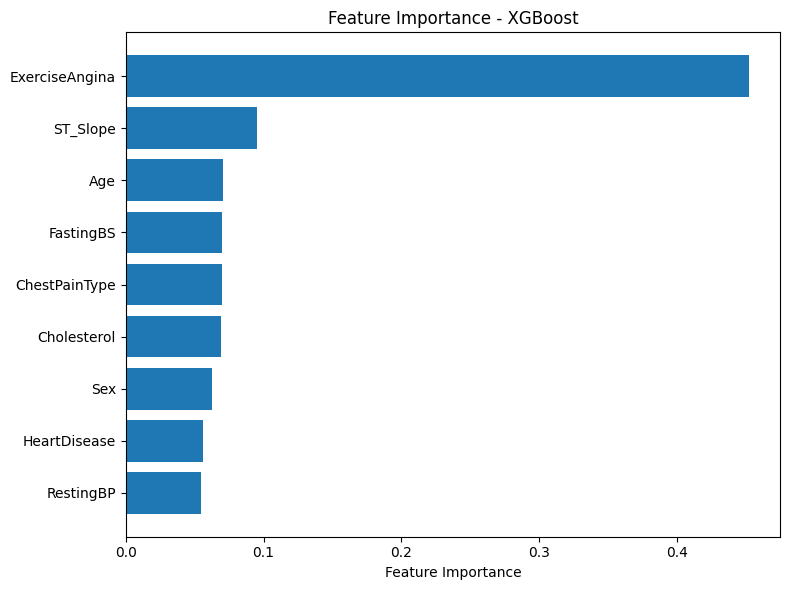


------------------------------------------------------------

Naive Bayes Classifier

Best cross validation scores:  0.6935483870967742

Test set accuracy: 0.7343
Training set accuracy: 0.6898
Test set AUC: 0.8133
Training set AUC: 0.7568
No overfitting


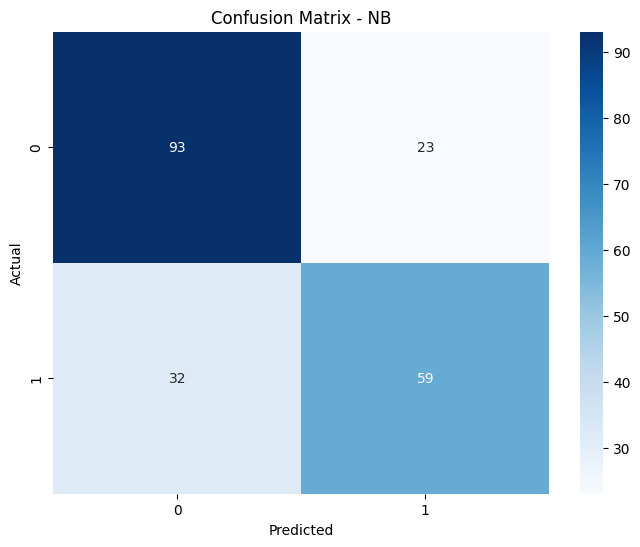


------------------------------------------------------------

K-Nearest Neighbors Classifier

Best parameters: {'n_neighbors': 10}
Best cross-validation score: 0.6106

Test set accuracy: 0.6667
Training set accuracy: 0.6769
Test set AUC: 0.6799
Training set AUC: 0.7435
No overfitting


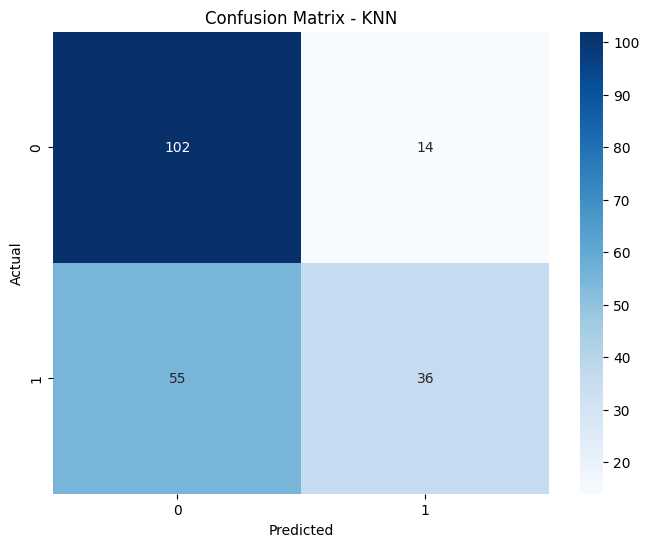


------------------------------------------------------------



In [ ]:
print("======================================================================================================")
print("Predicting MaxHR: second dataset, 2 category discretization, test size = 25%")
print("======================================================================================================")
predict(hr_x_train, hr_x_test, hr_y_train, hr_y_test)

HeartDisease Prediction - First dataset, 2 category discretization, test size = 10%:
Decision Tree Classifier

Best parameters: {'max_depth': 5, 'max_leaf_nodes': 20, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best cross-validation score: 0.8390

Test set accuracy: 0.8478
Training set accuracy: 0.8729
Test set AUC: 0.9381
Training set AUC: 0.9399
No overfitting


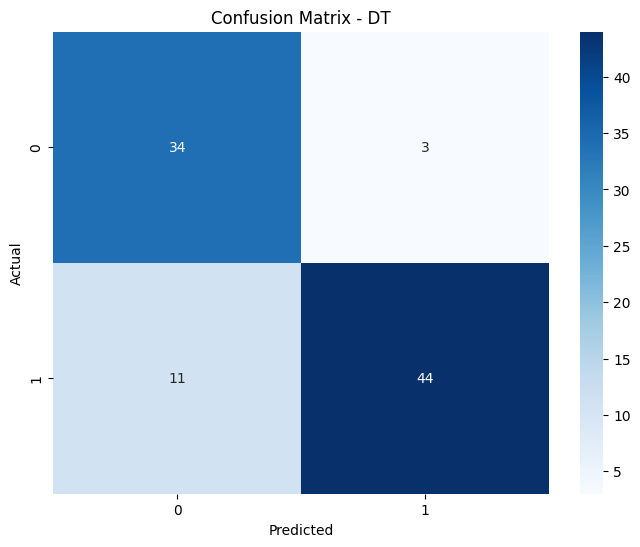

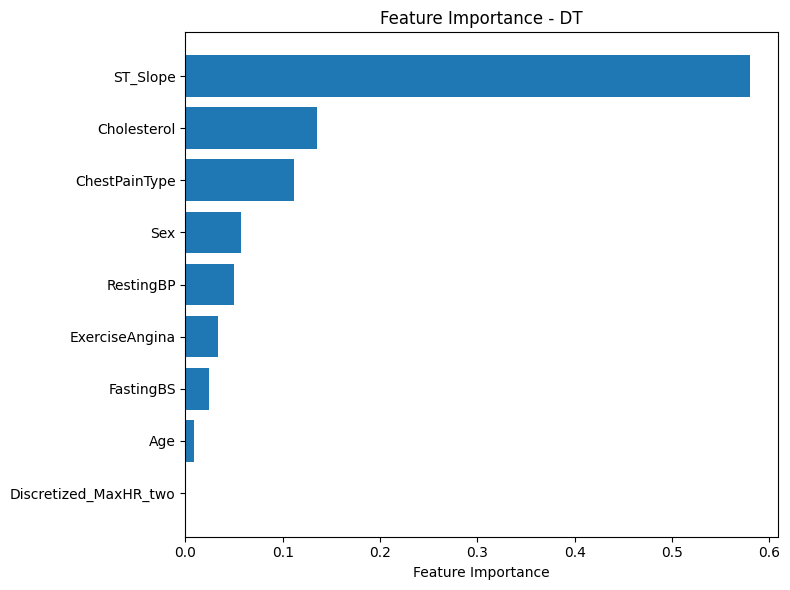


------------------------------------------------------------

Random Forest Classifier

Best parameters: {'max_depth': 3, 'n_estimators': 100}
Best cross-validation score: 0.8608

Test set accuracy: 0.9348
Training set accuracy: 0.8680
Test set AUC: 0.9641
Training set AUC: 0.9331
No overfitting


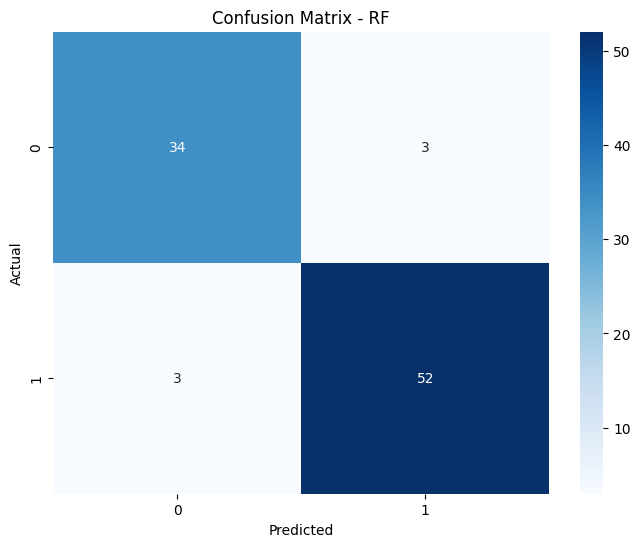

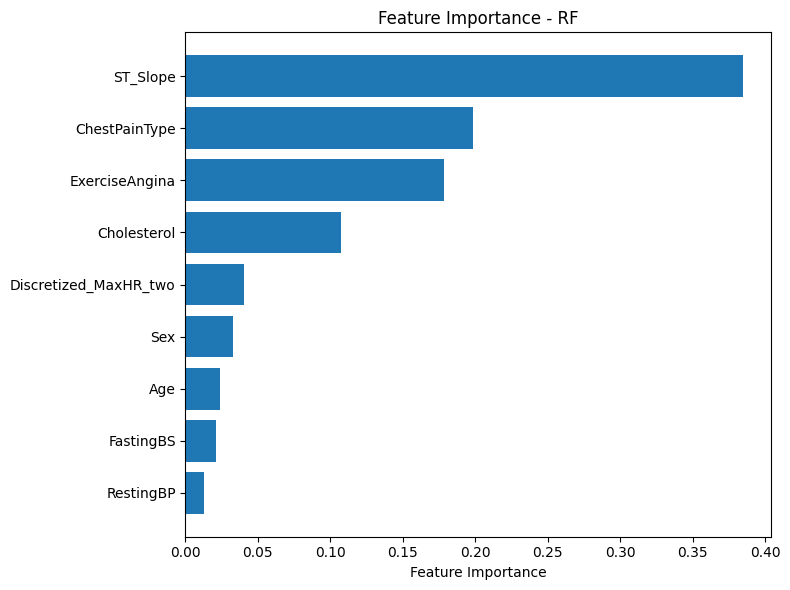


------------------------------------------------------------

XGBoost Classifier

Best cross validation score:  0.8256516976998904

Test set accuracy: 0.8696
Training set accuracy: 1.0000
Test set AUC: 0.9376
Training set AUC: 1.0000
Possible overfitting


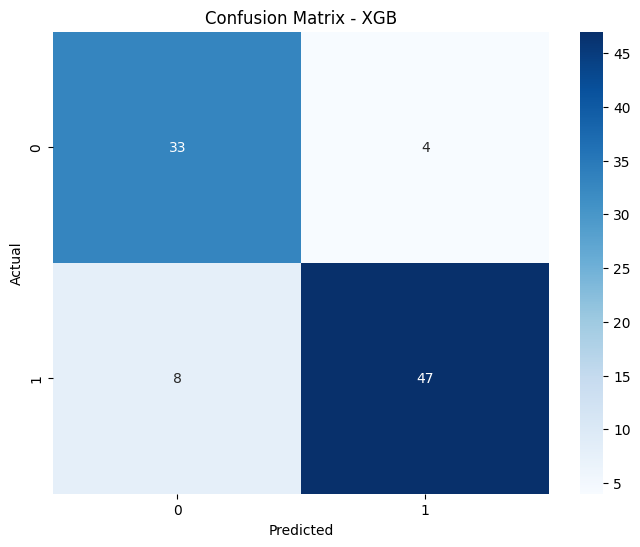

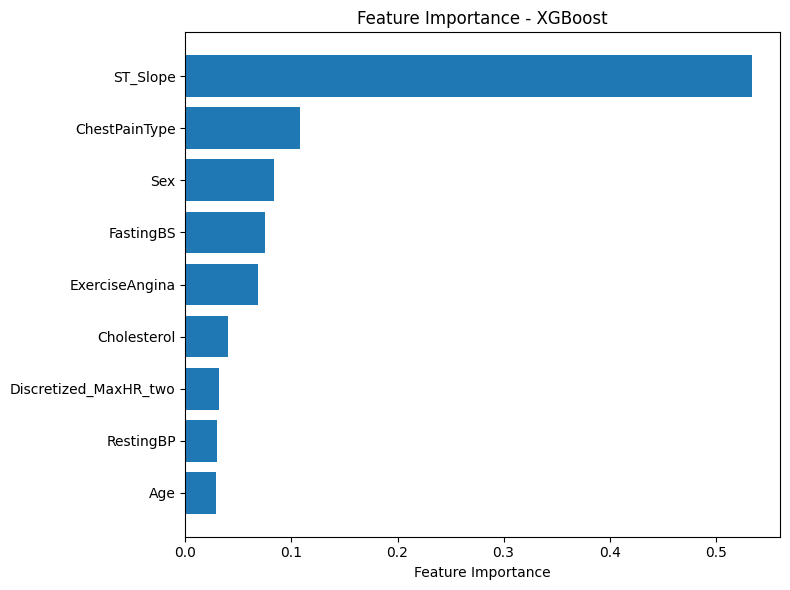


------------------------------------------------------------

Naive Bayes Classifier

Best cross validation scores:  0.8484848484848485

Test set accuracy: 0.8913
Training set accuracy: 0.8305
Test set AUC: 0.9518
Training set AUC: 0.9031
No overfitting


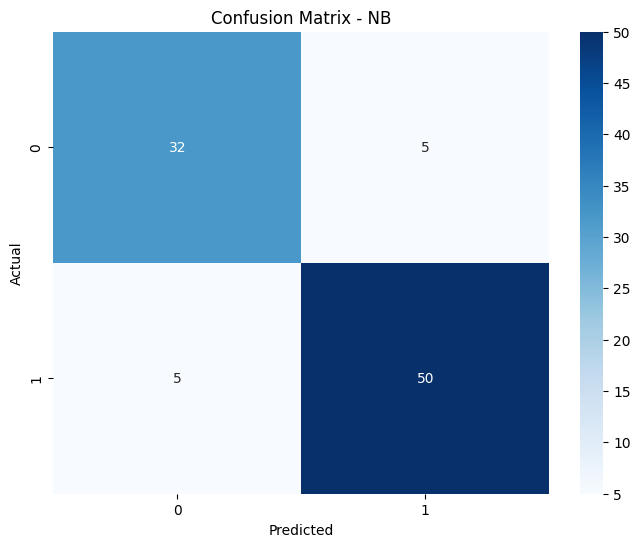


------------------------------------------------------------

K-Nearest Neighbors Classifier

Best parameters: {'n_neighbors': 5}
Best cross-validation score: 0.6477

Test set accuracy: 0.6630
Training set accuracy: 0.7736
Test set AUC: 0.6818
Training set AUC: 0.8629
Possible overfitting


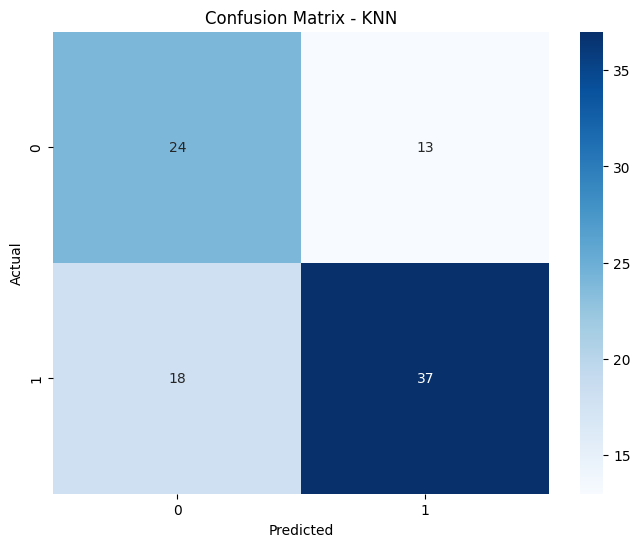


------------------------------------------------------------



In [ ]:
print("======================================================================================================")
print("HeartDisease Prediction - First dataset, 2 category discretization, test size = 10%:")
print("======================================================================================================")
predict(x_train, x_test, y_train, y_test)